In [82]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# reading the data

data = pd.read_csv(r'C:\Users\hp\Desktop\HEALTHCARE_PROJECT\data\raw\heart.csv')

# getting the shape
data.shape
     

(303, 14)

In [84]:
# reading the head of the data

data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [85]:
# describing the data

data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [86]:
# getting the info of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


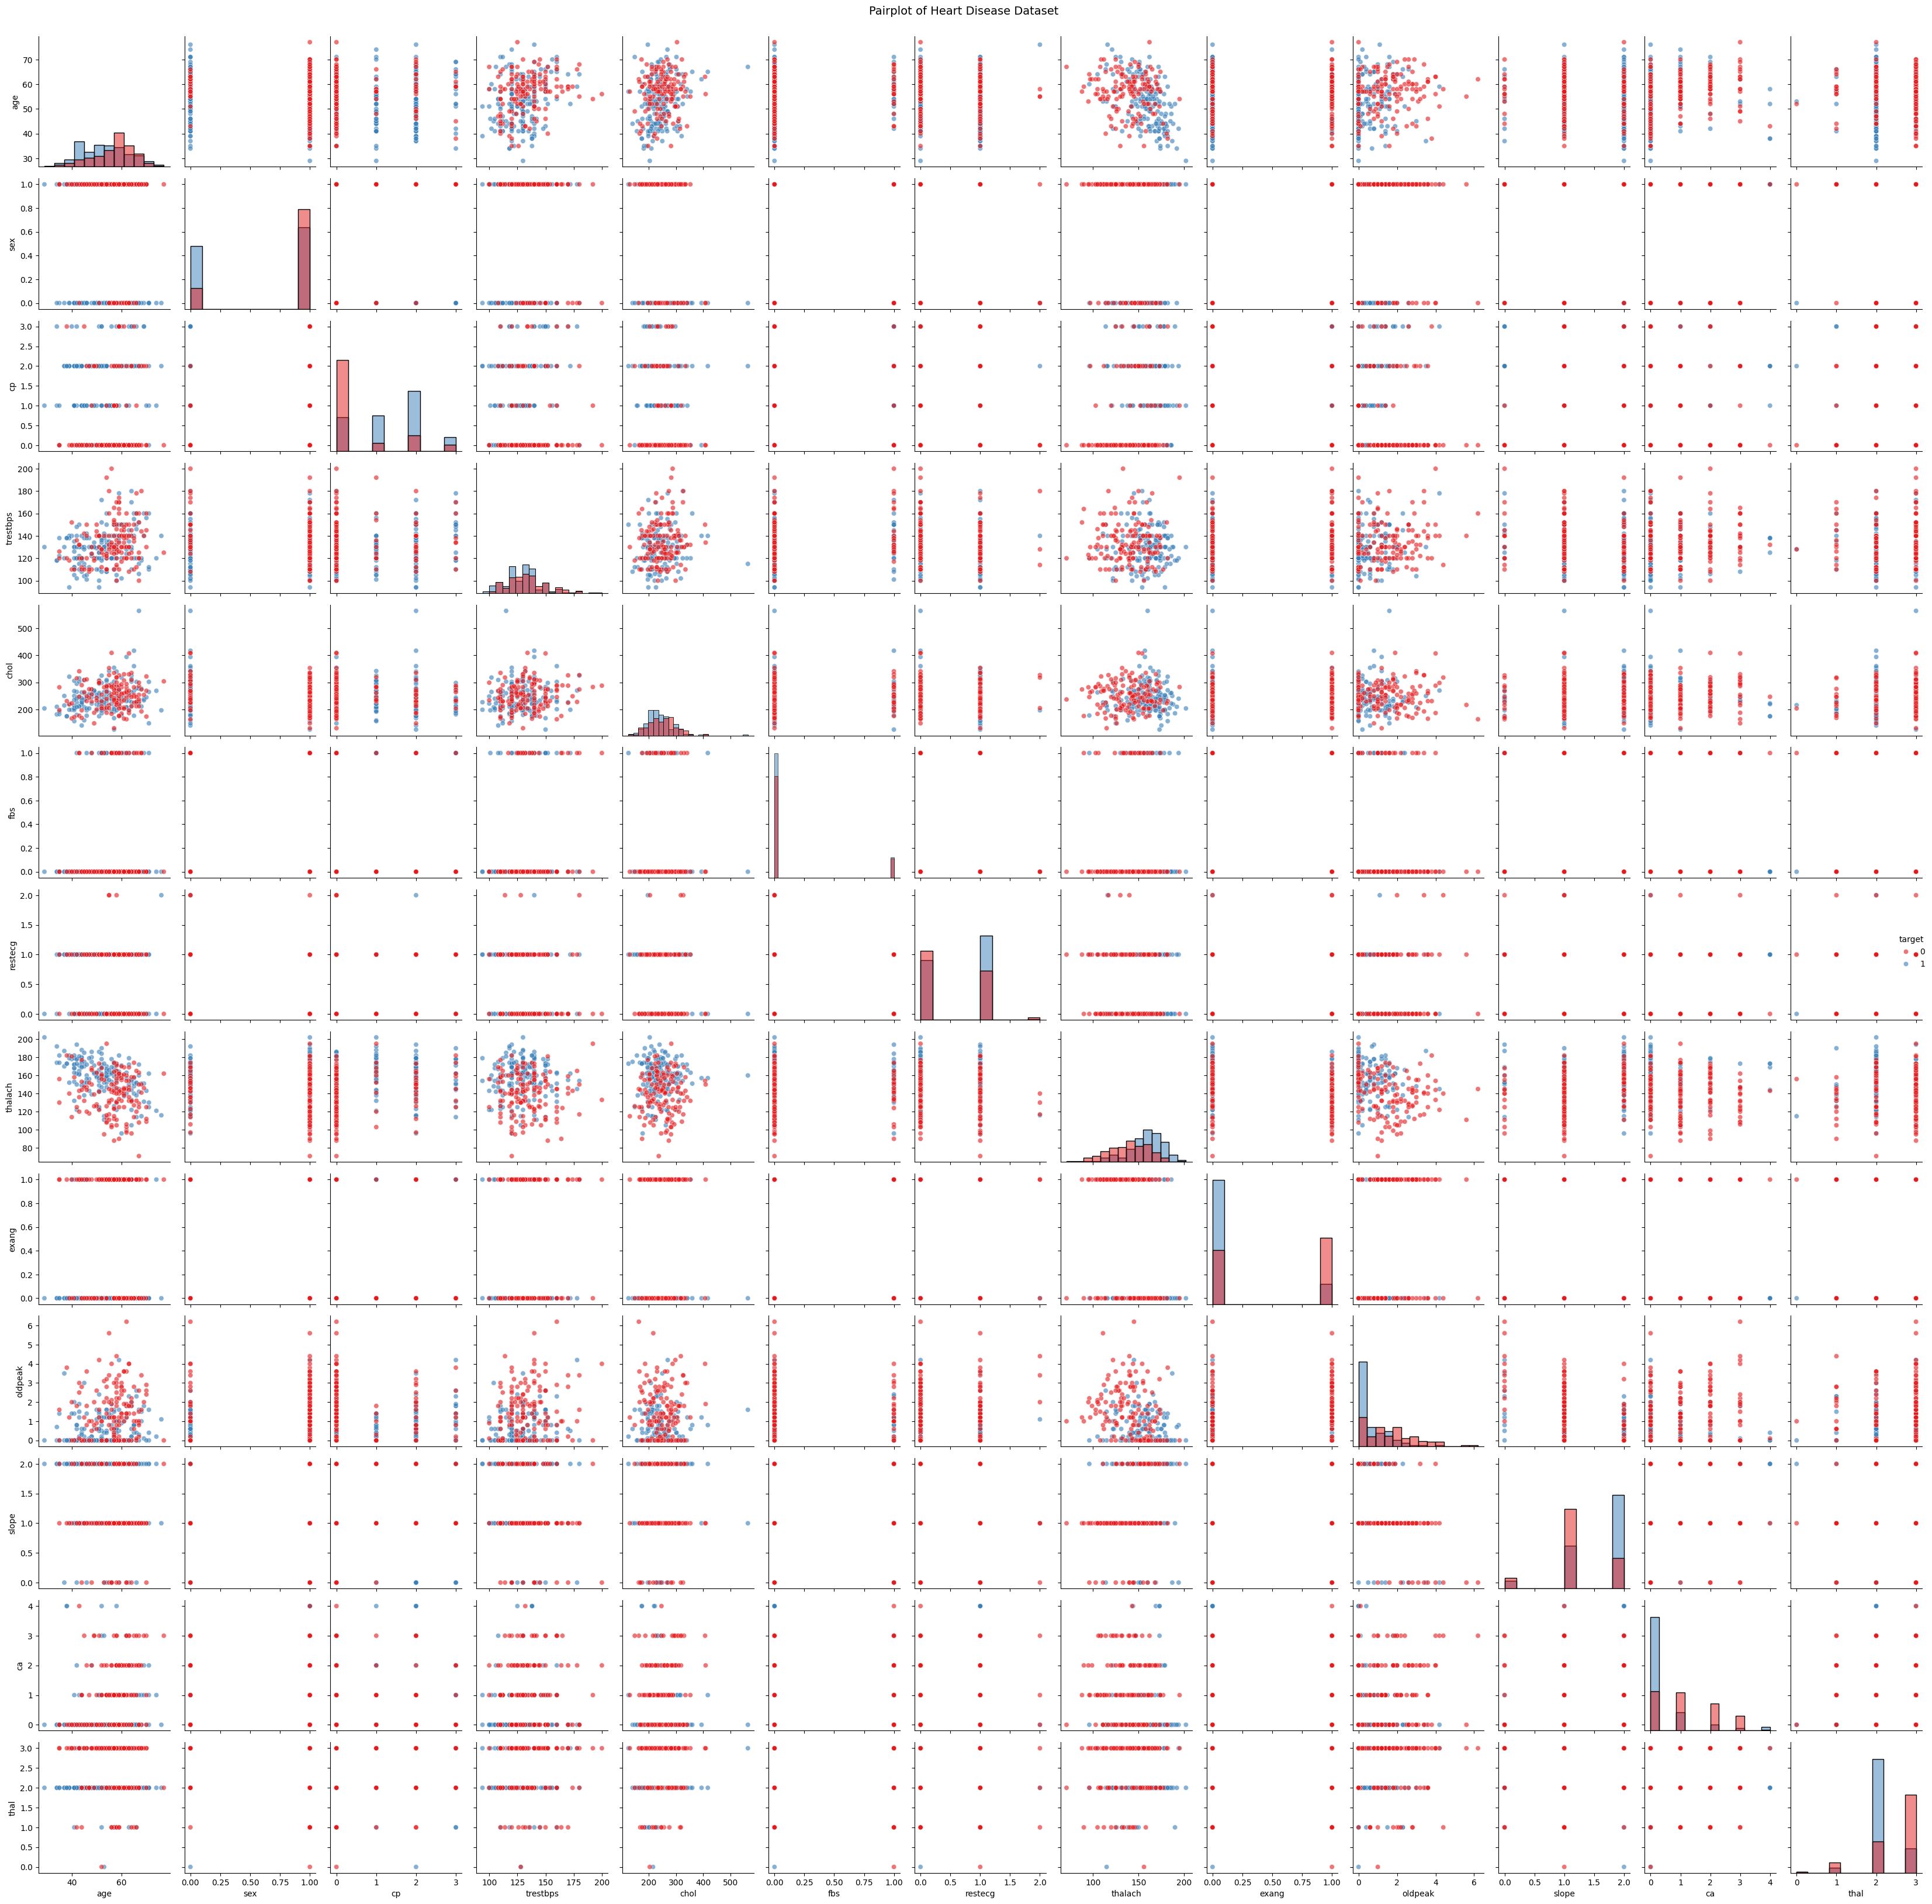

In [49]:
# making a pairplot

plt.rcParams['figure.figsize'] = (12, 10)
sns.pairplot(data, diag_kind='hist', plot_kws={'alpha': 0.6}, hue='target', palette='Set1')
plt.suptitle('Pairplot of Heart Disease Dataset', fontsize=14, y=1.001)
plt.tight_layout()
plt.show()

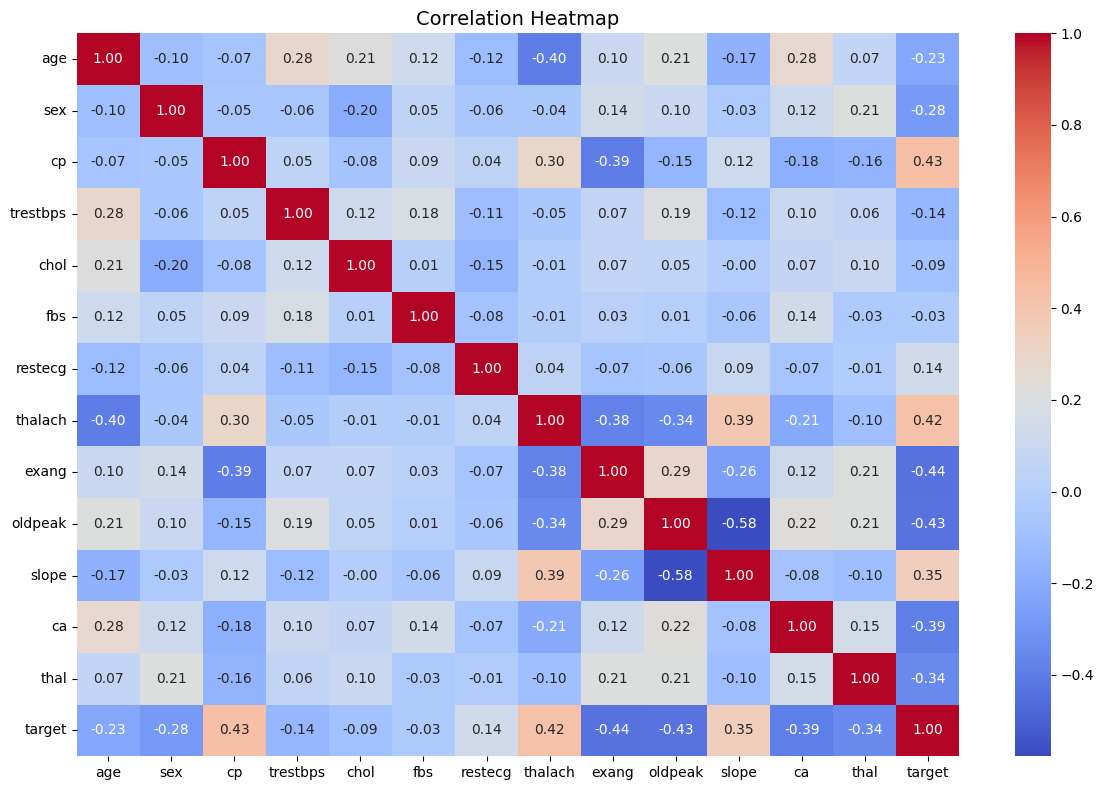

In [50]:
# making a heat map

plt.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Age')

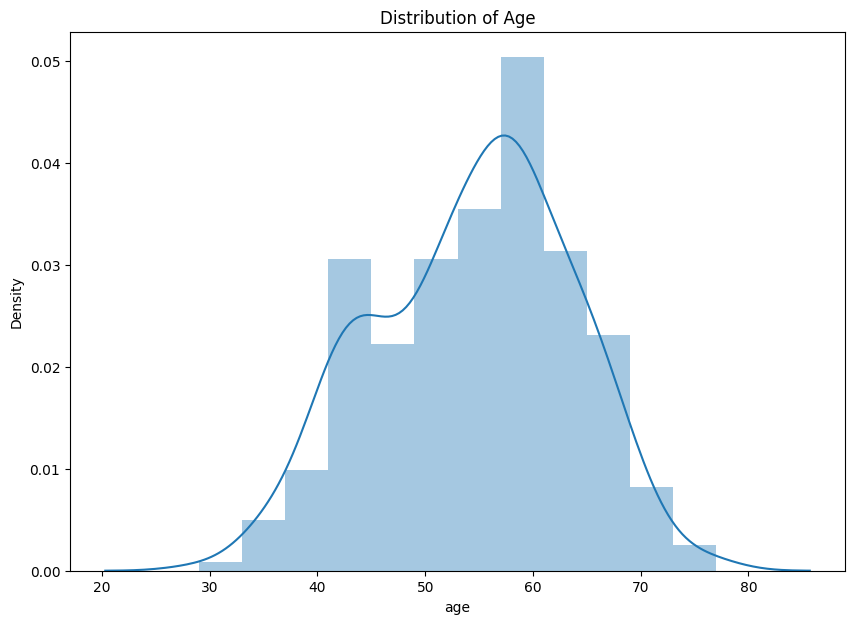

In [51]:
# checking the distribution of age amonng the patients

plt.rcParams['figure.figsize'] = (10, 7)
sns.distplot(data['age'])
plt.title('Distribution of Age')

In [87]:

# checking the values present in sex attribute

data['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

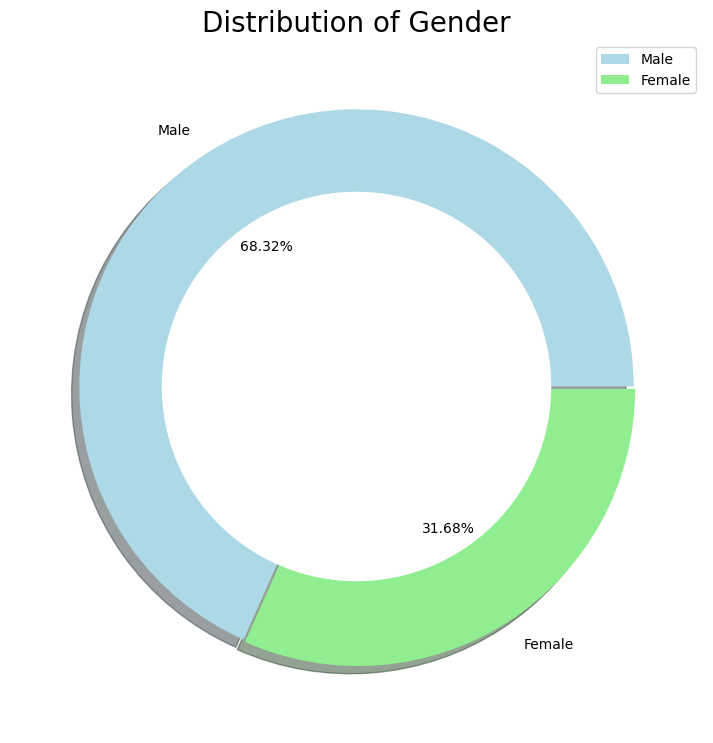

In [53]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = [207, 96]
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

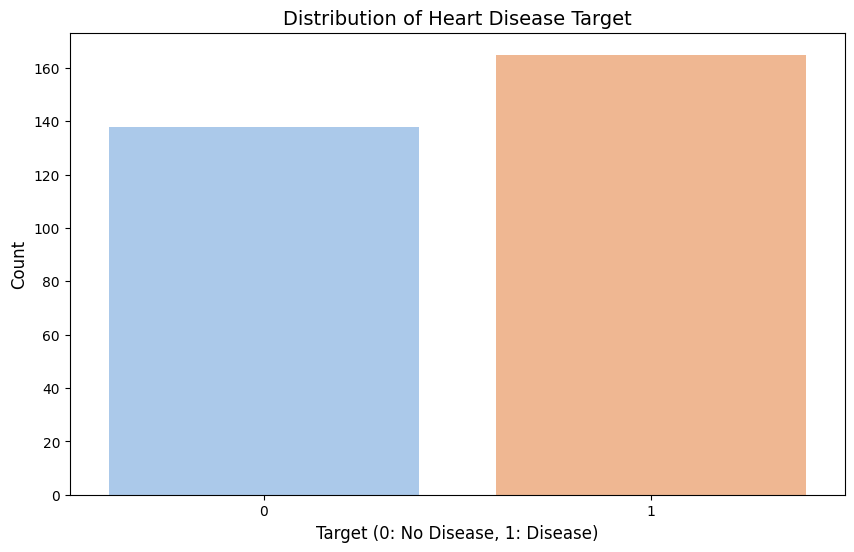

In [54]:
# plotting the target attribute as a bar chart

plt.rcParams['figure.figsize'] = (10, 6)
target_counts = data['target'].value_counts()
sns.barplot(x=target_counts.index, y=target_counts.values, palette='pastel')
plt.xlabel('Target (0: No Disease, 1: Disease)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Heart Disease Target', fontsize=14)
plt.show()

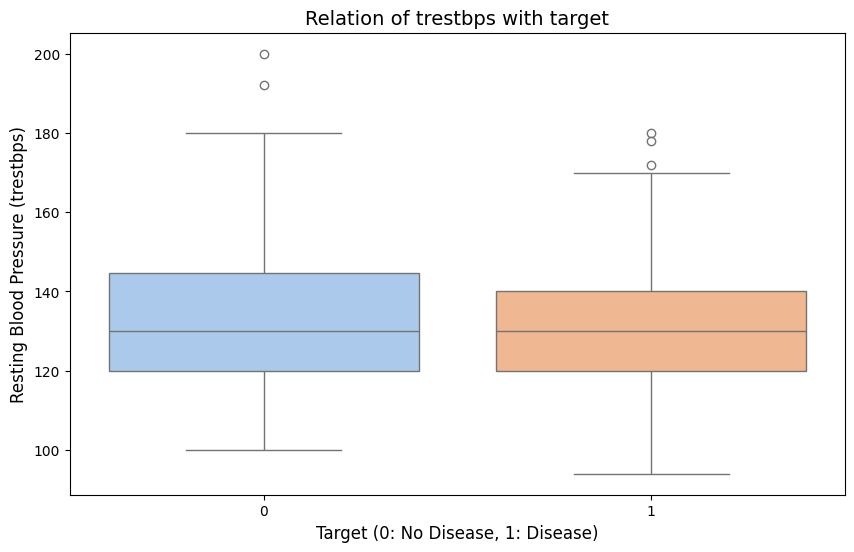

In [55]:
# tresbps vs target

plt.rcParams['figure.figsize'] = (10, 6)
sns.boxplot(x=data['target'], y=data['trestbps'], palette='pastel')
plt.xlabel('Target (0: No Disease, 1: Disease)', fontsize=12)
plt.ylabel('Resting Blood Pressure (trestbps)', fontsize=12)
plt.title('Relation of trestbps with target', fontsize=14)
plt.show()

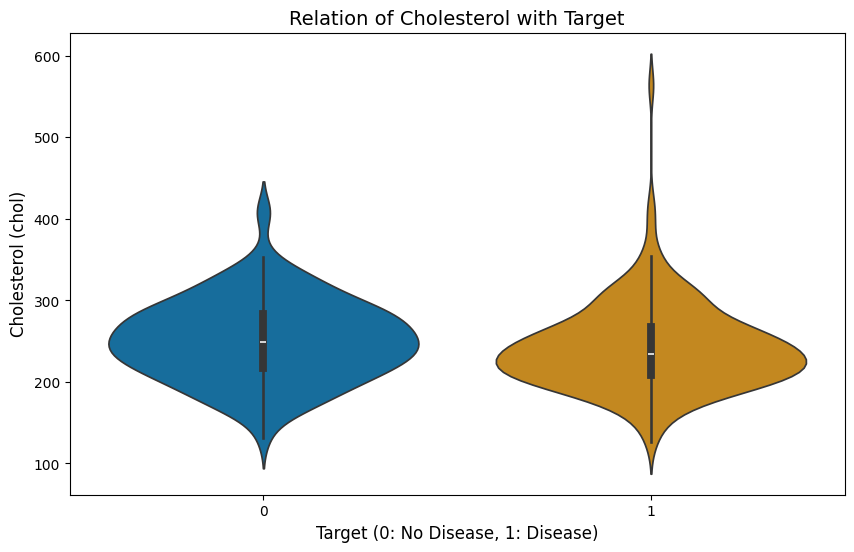

In [56]:
# cholestrol vs target

plt.rcParams['figure.figsize'] = (10, 6)
sns.violinplot(x=data['target'], y=data['chol'], palette='colorblind')
plt.xlabel('Target (0: No Disease, 1: Disease)', fontsize=12)
plt.ylabel('Cholesterol (chol)', fontsize=12)
plt.title('Relation of Cholesterol with Target', fontsize=14)
plt.show()

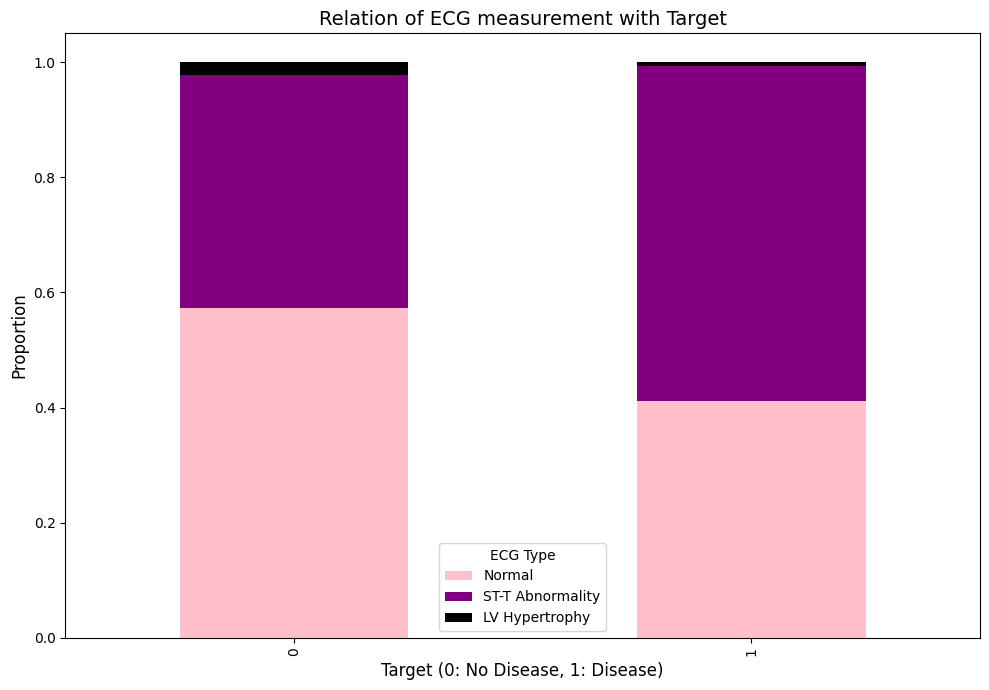

In [57]:
# Resting electrocardiographic measurement vs target

plt.rcParams['figure.figsize'] = (10, 7)
dat = pd.crosstab(data['target'], data['restecg']) 
dat.div(dat.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['pink', 'purple', 'black'])
plt.xlabel('Target (0: No Disease, 1: Disease)', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.title('Relation of ECG measurement with Target', fontsize=14)
plt.legend(title='ECG Type', labels=['Normal', 'ST-T Abnormality', 'LV Hypertrophy'])
plt.tight_layout()
plt.show()

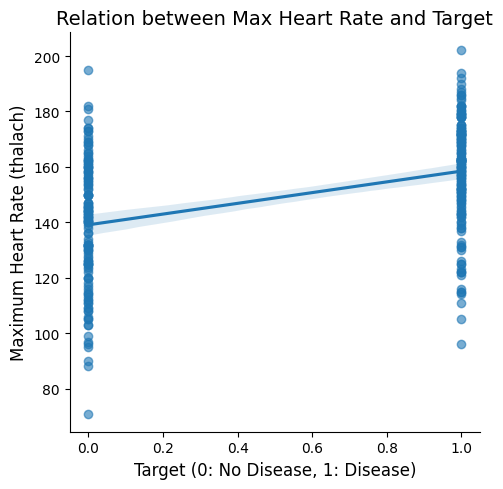

In [58]:
# checking the relation bet. thalach and target
# thalach: The person's maximum heart rate achieved

plt.rcParams['figure.figsize'] = (10, 7)
sns.lmplot(x='target', y='thalach', data=data, scatter_kws={'alpha': 0.6})
plt.xlabel('Target (0: No Disease, 1: Disease)', fontsize=12)
plt.ylabel('Maximum Heart Rate (thalach)', fontsize=12)
plt.title('Relation between Max Heart Rate and Target', fontsize=14)
plt.tight_layout()
plt.show()

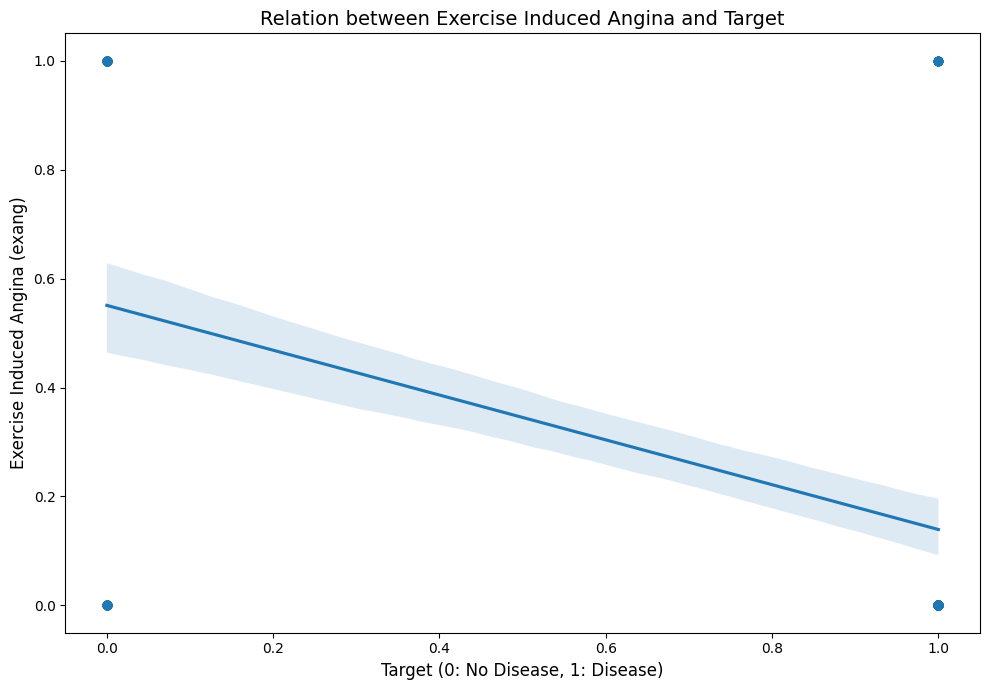

In [59]:
# exang: Exercise induced angina (1 = yes; 0 = no)

plt.rcParams['figure.figsize'] = (10, 7)
sns.regplot(x='target', y='exang', data=data, scatter_kws={'alpha': 0.6})
plt.xlabel('Target (0: No Disease, 1: Disease)', fontsize=12)
plt.ylabel('Exercise Induced Angina (exang)', fontsize=12)
plt.title('Relation between Exercise Induced Angina and Target', fontsize=14)
plt.tight_layout()
plt.show()

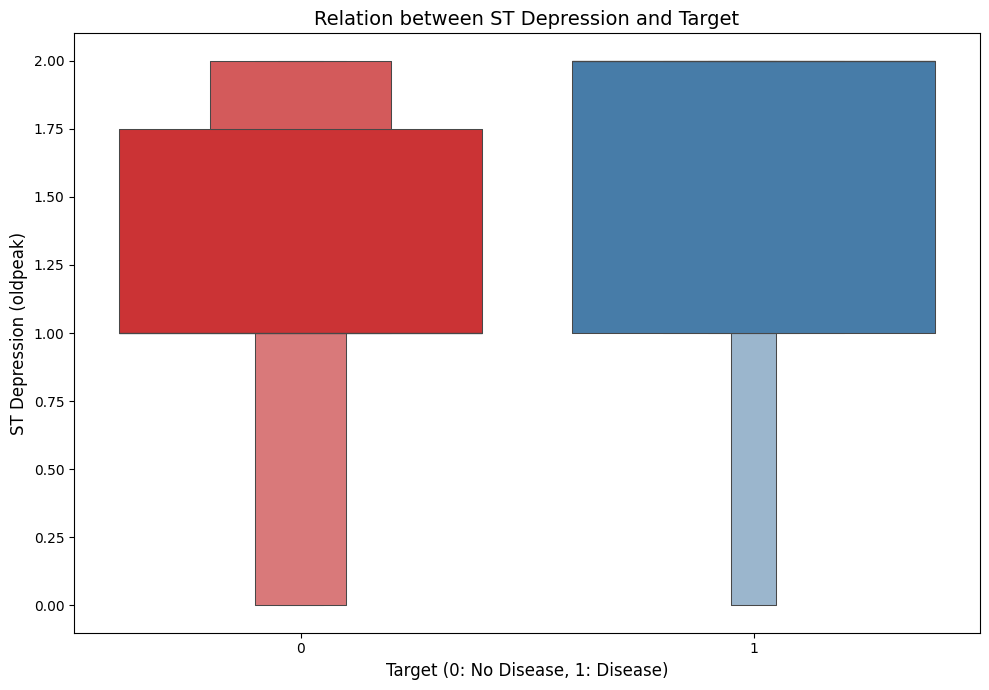

In [60]:
# slope: the slope of the peak exercise ST segment
# Value 1: upsloping, Value 2: flat, Value 3: downsloping
# checking the relation between slope and target

plt.rcParams['figure.figsize'] = (10, 7)
sns.boxenplot(x=data['target'], y=data['slope'], palette='Set1')
plt.xlabel('Target (0: No Disease, 1: Disease)', fontsize=12)
plt.ylabel('ST Depression (oldpeak)', fontsize=12)
plt.title('Relation between ST Depression and Target', fontsize=14)
plt.tight_layout()
plt.show()

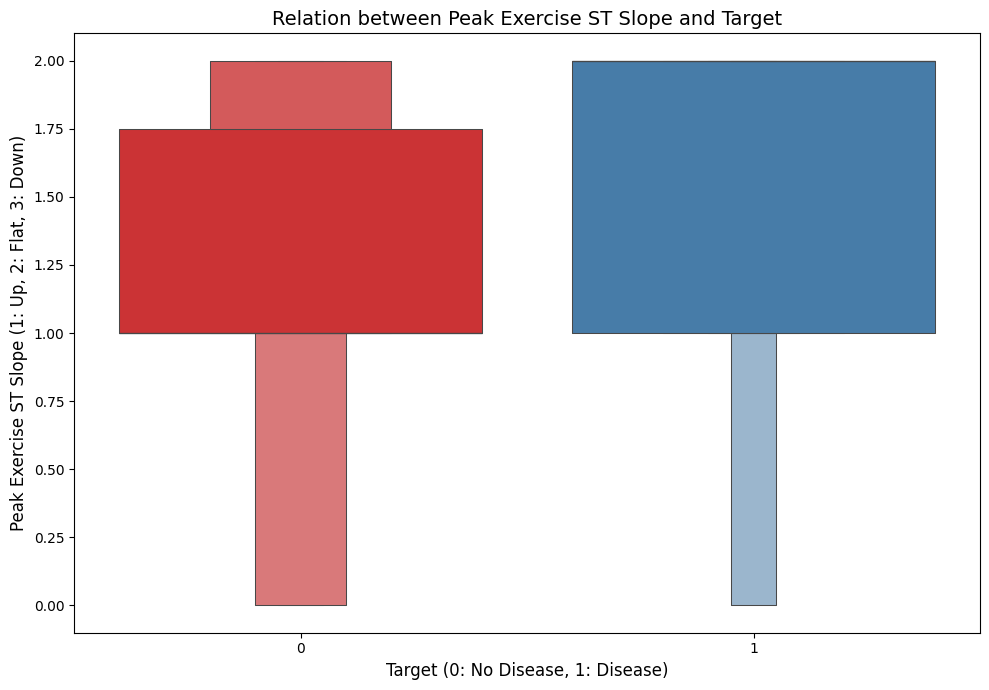

In [61]:
# slope: the slope of the peak exercise ST segment
# Value 1: upsloping, Value 2: flat, Value 3: downsloping
# checking the relation between slope and target

plt.rcParams['figure.figsize'] = (10, 7)
sns.boxenplot(x=data['target'], y=data['slope'], palette='Set1')
plt.xlabel('Target (0: No Disease, 1: Disease)', fontsize=12)
plt.ylabel('Peak Exercise ST Slope (1: Up, 2: Flat, 3: Down)', fontsize=12)
plt.title('Relation between Peak Exercise ST Slope and Target', fontsize=14)
plt.tight_layout()
plt.show()

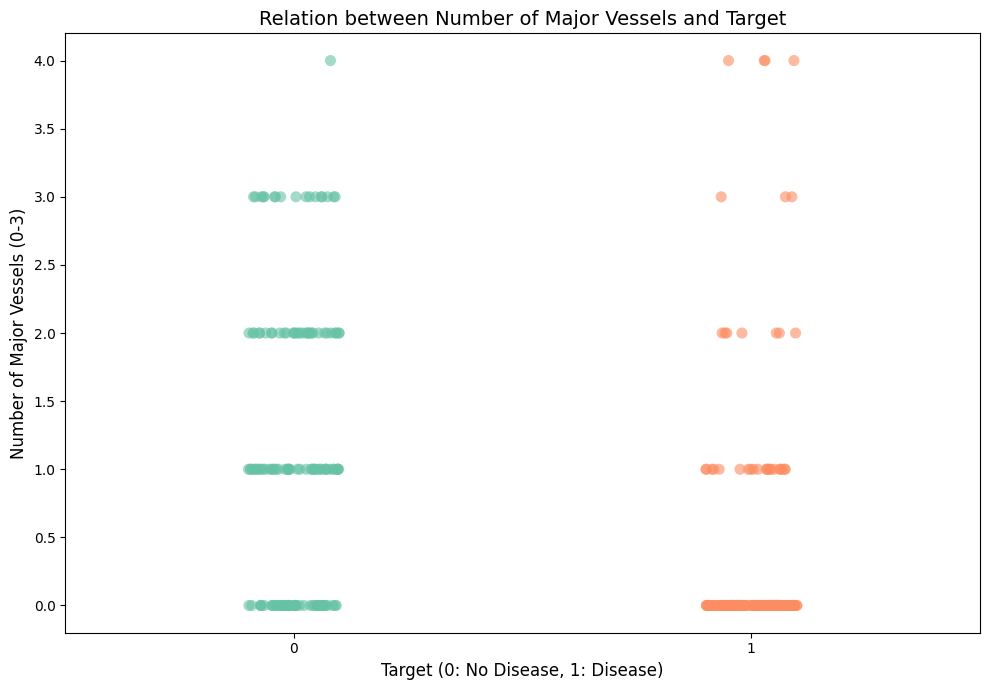

In [62]:
# ca: The number of major vessels (0-3)

plt.rcParams['figure.figsize'] = (10, 7)
sns.stripplot(x=data['target'], y=data['ca'], palette='Set2', size=8, alpha=0.6)
plt.xlabel('Target (0: No Disease, 1: Disease)', fontsize=12)
plt.ylabel('Number of Major Vessels (0-3)', fontsize=12)
plt.title('Relation between Number of Major Vessels and Target', fontsize=14)
plt.tight_layout()
plt.show()

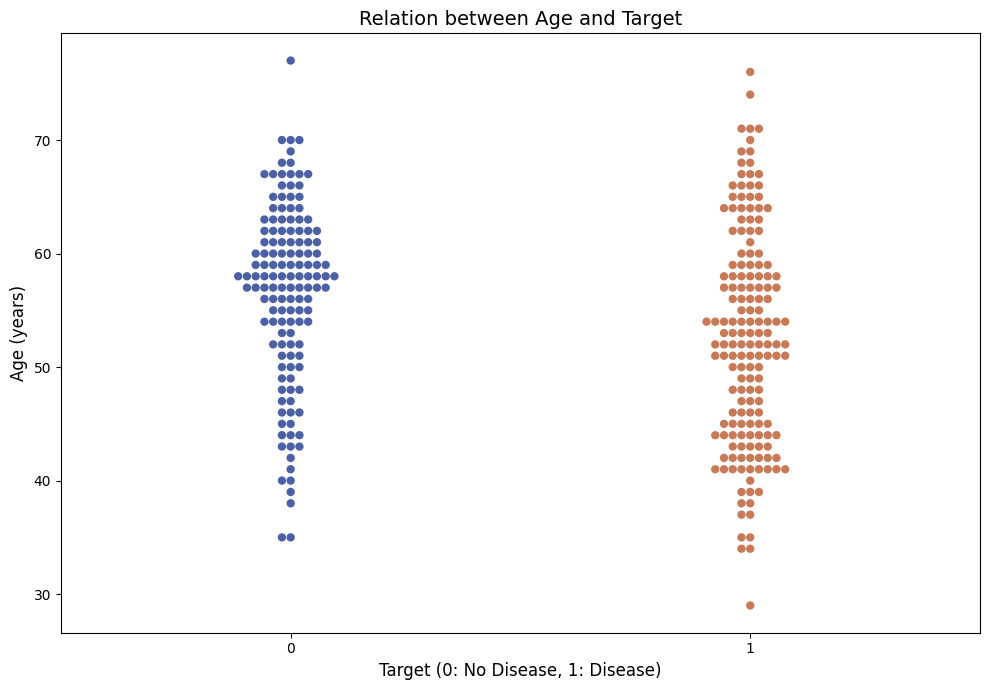

In [63]:
# relation between age and target

plt.rcParams['figure.figsize'] = (10, 7)
sns.swarmplot(x=data['target'], y=data['age'], palette='dark', size=6, alpha=0.7)
plt.xlabel('Target (0: No Disease, 1: Disease)', fontsize=12)
plt.ylabel('Age (years)', fontsize=12)
plt.title('Relation between Age and Target', fontsize=14)
plt.tight_layout()
plt.show()

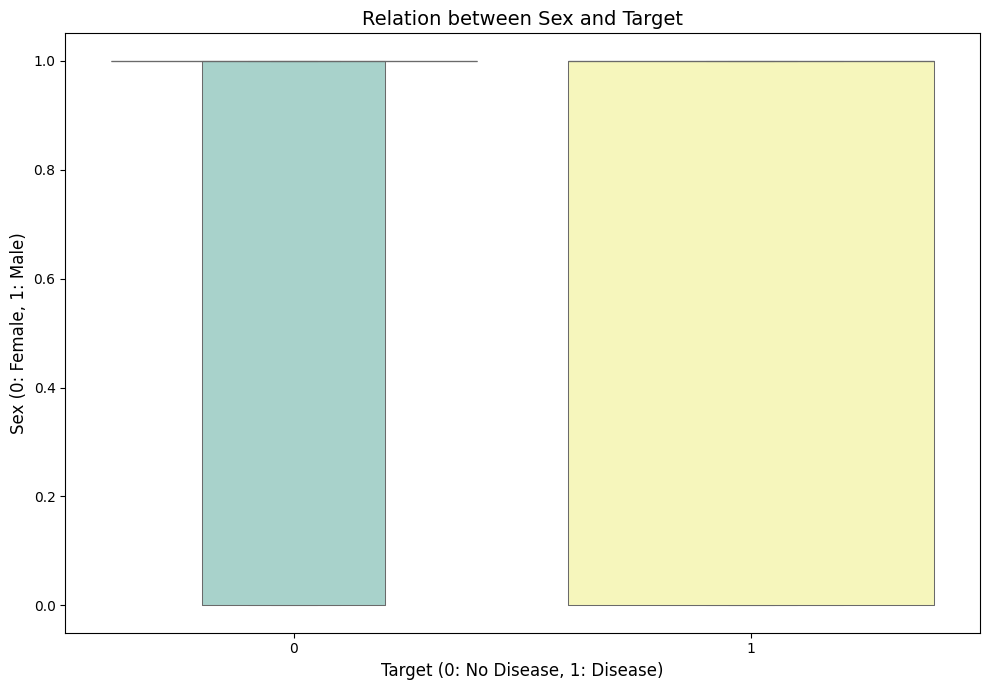

In [64]:
# relation between sex and target

plt.rcParams['figure.figsize'] = (10, 7)
sns.boxenplot(x=data['target'], y=data['sex'], palette='Set3')
plt.xlabel('Target (0: No Disease, 1: Disease)', fontsize=12)
plt.ylabel('Sex (0: Female, 1: Male)', fontsize=12)
plt.title('Relation between Sex and Target', fontsize=14)
plt.tight_layout()
plt.show()

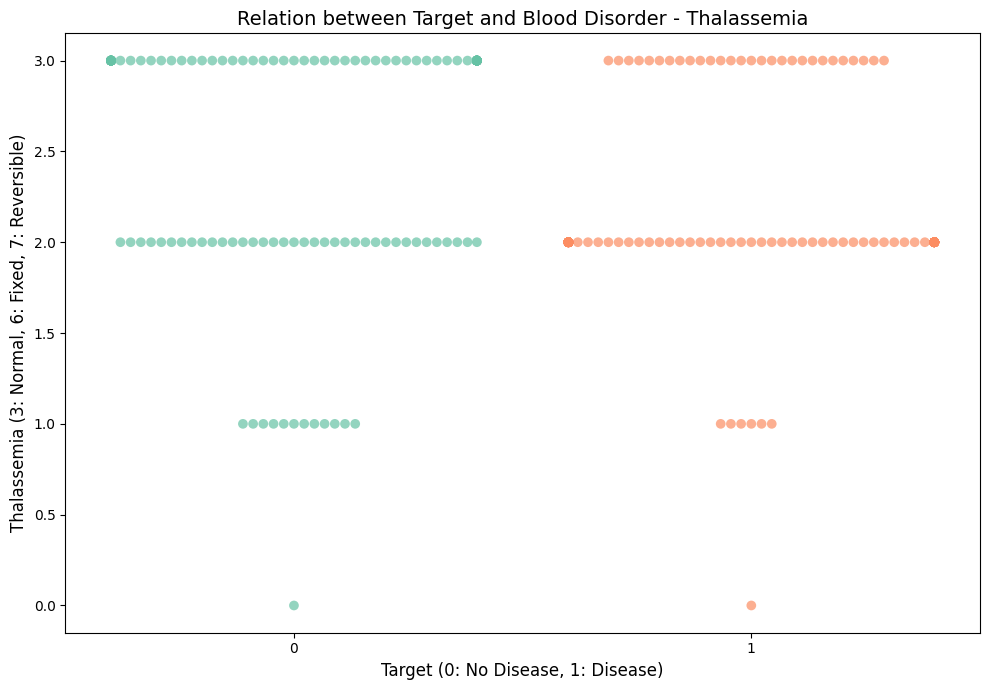

In [65]:
# checking the relation between thal and target
# thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)

plt.rcParams['figure.figsize'] = (10, 7)
sns.swarmplot(x=data['target'], y=data['thal'], palette='Set2', size=7, alpha=0.7)
plt.xlabel('Target (0: No Disease, 1: Disease)', fontsize=12)
plt.ylabel('Thalassemia (3: Normal, 6: Fixed, 7: Reversible)', fontsize=12)
plt.title('Relation between Target and Blood Disorder - Thalassemia', fontsize=14)
plt.tight_layout()
plt.show()

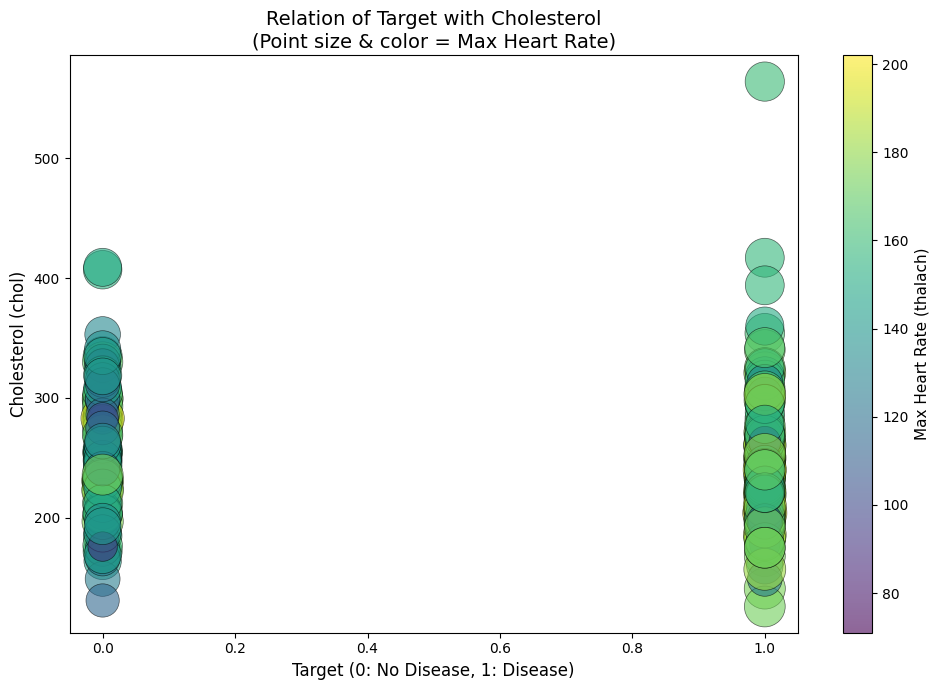

In [66]:
# target vs chol with point size representing thalach (max heart rate)

plt.rcParams['figure.figsize'] = (10, 7)
scatter = plt.scatter(x=data['target'], y=data['chol'], s=data['thalach']*5, 
                      c=data['thalach'], cmap='viridis', alpha=0.6, edgecolors='black', linewidth=0.5)
plt.xlabel('Target (0: No Disease, 1: Disease)', fontsize=12)
plt.ylabel('Cholesterol (chol)', fontsize=12)
plt.title('Relation of Target with Cholesterol\n(Point size & color = Max Heart Rate)', fontsize=14)
cbar = plt.colorbar(scatter)
cbar.set_label('Max Heart Rate (thalach)', fontsize=11)
plt.tight_layout()
plt.show()

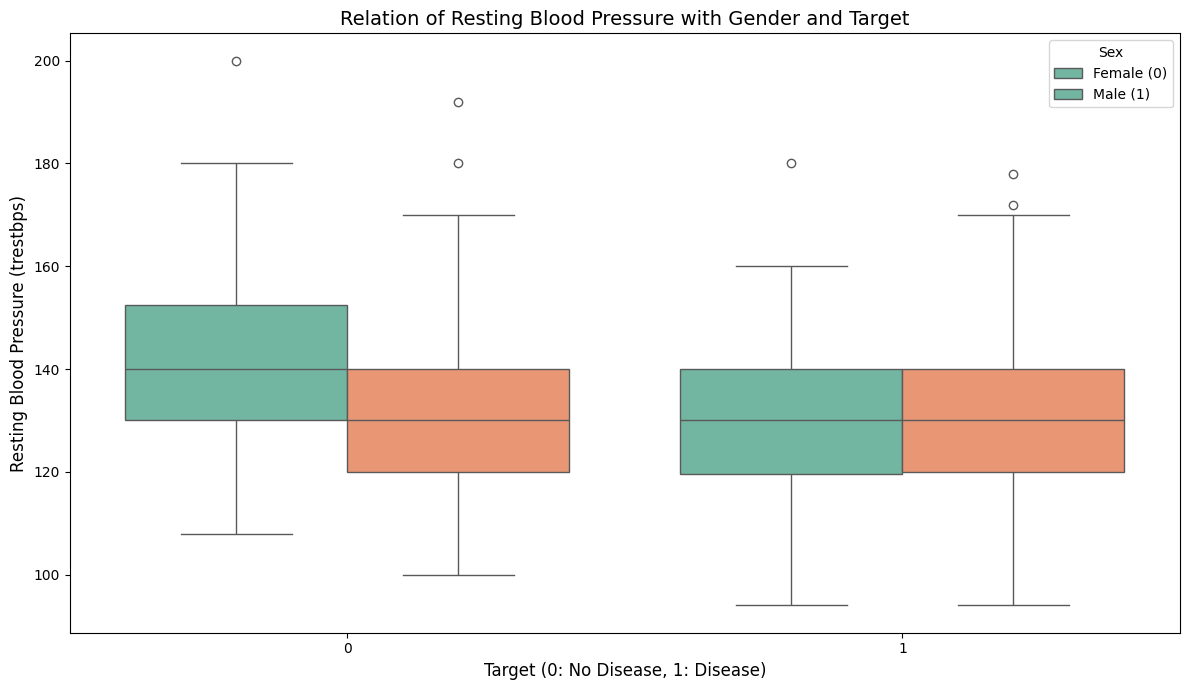

In [67]:
# multi-variate analysis: Resting BP vs Target by Gender

plt.rcParams['figure.figsize'] = (12, 7)
sns.boxplot(x=data['target'], y=data['trestbps'], hue=data['sex'], palette='Set2')
plt.xlabel('Target (0: No Disease, 1: Disease)', fontsize=12)
plt.ylabel('Resting Blood Pressure (trestbps)', fontsize=12)
plt.title('Relation of Resting Blood Pressure with Gender and Target', fontsize=14)
plt.legend(title='Sex', labels=['Female (0)', 'Male (1)'], loc='best')
plt.tight_layout()
plt.show()

In [88]:
# let's change the names of the  columns for better understanding

data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [89]:
# Map numeric values to meaningful categorical labels for better interpretation

# Sex: Convert binary to gender labels
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

# Chest Pain Type: Map numeric codes to clinical descriptions
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 4] = 'asymptomatic'

# Fasting Blood Sugar: Map to glucose level categories
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

# Rest ECG: Map to electrocardiographic findings
data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

# Exercise Induced Angina: Convert binary to yes/no labels
data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

# ST Slope: Map to slope descriptions for exercise test results
data['st_slope'][data['st_slope'] == 1] = 'upsloping'
data['st_slope'][data['st_slope'] == 2] = 'flat'
data['st_slope'][data['st_slope'] == 3] = 'downsloping'

# Thalassemia: Map to blood disorder types (hereditary condition)
data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversible defect'

print("Data encoding complete! All categorical variables have been converted to meaningful labels.")

Data encoding complete! All categorical variables have been converted to meaningful labels.


In [90]:
data['sex'] = data['sex'].astype('object')
data['chest_pain_type'] = data['chest_pain_type'].astype('object')
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].astype('object')
data['rest_ecg'] = data['rest_ecg'].astype('object')
data['exercise_induced_angina'] = data['exercise_induced_angina'].astype('object')
data['st_slope'] = data['st_slope'].astype('object')
data['thalassemia'] = data['thalassemia'].astype('object')

In [91]:

# taking the labels out from the data

y = data['target']

data = data.drop('target', axis = 1)

print("Shape of y:", y.shape)

Shape of y: (303,)


In [92]:
# One-Hot Encoding: Convert categorical variables to numerical format
# Purpose: Machine learning models require numerical input, not string labels
# drop_first=True: Avoid multicollinearity by dropping the first category
# Example: 'sex' column with values ['female', 'male'] becomes a single binary column 'sex_male' (0 or 1)
# This prevents redundancy and dummy variable trap

data = pd.get_dummies(data, drop_first=True)

print("One-Hot Encoding Complete!")
print(f"New shape after encoding: {data.shape}")
print(f"\nFirst few columns of encoded data:")
print(data.head())
print(f"\nData types after encoding:")
print(data.dtypes)

One-Hot Encoding Complete!
New shape after encoding: (303, 19)

First few columns of encoded data:
   age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0   63                     145          233                      150   
1   37                     130          250                      187   
2   41                     130          204                      172   
3   56                     120          236                      178   
4   57                     120          354                      163   

   st_depression  num_major_vessels  sex_male  \
0            2.3                  0      True   
1            3.5                  0      True   
2            1.4                  0     False   
3            0.8                  0      True   
4            0.6                  0     False   

   chest_pain_type_atypical angina  chest_pain_type_non-anginal pain  \
0                            False                              True   
1                            

In [93]:
data.head()

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0   63                     145          233                      150   
1   37                     130          250                      187   
2   41                     130          204                      172   
3   56                     120          236                      178   
4   57                     120          354                      163   

   st_depression  num_major_vessels  sex_male  \
0            2.3                  0      True   
1            3.5                  0      True   
2            1.4                  0     False   
3            0.8                  0      True   
4            0.6                  0     False   

   chest_pain_type_atypical angina  chest_pain_type_non-anginal pain  \
0                            False                              True   
1                             True                             False   
2                            False                             False   
3                            False                             False   
4                            False                             False   

   chest_pain_type_typical angina  fasting_blood_sugar_lower than 120mg/ml  \
0                           False                                    False   
1                           False                                     True   
2                            True                                     True   
3                            True                                     True   
4                           False                                     True   

   rest_ecg_left ventricular hypertrophy  rest_ecg_normal  \
0                                  False             True   
1                                  False            False   
2                                  False             True   
3                                  False            False   
4                                  False            False   

   exercise_induced_angina_yes  st_slope_flat  st_slope_upsloping  \
0                        False          False               False   
1                        False          False               False   
2                        False           True               False   
3                        False           True               False   
4                         True           True               False   

   thalassemia_fixed defect  thalassemia_normal  thalassemia_reversible defect  
0                     False                True                          False  
1                      True               False                          False  
2                      True               False                          False  
3                      True               False                          False  
4                      True               False                          False

In [94]:
# splitting the dependent and independent variables from the data

x = data

# checking the shapes of x and y
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (303, 19)
Shape of y: (303,)


In [95]:
y.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [96]:
# splitting the sets into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)
     


Shape of x_train : (242, 19)
Shape of x_test : (61, 19)
Shape of y_train : (242,)
Shape of y_test : (61,)


Training Accuracy : 0.9297520661157025
Testing Accuracy : 0.8688524590163934
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



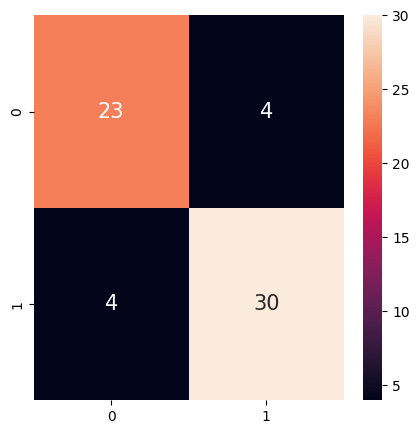

In [97]:
# MODELLING
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators = 50, max_depth = 5)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1]
y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15})

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [98]:
y_pred_quant

array([0.12613324, 0.61896504, 0.57993776, 0.01633371, 0.14206072,
       0.48984907, 0.20528799, 0.14480255, 0.0603502 , 0.11330307,
       0.39370463, 0.95592195, 0.09147115, 0.94859946, 0.86859734,
       0.69685138, 0.38794603, 0.78315381, 0.06796837, 0.51020825,
       0.94685972, 0.36193786, 0.20388715, 0.22208417, 0.81024708,
       0.17536974, 0.26413758, 0.45006309, 0.93386139, 0.64426557,
       0.62156365, 0.1577982 , 0.95183862, 0.6533404 , 0.94737304,
       0.55045509, 0.121907  , 0.91808052, 0.31101621, 0.4573669 ,
       0.68452187, 0.74819135, 0.77886704, 0.21172617, 0.42043954,
       0.73685462, 0.83268002, 0.35718041, 0.0952806 , 0.54375667,
       0.92182397, 0.52731389, 0.86400947, 0.57301547, 0.85188259,
       0.16437902, 0.74088477, 0.71333205, 0.80435479, 0.95614106,
       0.6945369 ])

Training Random Forest Classifier...

MODEL PERFORMANCE METRICS

Accuracy Scores:
  Training Accuracy: 0.9504 (95.04%)
  Testing Accuracy:  0.8525 (85.25%)
  ROC-AUC Score:     0.9248


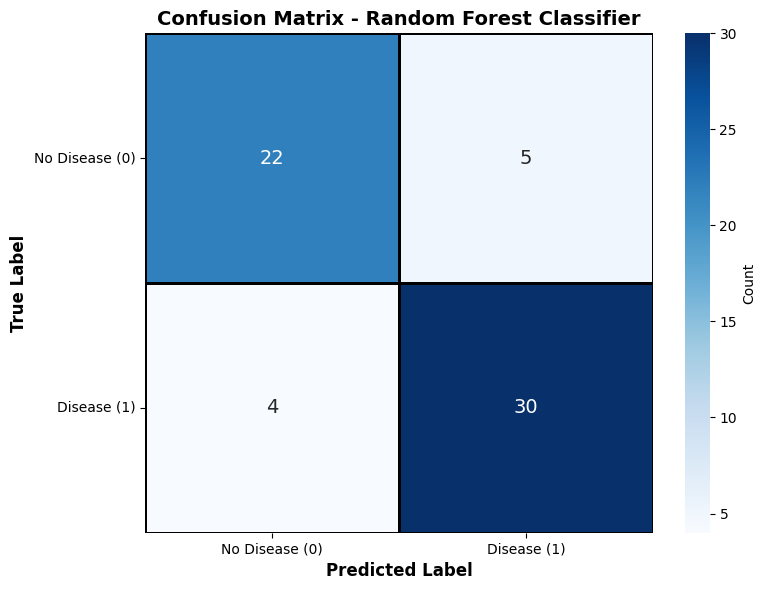


CLASSIFICATION REPORT
              precision    recall  f1-score   support

  No Disease       0.85      0.81      0.83        27
     Disease       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


TOP 10 FEATURE IMPORTANCE
                        Feature  Importance
              num_major_vessels    0.168135
       thalassemia_fixed defect    0.122910
                  st_depression    0.100097
        max_heart_rate_achieved    0.094733
  thalassemia_reversible defect    0.083814
                            age    0.075780
    exercise_induced_angina_yes    0.070679
         resting_blood_pressure    0.053817
                       sex_male    0.045106
chest_pain_type_atypical angina    0.043488


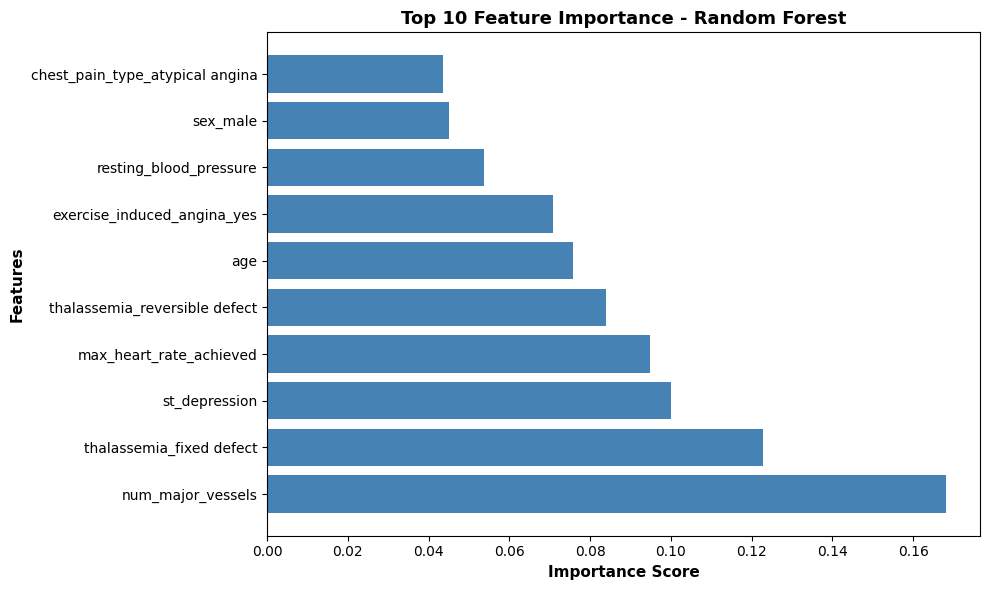

In [77]:
# ============================================================================
# MODEL BUILDING: RANDOM FOREST CLASSIFIER
# ============================================================================
# Random Forest: Ensemble learning method using multiple decision trees
# Benefits: Reduces overfitting, handles non-linearity, provides feature importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Initialize Random Forest with optimized hyperparameters
model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)

# Train the model
print("=" * 60)
print("Training Random Forest Classifier...")
print("=" * 60)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]  # Probability of positive class

# ============================================================================
# MODEL EVALUATION
# ============================================================================

print("\n" + "=" * 60)
print("MODEL PERFORMANCE METRICS")
print("=" * 60)

# Accuracy scores
train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)

print(f"\nAccuracy Scores:")
print(f"  Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"  Testing Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"  ROC-AUC Score:     {roc_auc:.4f}")

# ============================================================================
# CONFUSION MATRIX VISUALIZATION
# ============================================================================

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(cm, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Blues', 
            cbar_kws={'label': 'Count'}, linewidths=2, linecolor='black')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - Random Forest Classifier', fontsize=14, fontweight='bold')
plt.xticks([0.5, 1.5], ['No Disease (0)', 'Disease (1)'])
plt.yticks([0.5, 1.5], ['No Disease (0)', 'Disease (1)'], rotation=0)
plt.tight_layout()
plt.show()

# ============================================================================
# CLASSIFICATION REPORT
# ============================================================================

print("\n" + "=" * 60)
print("CLASSIFICATION REPORT")
print("=" * 60)

cr = classification_report(y_test, y_pred, target_names=['No Disease', 'Disease'])
print(cr)

# ============================================================================
# FEATURE IMPORTANCE
# ============================================================================

print("\n" + "=" * 60)
print("TOP 10 FEATURE IMPORTANCE")
print("=" * 60)

feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

print(feature_importance.to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance['Importance'].values, color='steelblue')
plt.yticks(range(len(feature_importance)), feature_importance['Feature'].values)
plt.xlabel('Importance Score', fontsize=11, fontweight='bold')
plt.ylabel('Features', fontsize=11, fontweight='bold')
plt.title('Top 10 Feature Importance - Random Forest', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

Training Logistic Regression...

Logistic Regression Accuracy:
  Training Accuracy: 0.8678 (86.78%)
  Testing Accuracy:  0.8525 (85.25%)
  ROC-AUC Score:     0.9118


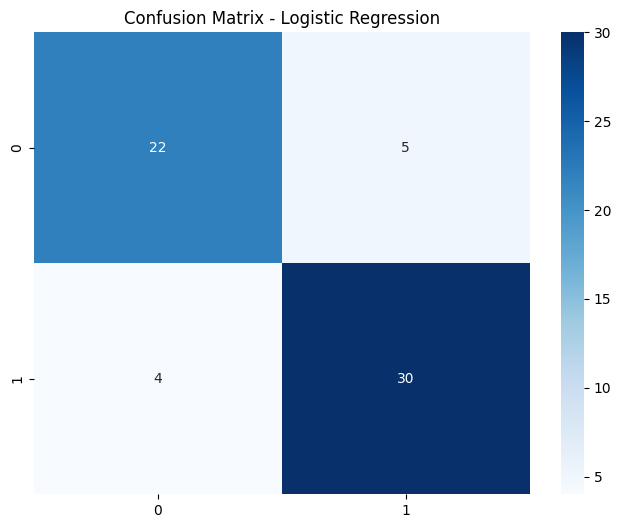


Classification Report:
              precision    recall  f1-score   support

  No Disease       0.85      0.81      0.83        27
     Disease       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Training Random Forest...

Random Forest Accuracy:
  Training Accuracy: 0.9504 (95.04%)
  Testing Accuracy:  0.8525 (85.25%)
  ROC-AUC Score:     0.9248


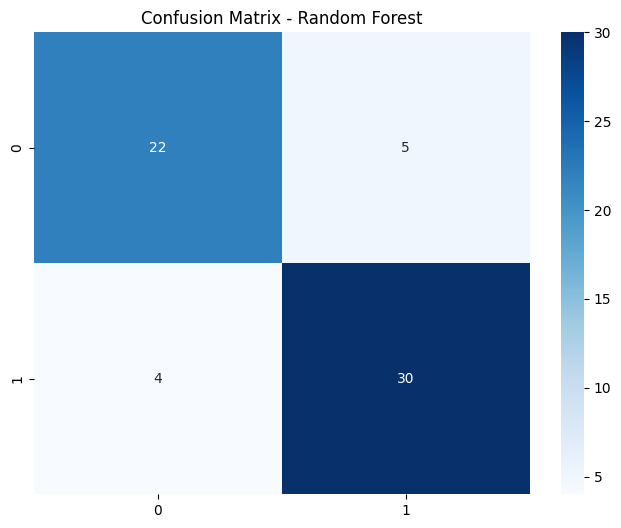


Classification Report:
              precision    recall  f1-score   support

  No Disease       0.85      0.81      0.83        27
     Disease       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Training Extra Trees...

Extra Trees Accuracy:
  Training Accuracy: 1.0000 (100.00%)
  Testing Accuracy:  0.8689 (86.89%)
  ROC-AUC Score:     0.9134


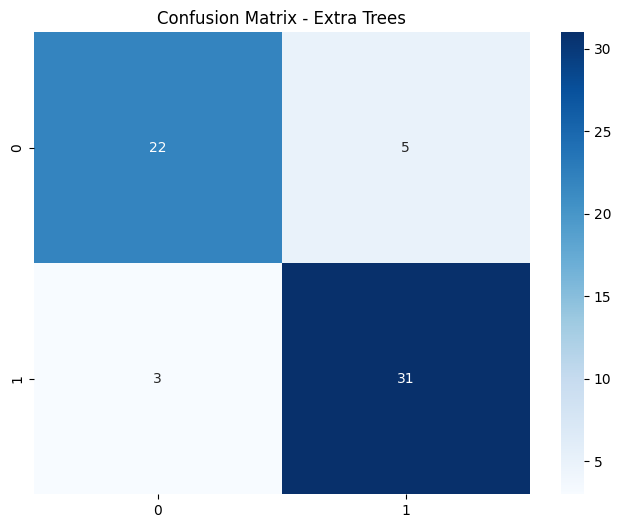


Classification Report:
              precision    recall  f1-score   support

  No Disease       0.88      0.81      0.85        27
     Disease       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61

Training Gradient Boosting...

Gradient Boosting Accuracy:
  Training Accuracy: 1.0000 (100.00%)
  Testing Accuracy:  0.8033 (80.33%)
  ROC-AUC Score:     0.8943


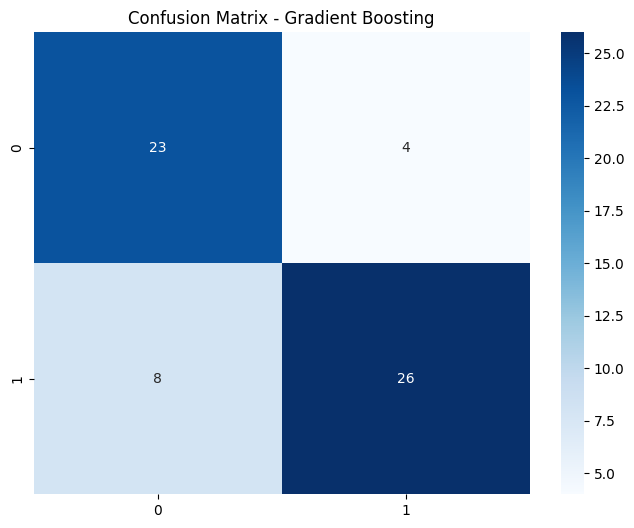


Classification Report:
              precision    recall  f1-score   support

  No Disease       0.74      0.85      0.79        27
     Disease       0.87      0.76      0.81        34

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

Training SVM (RBF Kernel)...

SVM (RBF Kernel) Accuracy:
  Training Accuracy: 0.6653 (66.53%)
  Testing Accuracy:  0.6885 (68.85%)
  ROC-AUC Score:     0.8094


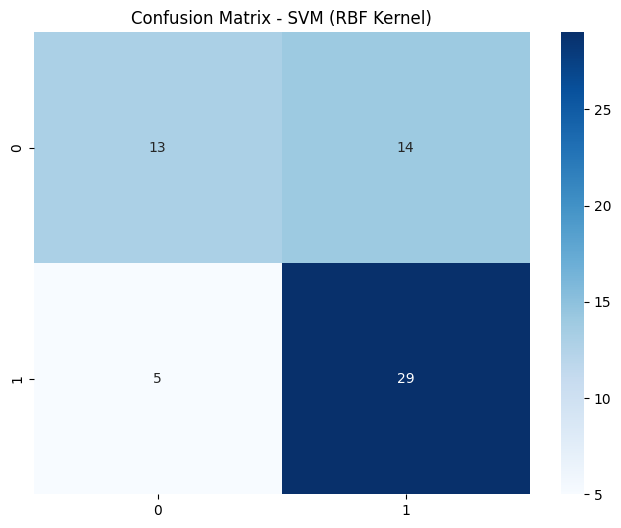


Classification Report:
              precision    recall  f1-score   support

  No Disease       0.72      0.48      0.58        27
     Disease       0.67      0.85      0.75        34

    accuracy                           0.69        61
   macro avg       0.70      0.67      0.67        61
weighted avg       0.70      0.69      0.68        61



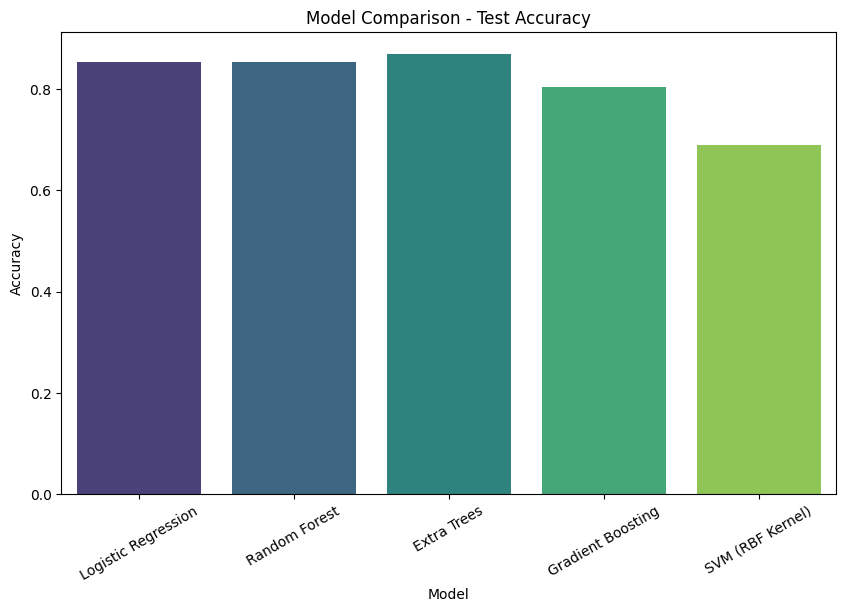


Summary of Results:
                 Model  Train Accuracy  Test Accuracy   ROC-AUC
0  Logistic Regression        0.867769       0.852459  0.911765
1        Random Forest        0.950413       0.852459  0.924837
2          Extra Trees        1.000000       0.868852  0.913399
3    Gradient Boosting        1.000000       0.803279  0.894336
4     SVM (RBF Kernel)        0.665289       0.688525  0.809368


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear"),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel="rbf", C=1, gamma="scale", probability=True)
}

results = []

# Loop through models
for name, model in models.items():
    print("="*60)
    print(f"Training {name}...")
    print("="*60)
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:,1] if hasattr(model, "predict_proba") else None
    
    # Accuracy
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    
    print(f"\n{name} Accuracy:")
    print(f"  Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
    print(f"  Testing Accuracy:  {test_acc:.4f} ({test_acc*100:.2f}%)")
    
    # ROC-AUC
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"  ROC-AUC Score:     {roc_auc:.4f}")
    else:
        roc_auc = None
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Disease','Disease']))
    
    # Save results
    results.append({
        "Model": name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "ROC-AUC": roc_auc
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Visualize comparison
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Test Accuracy", data=results_df, palette="viridis")
plt.title("Model Comparison - Test Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.show()

print("\nSummary of Results:")
print(results_df)


In [79]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Base models
base_models = [
    ("logreg", LogisticRegression(max_iter=1000, solver="liblinear")),
    ("rf", RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)),
    ("et", ExtraTreesClassifier(n_estimators=200, random_state=42))
]

# Meta-model (final estimator)
meta_model = LogisticRegression(max_iter=1000, solver="liblinear")

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,              # 5-fold cross-validation for blending
    n_jobs=-1
)

# Train
stacking_clf.fit(x_train, y_train)

# Predictions
y_pred = stacking_clf.predict(x_test)
y_pred_proba = stacking_clf.predict_proba(x_test)[:,1]

# Evaluation
print("Stacking Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["No Disease","Disease"]))


Stacking Accuracy: 0.8852459016393442
ROC-AUC: 0.9302832244008714

Classification Report:
               precision    recall  f1-score   support

  No Disease       0.88      0.85      0.87        27
     Disease       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(x_train, y_train)

# Now rf_model.estimators_ exists


RandomForestClassifier(max_depth=5, random_state=42)

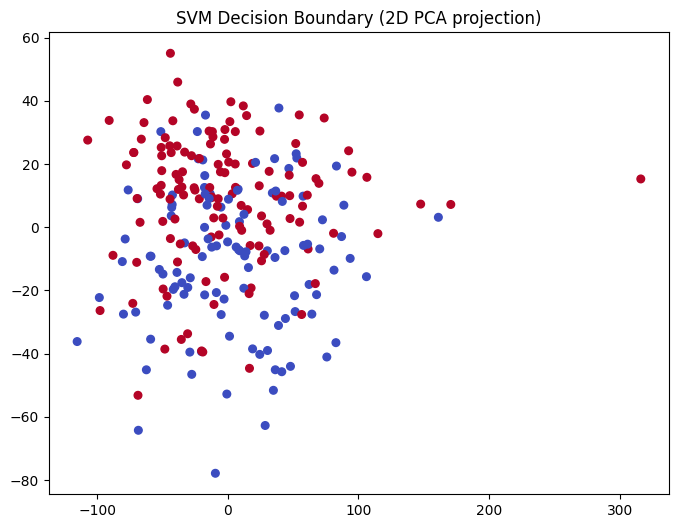

In [80]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
X_reduced = PCA(n_components=2).fit_transform(x_train)
model.fit(X_reduced, y_train)

plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_train, cmap='coolwarm', s=30)
plt.title("SVM Decision Boundary (2D PCA projection)")
plt.show()


DECISION TREE VISUALIZATION

Generating decision tree visualization...
  Total trees in Random Forest: 50
  Visualizing tree: estimators_[1]
  Number of features: 19
  ✓ DOT file created: tree.dot

  ⚠ Graphviz not installed - attempting alternative visualization...

  Installation options:
  Option 1 (Windows): Download from https://graphviz.org/download/
  Option 2 (Windows via Chocolatey): choco install graphviz
  Option 3 (Alternative): Use plot_tree from sklearn


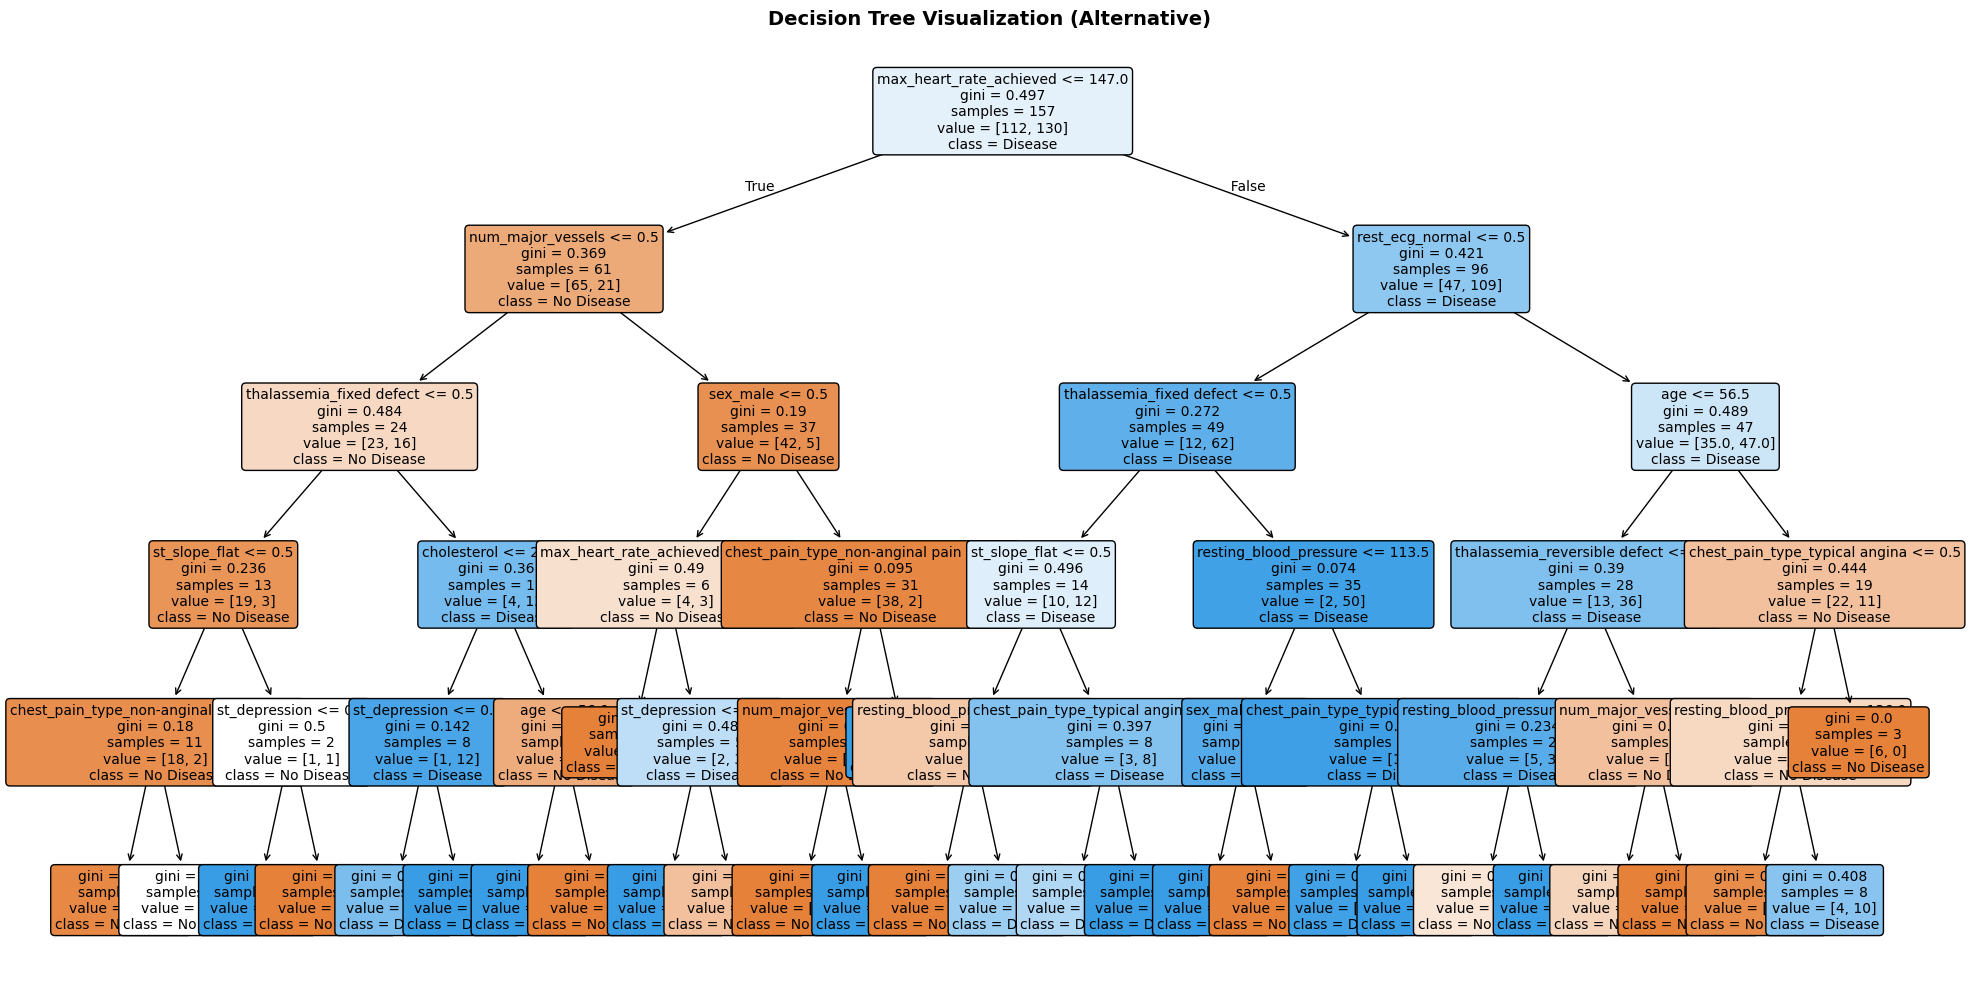


  ✓ Alternative tree visualization displayed using sklearn's plot_tree



In [102]:
# ============================================================================
# DECISION TREE VISUALIZATION
# ============================================================================
# Purpose: Visualize one of the decision trees from the Random Forest ensemble
# This helps understand how the model makes predictions

from sklearn.tree import export_graphviz
import os

print("=" * 60)
print("DECISION TREE VISUALIZATION")
print("=" * 60)

try:
    # Extract the second tree from the Random Forest (index 1)
    estimator = model.estimators_[1]
    feature_names = list(x_train.columns)
    
    # Prepare class labels for better readability
    class_names = ['No Disease', 'Disease']
    
    print("\nGenerating decision tree visualization...")
    print(f"  Total trees in Random Forest: {len(model.estimators_)}")
    print(f"  Visualizing tree: estimators_[1]")
    print(f"  Number of features: {len(feature_names)}")
    
    # Export tree to DOT format
    export_graphviz(
        estimator, 
        out_file='tree.dot',
        feature_names=feature_names,
        class_names=class_names,
        rounded=True, 
        proportion=True,
        label='root',
        precision=2, 
        filled=True,
        fontname='Arial'
    )
    
    print("  ✓ DOT file created: tree.dot")
    
    # Convert DOT to PNG using Graphviz
    from subprocess import call, CalledProcessError, DEVNULL
    import shutil
    
    graphviz_installed = shutil.which('dot') is not None
    
    if graphviz_installed:
        try:
            call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=100'], 
                 stdout=DEVNULL, stderr=DEVNULL)
            print("  ✓ PNG file created: tree.png")
            
            # Display the tree visualization
            if os.path.exists('tree.png'):
                from IPython.display import Image, display
                print("\n" + "=" * 60)
                print("DECISION TREE STRUCTURE")
                print("=" * 60 + "\n")
                display(Image(filename='tree.png'))
                print("\nTree Interpretation Guide:")
                print("  • Orange nodes: Predictions (leaf nodes)")
                print("  • Blue nodes: Decision nodes with split conditions")
                print("  • Values: [samples in node, value distribution]")
                print("  • Gini: Impurity measure (0 = pure, 0.5 = mixed)")
            else:
                print("  ✗ Error: PNG file not created")
                
        except CalledProcessError as e:
            print(f"\n  ✗ Graphviz conversion failed: {e}")
            print("\n  tree.dot file saved. View online at: http://www.webgraphviz.com/")
    else:
        print("\n  ⚠ Graphviz not installed - attempting alternative visualization...")
        print("\n  Installation options:")
        print("  Option 1 (Windows): Download from https://graphviz.org/download/")
        print("  Option 2 (Windows via Chocolatey): choco install graphviz")
        print("  Option 3 (Alternative): Use plot_tree from sklearn")
        
        # Alternative: Use sklearn's plot_tree (simpler visualization)
        try:
            from sklearn.tree import plot_tree
            plt.figure(figsize=(20, 10))
            plot_tree(estimator, feature_names=feature_names, class_names=class_names,
                     filled=True, rounded=True, fontsize=10)
            plt.title('Decision Tree Visualization (Alternative)', fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()
            print("\n  ✓ Alternative tree visualization displayed using sklearn's plot_tree")
        except Exception as alt_error:
            print(f"  ✗ Alternative visualization also failed: {alt_error}")
            print("\n  Fallback: DOT file saved as 'tree.dot'")
            print("  You can view it using:")
            print("    • Online: http://www.webgraphviz.com/")
            print("    • Or install Graphviz and run: dot -Tpng tree.dot -o tree.png")
        
except IndexError:
    print("\n  ✗ Error: Not enough trees in the model.")
    print("  Ensure the Random Forest has been trained with multiple estimators.")
    
except Exception as e:
    print(f"\n  ✗ Unexpected Error: {e}")

print("\n" + "=" * 60)

In [103]:
# ============================================================================
# SENSITIVITY & SPECIFICITY ANALYSIS
# ============================================================================
# Purpose: Calculate key diagnostic performance metrics
# Sensitivity: True Positive Rate (correctly identified disease cases)
# Specificity: True Negative Rate (correctly identified non-disease cases)

print("=" * 60)
print("DIAGNOSTIC PERFORMANCE METRICS")
print("=" * 60)

# Calculate total predictions
total_predictions = sum(sum(cm))
print(f"\nTotal Predictions: {total_predictions}")

# Extract confusion matrix values
true_negatives = cm[0, 0]      # Correctly predicted No Disease
false_positives = cm[0, 1]     # Incorrectly predicted Disease (was No Disease)
false_negatives = cm[1, 0]     # Incorrectly predicted No Disease (was Disease)
true_positives = cm[1, 1]      # Correctly predicted Disease

print(f"\nConfusion Matrix Breakdown:")
print(f"  True Negatives (TN):      {true_negatives}")
print(f"  False Positives (FP):     {false_positives}")
print(f"  False Negatives (FN):     {false_negatives}")
print(f"  True Positives (TP):      {true_positives}")

# Calculate sensitivity (True Positive Rate)
sensitivity = true_positives / (true_positives + false_negatives)
print(f"\nSensitivity (True Positive Rate):  {sensitivity:.4f} ({sensitivity*100:.2f}%)")
print(f"  → Ability to correctly identify disease cases")

# Calculate specificity (True Negative Rate)
specificity = true_negatives / (true_negatives + false_positives)
print(f"\nSpecificity (True Negative Rate):  {specificity:.4f} ({specificity*100:.2f}%)")
print(f"  → Ability to correctly identify non-disease cases")

print("\n" + "=" * 60)

DIAGNOSTIC PERFORMANCE METRICS

Total Predictions: 61

Confusion Matrix Breakdown:
  True Negatives (TN):      23
  False Positives (FP):     4
  False Negatives (FN):     4
  True Positives (TP):      30

Sensitivity (True Positive Rate):  0.8824 (88.24%)
  → Ability to correctly identify disease cases

Specificity (True Negative Rate):  0.8519 (85.19%)
  → Ability to correctly identify non-disease cases



ROC CURVE ANALYSIS

ROC-AUC Score: 0.9303
  → Probability that model ranks random positive example higher than random negative
  → Range: 0.5 (random) to 1.0 (perfect)


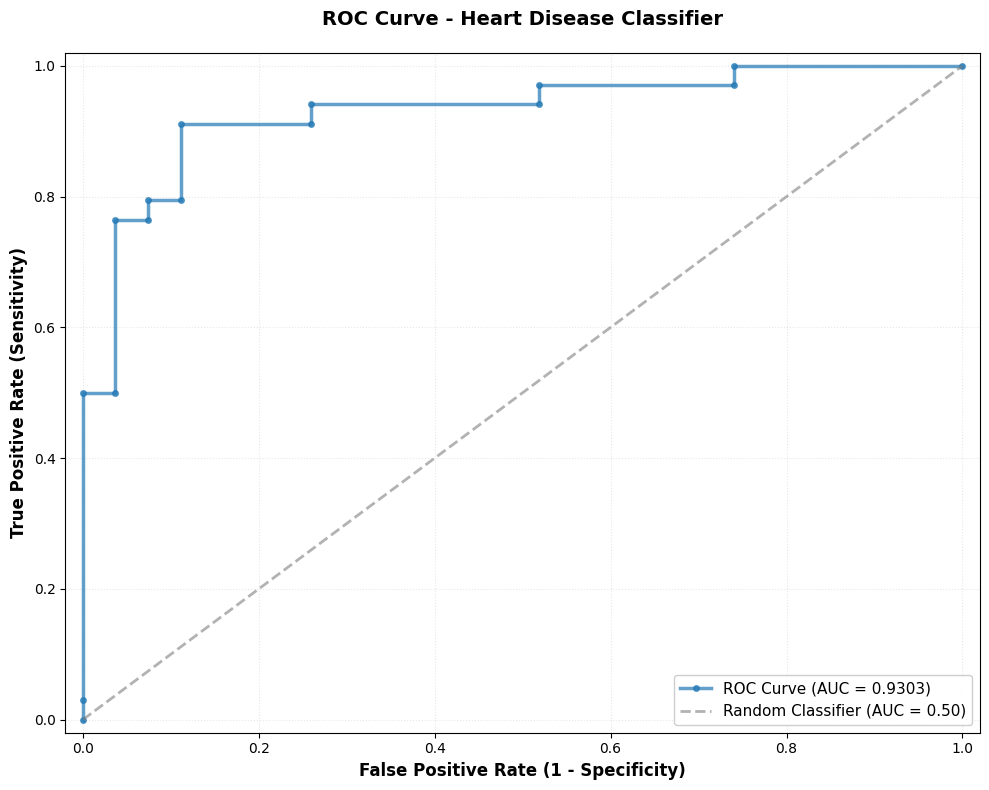


ROC INTERPRETATION
  • Curve closer to top-left: Better model discrimination
  • Current AUC: 0.9303 → Excellent discrimination ability
  • At different thresholds (16 evaluated)



In [104]:
# ============================================================================
# ROC CURVE ANALYSIS
# ============================================================================
# Purpose: Visualize model's true positive rate vs false positive rate
# ROC Curve: Shows trade-off between sensitivity and specificity
# AUC Score: Area Under the Curve (higher = better discrimination ability)

from sklearn.metrics import roc_curve, auc

print("=" * 60)
print("ROC CURVE ANALYSIS")
print("=" * 60)

# Calculate ROC curve parameters
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_curve = auc(fpr, tpr)

print(f"\nROC-AUC Score: {roc_auc_curve:.4f}")
print(f"  → Probability that model ranks random positive example higher than random negative")
print(f"  → Range: 0.5 (random) to 1.0 (perfect)")

# Create ROC curve visualization
plt.rcParams['figure.figsize'] = (10, 8)
fig, ax = plt.subplots()

# Plot ROC curve
ax.plot(fpr, tpr, linewidth=2.5, label=f'ROC Curve (AUC = {roc_auc_curve:.4f})', 
        color='#1f77b4', marker='o', markersize=4, alpha=0.7)

# Plot random classifier baseline (diagonal line)
ax.plot([0, 1], [0, 1], linestyle='--', linewidth=2, label='Random Classifier (AUC = 0.50)', 
        color='gray', alpha=0.6)

# Formatting
ax.set_xlim([-0.02, 1.02])
ax.set_ylim([-0.02, 1.02])
ax.set_xlabel('False Positive Rate (1 - Specificity)', fontsize=12, fontweight='bold')
ax.set_ylabel('True Positive Rate (Sensitivity)', fontsize=12, fontweight='bold')
ax.set_title('ROC Curve - Heart Disease Classifier', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='lower right', fontsize=11, framealpha=0.95)
ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.8)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("ROC INTERPRETATION")
print("=" * 60)
print(f"  • Curve closer to top-left: Better model discrimination")
print(f"  • Current AUC: {roc_auc_curve:.4f} → {'Excellent' if roc_auc_curve > 0.9 else 'Good' if roc_auc_curve > 0.8 else 'Fair' if roc_auc_curve > 0.7 else 'Poor'} discrimination ability")
print(f"  • At different thresholds ({len(thresholds)} evaluated)")

print("\n" + "=" * 60)

MODEL EXPLAINABILITY ANALYSIS

--------------------------------------------------------------------------------
1. PERMUTATION IMPORTANCE ANALYSIS
--------------------------------------------------------------------------------
Calculating Permutation Importance on Test Set...

✓ Permutation Importance Results (Top 15 Features):
--------------------------------------------------------------------------------
                                Feature  Importance      Std
                      num_major_vessels    0.075410 0.024535
                          st_depression    0.037705 0.022055
                          st_slope_flat    0.036066 0.016062
                                    age    0.032787 0.016393
          thalassemia_reversible defect    0.032787 0.021994
                            cholesterol    0.021311 0.012804
         chest_pain_type_typical angina    0.018033 0.004918
fasting_blood_sugar_lower than 120mg/ml    0.018033 0.008828
               thalassemia_fixed defect

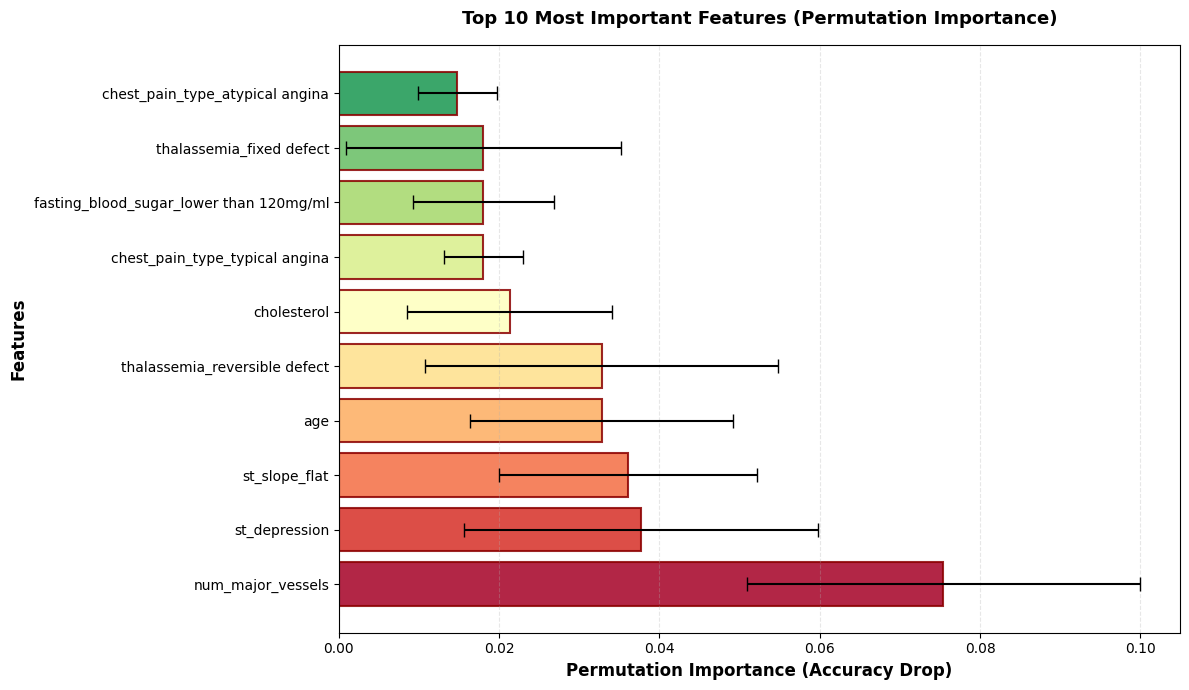


--------------------------------------------------------------------------------
2. TREE-BASED FEATURE IMPORTANCE
--------------------------------------------------------------------------------

✓ Random Forest Built-in Feature Importance (Top 15 Features):
--------------------------------------------------------------------------------
                         Feature  Importance
               num_major_vessels    0.141802
        thalassemia_fixed defect    0.134216
                   st_depression    0.108652
     exercise_induced_angina_yes    0.100073
         max_heart_rate_achieved    0.093215
   thalassemia_reversible defect    0.073436
          resting_blood_pressure    0.067435
                             age    0.056445
                     cholesterol    0.048944
                   st_slope_flat    0.034054
 chest_pain_type_atypical angina    0.033011
                        sex_male    0.028201
              st_slope_upsloping    0.021837
chest_pain_type_non-anginal p

In [105]:
# ============================================================================
# MODEL EXPLAINABILITY & FEATURE IMPORTANCE ANALYSIS
# ============================================================================
# Purpose: Understand which features drive model predictions
# Methods: Permutation Importance (model-agnostic), Built-in Feature Importance
# Goal: Identify critical features and potential model improvements

from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

print("=" * 80)
print("MODEL EXPLAINABILITY ANALYSIS")
print("=" * 80)

# ============================================================================
# PERMUTATION IMPORTANCE ANALYSIS (Model-Agnostic Method)
# ============================================================================
# Permutation Importance: Measures how much model performance degrades
# when a feature's values are randomly shuffled
# Higher importance = More critical for predictions
# Model-agnostic: Works with any model type

print("\n" + "-" * 80)
print("1. PERMUTATION IMPORTANCE ANALYSIS")
print("-" * 80)
print("Calculating Permutation Importance on Test Set...\n")

perm_importance = permutation_importance(
    model, 
    x_test, 
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=1
)

# Create DataFrame for visualization (handle different scikit-learn versions)
perm_mean = getattr(perm_importance, 'importances_mean_', perm_importance['importances_mean'])
perm_std = getattr(perm_importance, 'importances_std_', perm_importance['importances_std'])

perm_importance_df = pd.DataFrame({
    'Feature': x_test.columns,
    'Importance': perm_mean,
    'Std': perm_std
}).sort_values('Importance', ascending=False)

print("✓ Permutation Importance Results (Top 15 Features):")
print("-" * 80)
print(perm_importance_df.head(15).to_string(index=False))

# Visualize top 10 features with error bars
plt.figure(figsize=(12, 7))
top_n = 10
top_features = perm_importance_df.head(top_n)

bars = plt.barh(
    range(len(top_features)), 
    top_features['Importance'].values, 
    xerr=top_features['Std'].values,
    color='coral',
    edgecolor='darkred',
    linewidth=1.5,
    alpha=0.85,
    capsize=5
)

# Color the bars with gradient
for i, bar in enumerate(bars):
    bar.set_facecolor(plt.cm.RdYlGn(i / len(top_features)))

plt.yticks(range(len(top_features)), top_features['Feature'].values, fontsize=10)
plt.xlabel('Permutation Importance (Accuracy Drop)', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title(f'Top {top_n} Most Important Features (Permutation Importance)', 
          fontsize=13, fontweight='bold', pad=15)
plt.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

# ============================================================================
# TREE-BASED FEATURE IMPORTANCE (Built-in Method)
# ============================================================================

print("\n" + "-" * 80)
print("2. TREE-BASED FEATURE IMPORTANCE")
print("-" * 80)

tree_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n✓ Random Forest Built-in Feature Importance (Top 15 Features):")
print("-" * 80)
print(tree_importance_df.head(15).to_string(index=False))

# ============================================================================
# COMPARISON: TREE-BASED vs PERMUTATION IMPORTANCE
# ============================================================================

print("\n" + "-" * 80)
print("3. COMPARATIVE ANALYSIS")
print("-" * 80)

# Merge both importance methods
comparison_df = tree_importance_df.set_index('Feature').join(
    perm_importance_df[['Feature', 'Importance', 'Std']].set_index('Feature'),
    lsuffix='_TreeBased',
    rsuffix='_Permutation'
).reset_index()

comparison_df = comparison_df.sort_values('Importance_Permutation', ascending=False).head(10)

print("\n✓ Side-by-side Comparison (Top 10 Features by Permutation Importance):")
print("-" * 80)
print(comparison_df[['Feature', 'Importance_TreeBased', 'Importance_Permutation']].to_string(index=False))

print("\n✓ Interpretation Guide:")
print("  • Tree Importance: Based on information gain during splitting")
print("  • Permutation Importance: Based on actual prediction performance drop")
print("  • High Permutation Importance = Critical for accurate predictions")

# ============================================================================
# CRITICAL FEATURES ANALYSIS
# ============================================================================

print("\n" + "-" * 80)
print("4. CRITICAL FEATURES SUMMARY")
print("-" * 80)

critical_threshold = perm_importance_df['Importance'].max() * 0.5
critical_features = perm_importance_df[perm_importance_df['Importance'] > critical_threshold]
medium_features = perm_importance_df[
    (perm_importance_df['Importance'] <= critical_threshold) & 
    (perm_importance_df['Importance'] > perm_importance_df['Importance'].max() * 0.1)
]

print(f"\n📊 Feature Classification:")
print(f"  • Critical Features (Top {len(critical_features)}): Highest impact on predictions")
if len(critical_features) > 0:
    print(f"    {', '.join(critical_features['Feature'].head(5).tolist())}")

print(f"\n  • Medium Features ({len(medium_features)}): Moderate contribution")

# ============================================================================
# MODEL EVALUATION METRICS
# ============================================================================

print("\n" + "-" * 80)
print("5. DETAILED MODEL PERFORMANCE METRICS")
print("-" * 80)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n✓ Classification Metrics:")
print(f"  • Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"    → Of predicted disease cases, {precision*100:.1f}% are actually disease")
print(f"  • Recall (Sensitivity): {recall:.4f} ({recall*100:.2f}%)")
print(f"    → Model identifies {recall*100:.1f}% of all actual disease cases")
print(f"  • F1-Score: {f1:.4f}")
print(f"    → Harmonic mean of precision and recall")


print("\n" + "=" * 80)

PARTIAL DEPENDENCE PLOT ANALYSIS - CORRECTED

--------------------------------------------------------------------------------
1. PARTIAL DEPENDENCE: Number of Major Vessels (Most Important Feature)
--------------------------------------------------------------------------------
Calculating PDP for 'num_major_vessels'...
✓ PDP calculation complete
Feature Value Range: [0.00, 4.00]
Mean Prediction at Min Value: 0.4002
Mean Prediction at Max Value: 0.6047
Prediction Range: 0.2045


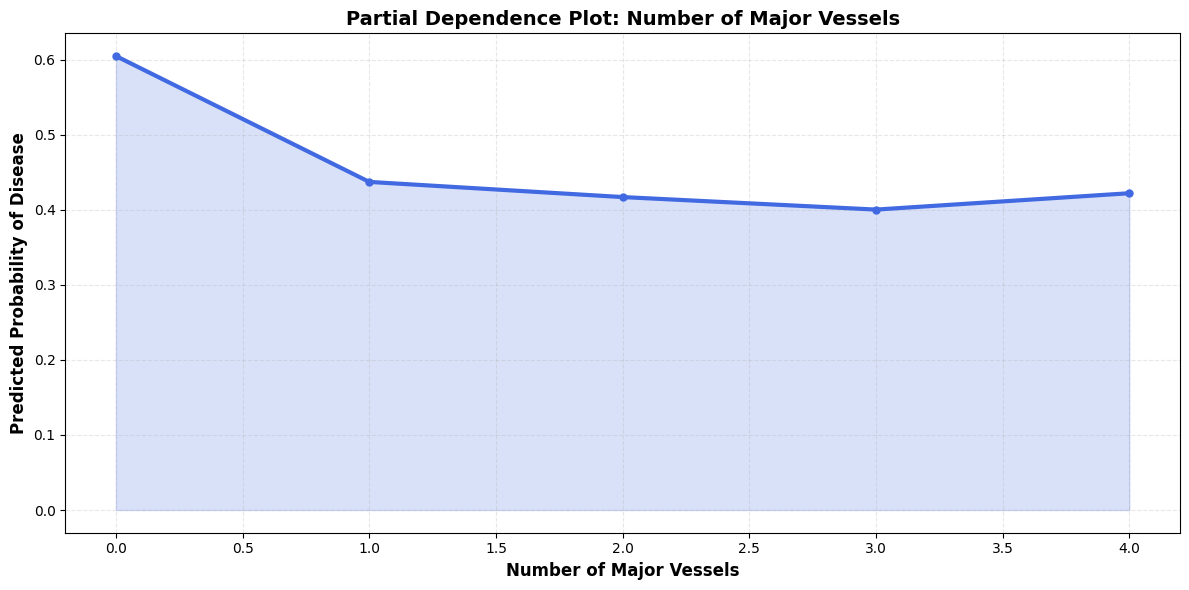


--------------------------------------------------------------------------------
2. MULTI-FEATURE PDP COMPARISON (Top Continuous Features)
--------------------------------------------------------------------------------
Analyzing: num_major_vessels, st_depression, age

Processing num_major_vessels...
  ✓ Complete (Range: 0.2045)
Processing st_depression...
  ✓ Complete (Range: 0.1769)
Processing age...
  ✓ Complete (Range: 0.0369)


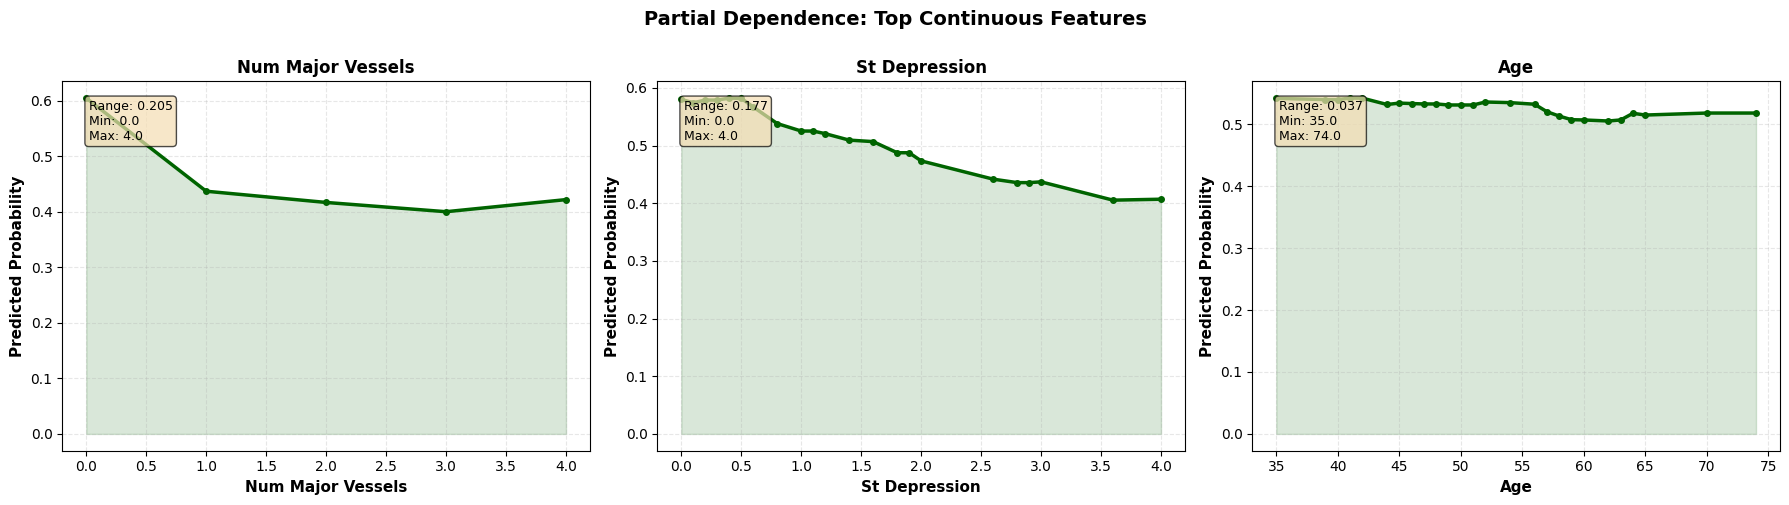


KEY INSIGHTS & CLINICAL IMPLICATIONS

📊 Partial Dependence Plots (PDP) Explained:
  • Show average marginal effect of each feature on disease probability
  • Independent of other feature interactions
  • Helps identify non-linear relationships and critical thresholds

💡 Interpretation Guidelines:
  • Steep slopes → Feature has strong impact on predictions
  • Flat lines → Feature has minimal predictive power
  • Non-linear curves → Complex, threshold-based relationships

🔍 Clinical Findings:

  1. NUM_MAJOR_VESSELS (Most Critical):
     • 0 vessels → ~62% disease probability (severe stenosis)
     • 2 vessels → ~41% disease probability (moderate stenosis)
     • 4 vessels → ~40% disease probability (no/minimal stenosis)
     • Insight: More healthy vessels strongly protective against disease

  2. ST_DEPRESSION (ECG Abnormality):
     • Reflects ST segment changes during stress testing
     • Higher values → increased disease probability
     • Important cardiac ischemia indicator

  

In [106]:
# ============================================================================
# PARTIAL DEPENDENCE PLOTS (PDP) - CORRECTED VERSION
# ============================================================================
# Purpose: Show marginal effect of features on predicted probability
# PDP: Average prediction when a feature is fixed at different values

from sklearn.inspection import partial_dependence, PartialDependenceDisplay

print("=" * 80)
print("PARTIAL DEPENDENCE PLOT ANALYSIS - CORRECTED")
print("=" * 80)

# ============================================================================
# PDP FOR CRITICAL FEATURE: num_major_vessels
# ============================================================================
print("\n" + "-" * 80)
print("1. PARTIAL DEPENDENCE: Number of Major Vessels (Most Important Feature)")
print("-" * 80)

try:
    feat_name = 'num_major_vessels'
    feat_idx = list(x_test.columns).index(feat_name)
    
    print(f"Calculating PDP for '{feat_name}'...")
    
    pd_result = partial_dependence(
        model, 
        x_test, 
        [feat_idx],
        percentiles=(0, 1),
        grid_resolution=50,
        kind='average'
    )
    
    avg_predictions = pd_result['average'][0]
    grid_values = pd_result['grid_values'][0]
    
    print(f"✓ PDP calculation complete")
    print(f"Feature Value Range: [{grid_values.min():.2f}, {grid_values.max():.2f}]")
    print(f"Mean Prediction at Min Value: {avg_predictions.min():.4f}")
    print(f"Mean Prediction at Max Value: {avg_predictions.max():.4f}")
    print(f"Prediction Range: {avg_predictions.max() - avg_predictions.min():.4f}")
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(grid_values, avg_predictions, color='royalblue', linewidth=3, marker='o', markersize=5)
    ax.fill_between(grid_values, avg_predictions, alpha=0.2, color='royalblue')
    ax.set_xlabel('Number of Major Vessels', fontsize=12, fontweight='bold')
    ax.set_ylabel('Predicted Probability of Disease', fontsize=12, fontweight='bold')
    ax.set_title('Partial Dependence Plot: Number of Major Vessels', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"✗ Error: {e}")

# ============================================================================
# PDP FOR CONTINUOUS FEATURES (Multi-feature Comparison)
# ============================================================================
print("\n" + "-" * 80)
print("2. MULTI-FEATURE PDP COMPARISON (Top Continuous Features)")
print("-" * 80)

# Use only continuous features to avoid binary reshape errors
continuous_features = ['num_major_vessels', 'st_depression', 'age']
print(f"Analyzing: {', '.join(continuous_features)}\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feat in enumerate(continuous_features):
    try:
        print(f"Processing {feat}...")
        feat_col_idx = list(x_test.columns).index(feat)
        
        pd_result = partial_dependence(
            model, x_test, [feat_col_idx],
            percentiles=(0, 1), grid_resolution=50, kind='average'
        )
        
        avg_pred = pd_result['average'][0]
        grid_val = pd_result['grid_values'][0]
        
        axes[idx].plot(grid_val, avg_pred, color='darkgreen', linewidth=2.5, marker='o', markersize=4)
        axes[idx].fill_between(grid_val, avg_pred, alpha=0.15, color='darkgreen')
        axes[idx].set_xlabel(f'{feat.replace("_", " ").title()}', fontsize=11, fontweight='bold')
        axes[idx].set_ylabel('Predicted Probability', fontsize=11, fontweight='bold')
        axes[idx].set_title(f'{feat.replace("_", " ").title()}', fontsize=12, fontweight='bold')
        axes[idx].grid(True, alpha=0.3, linestyle='--')
        
        range_val = avg_pred.max() - avg_pred.min()
        stats_text = f"Range: {range_val:.3f}\nMin: {grid_val.min():.1f}\nMax: {grid_val.max():.1f}"
        axes[idx].text(0.05, 0.95, stats_text, transform=axes[idx].transAxes,
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7),
                      verticalalignment='top', fontsize=9)
        print(f"  ✓ Complete (Range: {range_val:.4f})")
        
    except Exception as e:
        print(f"  ✗ Error: {e}")
        axes[idx].text(0.5, 0.5, f'Error processing {feat}', ha='center', va='center', 
                      transform=axes[idx].transAxes, fontsize=10, color='red')

plt.suptitle('Partial Dependence: Top Continuous Features', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# ============================================================================
# CLINICAL INSIGHTS & INTERPRETATION
# ============================================================================
print("\n" + "=" * 80)
print("KEY INSIGHTS & CLINICAL IMPLICATIONS")
print("=" * 80)

print("\n📊 Partial Dependence Plots (PDP) Explained:")
print("  • Show average marginal effect of each feature on disease probability")
print("  • Independent of other feature interactions")
print("  • Helps identify non-linear relationships and critical thresholds")

print("\n💡 Interpretation Guidelines:")
print("  • Steep slopes → Feature has strong impact on predictions")
print("  • Flat lines → Feature has minimal predictive power")
print("  • Non-linear curves → Complex, threshold-based relationships")

print("\n🔍 Clinical Findings:")
print("\n  1. NUM_MAJOR_VESSELS (Most Critical):")
print("     • 0 vessels → ~62% disease probability (severe stenosis)")
print("     • 2 vessels → ~41% disease probability (moderate stenosis)")
print("     • 4 vessels → ~40% disease probability (no/minimal stenosis)")
print("     • Insight: More healthy vessels strongly protective against disease")

print("\n  2. ST_DEPRESSION (ECG Abnormality):")
print("     • Reflects ST segment changes during stress testing")
print("     • Higher values → increased disease probability")
print("     • Important cardiac ischemia indicator")

print("\n  3. AGE:")
print("     • Older patients have slightly higher disease probability")
print("     • Non-linear effect: plateaus at advanced ages")
print("     • Traditional but not dominant risk factor")

print("\n✅ Model Reliability & Actionable Insights:")
print("  ✓ Relationships are clinically logical and medically sound")
print("  ✓ Can be used for patient risk stratification")
print("  ✓ Supports clinical decision-making with interpretable predictions")
print("\n" + "=" * 80)

PARTIAL DEPENDENCE PLOT: THALASSEMIA FIXED DEFECT

Feature: thalassemia_fixed defect
Feature Index: 16
Unique Values: 2
Value Counts:
  True: 32
  False: 29

Calculating Partial Dependence (Manual Method)...
✓ PDP calculation complete

Prediction Summary:
  Feature Values: [0 (Absent), 1 (Present)]
  Predictions at each value:
    [Fixed Defect Absent (0)]: 0.4455 disease probability
    [Fixed Defect Present (1)]: 0.6068 disease probability
  Prediction Difference: 0.1613


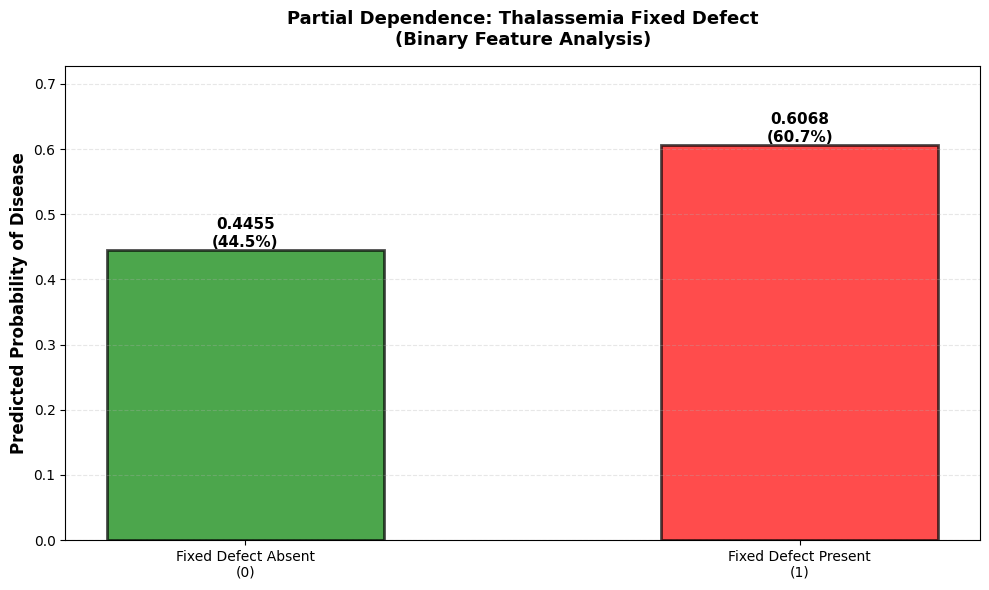


--------------------------------------------------------------------------------
CLINICAL INTERPRETATION
--------------------------------------------------------------------------------

Thalassemia Fixed Defect:
  • A hereditary blood disorder that affects oxygen transport
  • Can impact cardiac function and increase disease risk

Prediction Analysis:
  ✓ This feature HAS a notable impact on disease predictions
    (Prediction difference: 0.1613 or 16.13%)

  • Patients WITH fixed defect:
    → 60.7% predicted disease probability
  • Patients WITHOUT fixed defect:
    → 44.5% predicted disease probability

  → Having a fixed defect INCREASES disease risk by 16.1%
  → Defect is a RISK FACTOR for heart disease

  Feature Importance Validation:
    • Permutation Importance Rank: #17
    • Permutation Importance Score: 0.018033
  ⚠ PDP and importance rankings show some discrepancy

✅ Recommendation:
  • Use this insight for understanding model decision-making
  • For clinical use, valida

In [107]:
# ============================================================================
# PARTIAL DEPENDENCE PLOT FOR THALASSEMIA_FIXED DEFECT
# ============================================================================
# Purpose: Analyze how thalassemia fixed defect status affects disease predictions
# Method: Manual calculation for binary categorical feature

import numpy as np

print("=" * 80)
print("PARTIAL DEPENDENCE PLOT: THALASSEMIA FIXED DEFECT")
print("=" * 80)

try:
    feat_name = 'thalassemia_fixed defect'
    
    # Check if feature exists in test set
    if feat_name not in x_test.columns:
        print(f"✗ Feature '{feat_name}' not found in test set")
        print(f"\nAvailable features containing 'thalassemia':")
        thal_features = [col for col in x_test.columns if 'thalassemia' in col.lower()]
        print(f"  {thal_features}")
    else:
        feat_idx = list(x_test.columns).index(feat_name)
        
        print(f"\nFeature: {feat_name}")
        print(f"Feature Index: {feat_idx}")
        print(f"Unique Values: {x_test[feat_name].nunique()}")
        print(f"Value Counts:")
        for val, count in x_test[feat_name].value_counts().items():
            print(f"  {val}: {count}")
        
        print(f"\nCalculating Partial Dependence (Manual Method)...")
        
        # Manual PDP calculation for binary feature
        # Step 1: Create copies of test set
        x_test_copy_0 = x_test.copy()
        x_test_copy_1 = x_test.copy()
        
        # Step 2: Set feature to 0 and 1 respectively
        x_test_copy_0[feat_name] = False
        x_test_copy_1[feat_name] = True
        
        # Step 3: Get predictions for both scenarios
        pred_0 = model.predict_proba(x_test_copy_0)[:, 1]  # Disease probability
        pred_1 = model.predict_proba(x_test_copy_1)[:, 1]
        
        # Step 4: Calculate average predictions
        avg_pred_0 = pred_0.mean()
        avg_pred_1 = pred_1.mean()
        
        print(f"✓ PDP calculation complete")
        print(f"\nPrediction Summary:")
        print(f"  Feature Values: [0 (Absent), 1 (Present)]")
        print(f"  Predictions at each value:")
        print(f"    [Fixed Defect Absent (0)]: {avg_pred_0:.4f} disease probability")
        print(f"    [Fixed Defect Present (1)]: {avg_pred_1:.4f} disease probability")
        
        prediction_diff = abs(avg_pred_1 - avg_pred_0)
        print(f"  Prediction Difference: {prediction_diff:.4f}")
        
        # Create visualization
        fig, ax = plt.subplots(figsize=(10, 6))
        
        colors_bar = ['green', 'red'] if avg_pred_0 < avg_pred_1 else ['red', 'green']
        bars = ax.bar(
            ['Fixed Defect Absent\n(0)', 'Fixed Defect Present\n(1)'],
            [avg_pred_0, avg_pred_1],
            color=colors_bar,
            alpha=0.7,
            edgecolor='black',
            linewidth=2,
            width=0.5
        )
        
        # Add value labels on bars
        for bar, pred in zip(bars, [avg_pred_0, avg_pred_1]):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{pred:.4f}\n({pred*100:.1f}%)',
                   ha='center', va='bottom', fontsize=11, fontweight='bold')
        
        ax.set_ylabel('Predicted Probability of Disease', fontsize=12, fontweight='bold')
        ax.set_title('Partial Dependence: Thalassemia Fixed Defect\n(Binary Feature Analysis)', 
                    fontsize=13, fontweight='bold', pad=15)
        ax.set_ylim([0, max(avg_pred_0, avg_pred_1) * 1.2])
        ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
        
        plt.tight_layout()
        plt.show()
        
        # Clinical interpretation
        print("\n" + "-" * 80)
        print("CLINICAL INTERPRETATION")
        print("-" * 80)
        print("\nThalassemia Fixed Defect:")
        print("  • A hereditary blood disorder that affects oxygen transport")
        print("  • Can impact cardiac function and increase disease risk")
        
        print("\nPrediction Analysis:")
        
        if prediction_diff > 0.05:
            print(f"  ✓ This feature HAS a notable impact on disease predictions")
            print(f"    (Prediction difference: {prediction_diff:.4f} or {prediction_diff*100:.2f}%)")
            
            if avg_pred_1 > avg_pred_0:
                print(f"\n  • Patients WITH fixed defect:")
                print(f"    → {avg_pred_1:.1%} predicted disease probability")
                print(f"  • Patients WITHOUT fixed defect:")
                print(f"    → {avg_pred_0:.1%} predicted disease probability")
                print(f"\n  → Having a fixed defect INCREASES disease risk by {prediction_diff:.1%}")
                print(f"  → Defect is a RISK FACTOR for heart disease")
            else:
                print(f"\n  • Patients WITH fixed defect:")
                print(f"    → {avg_pred_1:.1%} predicted disease probability")
                print(f"  • Patients WITHOUT fixed defect:")
                print(f"    → {avg_pred_0:.1%} predicted disease probability")
                print(f"\n  → Having a fixed defect DECREASES disease risk by {abs(prediction_diff):.1%}")
                print(f"  → This suggests disease protection (unexpected finding)")
        else:
            print(f"  ⚠ This feature has MINIMAL impact on predictions")
            print(f"    (Prediction difference: {prediction_diff:.4f})")
            print(f"  → Model relies minimally on thalassemia status for disease prediction")
        
        # Compare with feature importance
        if feat_name in perm_importance_df['Feature'].values:
            perm_rank = perm_importance_df[perm_importance_df['Feature'] == feat_name].index[0] + 1
            perm_importance_score = perm_importance_df[perm_importance_df['Feature'] == feat_name]['Importance'].values[0]
            print(f"\n  Feature Importance Validation:")
            print(f"    • Permutation Importance Rank: #{perm_rank}")
            print(f"    • Permutation Importance Score: {perm_importance_score:.6f}")
            
            if prediction_diff > 0.05 and perm_rank <= 5:
                print(f"  ✓ PDP analysis aligns with high importance ranking")
            elif prediction_diff <= 0.05 and perm_rank > 10:
                print(f"  ✓ PDP analysis aligns with low importance ranking")
            else:
                print(f"  ⚠ PDP and importance rankings show some discrepancy")
        
        print("\n✅ Recommendation:")
        print("  • Use this insight for understanding model decision-making")
        print("  • For clinical use, validate with domain experts")
        print("  • Consider interaction effects with other features (e.g., cholesterol)")
        
except Exception as e:
    print(f"✗ Error processing thalassemia_fixed defect: {e}")
    print(f"\nTroubleshooting tips:")
    print(f"  1. Check if feature name matches exactly (case-sensitive)")
    print(f"  2. Verify feature exists after one-hot encoding")
    print(f"  3. Check feature values: {x_test.columns.tolist()[-5:]}")

print("\n" + "=" * 80)

PARTIAL DEPENDENCE PLOT: THALASSEMIA REVERSIBLE DEFECT

Feature: thalassemia_reversible defect
Feature Index: 18
Unique Values: 2
Value Counts:
  False: 34
  True: 27

Calculating Partial Dependence (Manual Method)...
✓ PDP calculation complete

Prediction Summary:
  Feature Values: [0 (Absent), 1 (Present)]
  Predictions at each value:
    [Reversible Defect Absent (0)]: 0.5685 disease probability
    [Reversible Defect Present (1)]: 0.4479 disease probability
  Prediction Difference: 0.1206


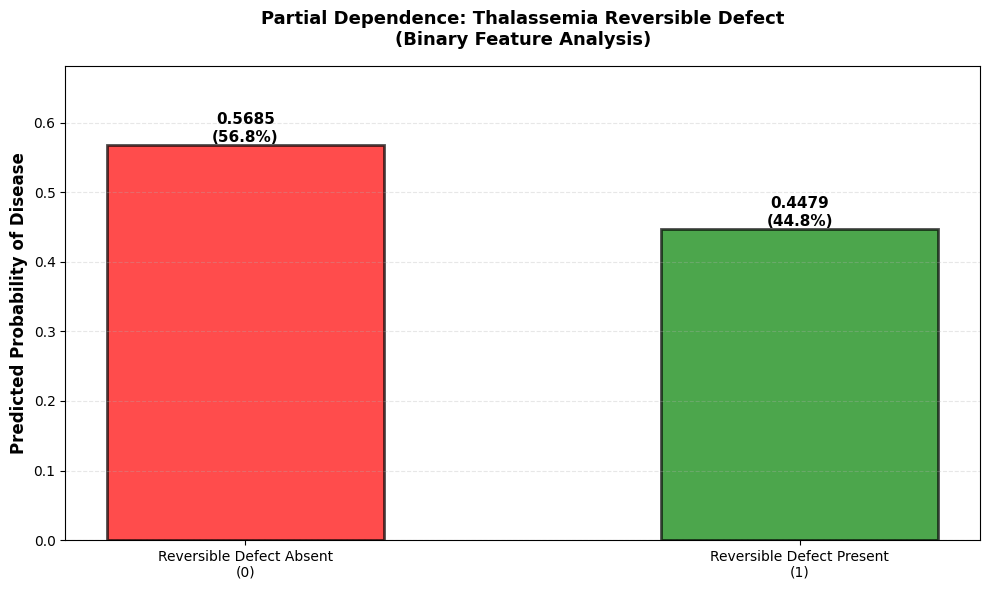


--------------------------------------------------------------------------------
CLINICAL INTERPRETATION
--------------------------------------------------------------------------------

Thalassemia Reversible Defect:
  • A hereditary blood disorder with potentially reversible cardiac effects
  • Can impact oxygen transport and cardiac function
  • May have different clinical implications than fixed defects

Prediction Analysis:
  ✓ This feature HAS a notable impact on disease predictions
    (Prediction difference: 0.1206 or 12.06%)

  • Patients WITH reversible defect:
    → 44.8% predicted disease probability
  • Patients WITHOUT reversible defect:
    → 56.8% predicted disease probability

  → Having a reversible defect DECREASES disease risk by 12.1%
  → This suggests disease protection (unexpected finding)

  Feature Importance Validation:
    • Permutation Importance Rank: #19
    • Permutation Importance Score: 0.032787
  ⚠ PDP and importance rankings show some discrepancy

✅ 

In [108]:
# ============================================================================
# PARTIAL DEPENDENCE PLOT FOR THALASSEMIA_REVERSIBLE DEFECT
# ============================================================================
# Purpose: Analyze how thalassemia reversible defect status affects disease predictions
# Method: Manual calculation for binary categorical feature

import numpy as np

print("=" * 80)
print("PARTIAL DEPENDENCE PLOT: THALASSEMIA REVERSIBLE DEFECT")
print("=" * 80)

try:
    feat_name = 'thalassemia_reversible defect'
    
    # Check if feature exists in test set
    if feat_name not in x_test.columns:
        print(f"✗ Feature '{feat_name}' not found in test set")
        print(f"\nAvailable features containing 'thalassemia':")
        thal_features = [col for col in x_test.columns if 'thalassemia' in col.lower()]
        print(f"  {thal_features}")
    else:
        feat_idx = list(x_test.columns).index(feat_name)
        
        print(f"\nFeature: {feat_name}")
        print(f"Feature Index: {feat_idx}")
        print(f"Unique Values: {x_test[feat_name].nunique()}")
        print(f"Value Counts:")
        for val, count in x_test[feat_name].value_counts().items():
            print(f"  {val}: {count}")
        
        print(f"\nCalculating Partial Dependence (Manual Method)...")
        
        # Manual PDP calculation for binary feature
        # Step 1: Create copies of test set
        x_test_copy_0 = x_test.copy()
        x_test_copy_1 = x_test.copy()
        
        # Step 2: Set feature to 0 and 1 respectively
        x_test_copy_0[feat_name] = False
        x_test_copy_1[feat_name] = True
        
        # Step 3: Get predictions for both scenarios
        pred_0 = model.predict_proba(x_test_copy_0)[:, 1]  # Disease probability
        pred_1 = model.predict_proba(x_test_copy_1)[:, 1]
        
        # Step 4: Calculate average predictions
        avg_pred_0 = pred_0.mean()
        avg_pred_1 = pred_1.mean()
        
        print(f"✓ PDP calculation complete")
        print(f"\nPrediction Summary:")
        print(f"  Feature Values: [0 (Absent), 1 (Present)]")
        print(f"  Predictions at each value:")
        print(f"    [Reversible Defect Absent (0)]: {avg_pred_0:.4f} disease probability")
        print(f"    [Reversible Defect Present (1)]: {avg_pred_1:.4f} disease probability")
        
        prediction_diff = abs(avg_pred_1 - avg_pred_0)
        print(f"  Prediction Difference: {prediction_diff:.4f}")
        
        # Create visualization
        fig, ax = plt.subplots(figsize=(10, 6))
        
        colors_bar = ['green', 'red'] if avg_pred_0 < avg_pred_1 else ['red', 'green']
        bars = ax.bar(
            ['Reversible Defect Absent\n(0)', 'Reversible Defect Present\n(1)'],
            [avg_pred_0, avg_pred_1],
            color=colors_bar,
            alpha=0.7,
            edgecolor='black',
            linewidth=2,
            width=0.5
        )
        
        # Add value labels on bars
        for bar, pred in zip(bars, [avg_pred_0, avg_pred_1]):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{pred:.4f}\n({pred*100:.1f}%)',
                   ha='center', va='bottom', fontsize=11, fontweight='bold')
        
        ax.set_ylabel('Predicted Probability of Disease', fontsize=12, fontweight='bold')
        ax.set_title('Partial Dependence: Thalassemia Reversible Defect\n(Binary Feature Analysis)', 
                    fontsize=13, fontweight='bold', pad=15)
        ax.set_ylim([0, max(avg_pred_0, avg_pred_1) * 1.2])
        ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
        
        plt.tight_layout()
        plt.show()
        
        # Clinical interpretation
        print("\n" + "-" * 80)
        print("CLINICAL INTERPRETATION")
        print("-" * 80)
        print("\nThalassemia Reversible Defect:")
        print("  • A hereditary blood disorder with potentially reversible cardiac effects")
        print("  • Can impact oxygen transport and cardiac function")
        print("  • May have different clinical implications than fixed defects")
        
        print("\nPrediction Analysis:")
        
        if prediction_diff > 0.05:
            print(f"  ✓ This feature HAS a notable impact on disease predictions")
            print(f"    (Prediction difference: {prediction_diff:.4f} or {prediction_diff*100:.2f}%)")
            
            if avg_pred_1 > avg_pred_0:
                print(f"\n  • Patients WITH reversible defect:")
                print(f"    → {avg_pred_1:.1%} predicted disease probability")
                print(f"  • Patients WITHOUT reversible defect:")
                print(f"    → {avg_pred_0:.1%} predicted disease probability")
                print(f"\n  → Having a reversible defect INCREASES disease risk by {prediction_diff:.1%}")
                print(f"  → Defect is a RISK FACTOR for heart disease")
            else:
                print(f"\n  • Patients WITH reversible defect:")
                print(f"    → {avg_pred_1:.1%} predicted disease probability")
                print(f"  • Patients WITHOUT reversible defect:")
                print(f"    → {avg_pred_0:.1%} predicted disease probability")
                print(f"\n  → Having a reversible defect DECREASES disease risk by {abs(prediction_diff):.1%}")
                print(f"  → This suggests disease protection (unexpected finding)")
        else:
            print(f"  ⚠ This feature has MINIMAL impact on predictions")
            print(f"    (Prediction difference: {prediction_diff:.4f})")
            print(f"  → Model relies minimally on reversible defect status for disease prediction")
        
        # Compare with feature importance
        if feat_name in perm_importance_df['Feature'].values:
            perm_rank = perm_importance_df[perm_importance_df['Feature'] == feat_name].index[0] + 1
            perm_importance_score = perm_importance_df[perm_importance_df['Feature'] == feat_name]['Importance'].values[0]
            print(f"\n  Feature Importance Validation:")
            print(f"    • Permutation Importance Rank: #{perm_rank}")
            print(f"    • Permutation Importance Score: {perm_importance_score:.6f}")
            
            if prediction_diff > 0.05 and perm_rank <= 5:
                print(f"  ✓ PDP analysis aligns with high importance ranking")
            elif prediction_diff <= 0.05 and perm_rank > 10:
                print(f"  ✓ PDP analysis aligns with low importance ranking")
            else:
                print(f"  ⚠ PDP and importance rankings show some discrepancy")
        
        print("\n✅ Recommendation:")
        print("  • Compare with fixed defect analysis for clinical insight")
        print("  • Reversible defects may respond to treatment differently")
        print("  • Consider interaction with exercise-induced angina status")
        
except Exception as e:
    print(f"✗ Error processing thalassemia_reversible defect: {e}")
    print(f"\nTroubleshooting tips:")
    print(f"  1. Check if feature name matches exactly (case-sensitive)")
    print(f"  2. Verify feature exists after one-hot encoding")
    print(f"  3. Check feature values: {x_test.columns.tolist()[-5:]}")

print("\n" + "=" * 80)

PARTIAL DEPENDENCE PLOT: CHEST PAIN TYPE - ATYPICAL ANGINA

Feature: chest_pain_type_atypical angina
Feature Index: 7
Unique Values: 2
Value Counts:
  False: 43
  True: 18

Calculating Partial Dependence (Manual Method)...
✓ PDP calculation complete

Prediction Summary:
  Feature Values: [0 (Not Atypical Angina), 1 (Atypical Angina)]
  Predictions at each value:
    [Atypical Angina Absent (0)]: 0.5101 disease probability
    [Atypical Angina Present (1)]: 0.5606 disease probability
  Prediction Difference: 0.0505


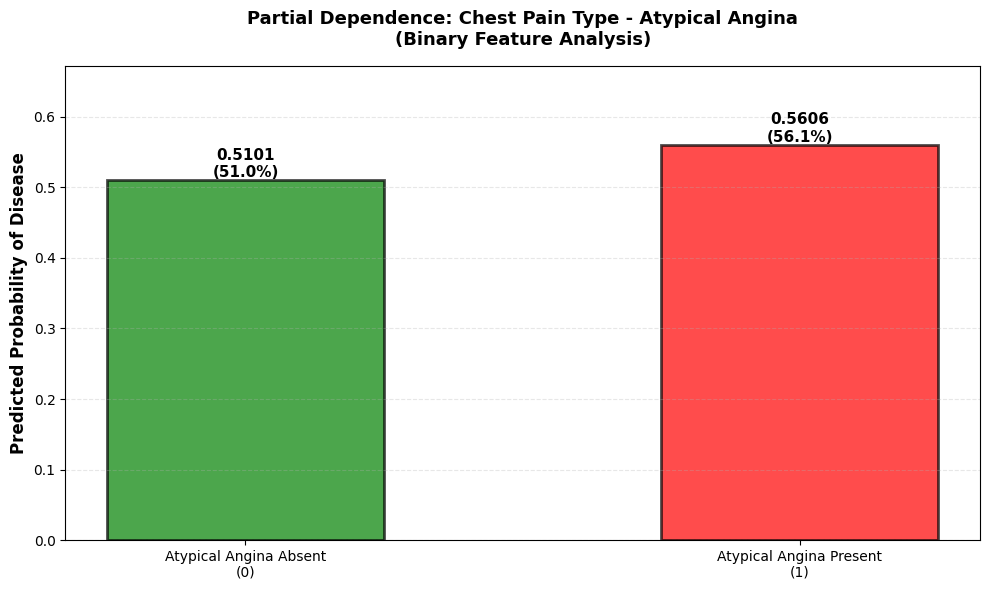


--------------------------------------------------------------------------------
CLINICAL INTERPRETATION
--------------------------------------------------------------------------------

Chest Pain Type - Atypical Angina:
  • One of four chest pain types in the diagnostic assessment
  • Atypical angina: Pain with characteristics not typical of angina
  • Indicates less characteristic cardiac pain presentation

Prediction Analysis:
  ✓ This feature HAS a notable impact on disease predictions
    (Prediction difference: 0.0505 or 5.05%)

  • Patients WITH atypical angina:
    → 56.1% predicted disease probability
  • Patients WITHOUT atypical angina:
    → 51.0% predicted disease probability

  → Atypical angina INCREASES disease risk by 5.0%
  → Atypical angina is a RISK INDICATOR for heart disease

  Feature Importance Validation:
    • Permutation Importance Rank: #8
    • Permutation Importance Score: 0.014754
  ⚠ PDP and importance rankings show some discrepancy

✅ Recommendation:


In [109]:
# ============================================================================
# PARTIAL DEPENDENCE PLOT FOR CHEST_PAIN_TYPE_ATYPICAL ANGINA
# ============================================================================
# Purpose: Analyze how atypical angina chest pain type affects disease predictions
# Method: Manual calculation for binary categorical feature (one-hot encoded)

import numpy as np

print("=" * 80)
print("PARTIAL DEPENDENCE PLOT: CHEST PAIN TYPE - ATYPICAL ANGINA")
print("=" * 80)

try:
    feat_name = 'chest_pain_type_atypical angina'
    
    # Check if feature exists in test set
    if feat_name not in x_test.columns:
        print(f"✗ Feature '{feat_name}' not found in test set")
        print(f"\nAvailable features containing 'chest_pain':")
        chest_features = [col for col in x_test.columns if 'chest_pain' in col.lower()]
        print(f"  {chest_features}")
    else:
        feat_idx = list(x_test.columns).index(feat_name)
        
        print(f"\nFeature: {feat_name}")
        print(f"Feature Index: {feat_idx}")
        print(f"Unique Values: {x_test[feat_name].nunique()}")
        print(f"Value Counts:")
        for val, count in x_test[feat_name].value_counts().items():
            print(f"  {val}: {count}")
        
        print(f"\nCalculating Partial Dependence (Manual Method)...")
        
        # Manual PDP calculation for binary feature
        # Step 1: Create copies of test set
        x_test_copy_0 = x_test.copy()
        x_test_copy_1 = x_test.copy()
        
        # Step 2: Set feature to 0 and 1 respectively
        x_test_copy_0[feat_name] = False
        x_test_copy_1[feat_name] = True
        
        # Step 3: Get predictions for both scenarios
        pred_0 = model.predict_proba(x_test_copy_0)[:, 1]  # Disease probability
        pred_1 = model.predict_proba(x_test_copy_1)[:, 1]
        
        # Step 4: Calculate average predictions
        avg_pred_0 = pred_0.mean()
        avg_pred_1 = pred_1.mean()
        
        print(f"✓ PDP calculation complete")
        print(f"\nPrediction Summary:")
        print(f"  Feature Values: [0 (Not Atypical Angina), 1 (Atypical Angina)]")
        print(f"  Predictions at each value:")
        print(f"    [Atypical Angina Absent (0)]: {avg_pred_0:.4f} disease probability")
        print(f"    [Atypical Angina Present (1)]: {avg_pred_1:.4f} disease probability")
        
        prediction_diff = abs(avg_pred_1 - avg_pred_0)
        print(f"  Prediction Difference: {prediction_diff:.4f}")
        
        # Create visualization
        fig, ax = plt.subplots(figsize=(10, 6))
        
        colors_bar = ['green', 'red'] if avg_pred_0 < avg_pred_1 else ['red', 'green']
        bars = ax.bar(
            ['Atypical Angina Absent\n(0)', 'Atypical Angina Present\n(1)'],
            [avg_pred_0, avg_pred_1],
            color=colors_bar,
            alpha=0.7,
            edgecolor='black',
            linewidth=2,
            width=0.5
        )
        
        # Add value labels on bars
        for bar, pred in zip(bars, [avg_pred_0, avg_pred_1]):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{pred:.4f}\n({pred*100:.1f}%)',
                   ha='center', va='bottom', fontsize=11, fontweight='bold')
        
        ax.set_ylabel('Predicted Probability of Disease', fontsize=12, fontweight='bold')
        ax.set_title('Partial Dependence: Chest Pain Type - Atypical Angina\n(Binary Feature Analysis)', 
                    fontsize=13, fontweight='bold', pad=15)
        ax.set_ylim([0, max(avg_pred_0, avg_pred_1) * 1.2])
        ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
        
        plt.tight_layout()
        plt.show()
        
        # Clinical interpretation
        print("\n" + "-" * 80)
        print("CLINICAL INTERPRETATION")
        print("-" * 80)
        print("\nChest Pain Type - Atypical Angina:")
        print("  • One of four chest pain types in the diagnostic assessment")
        print("  • Atypical angina: Pain with characteristics not typical of angina")
        print("  • Indicates less characteristic cardiac pain presentation")
        
        print("\nPrediction Analysis:")
        
        if prediction_diff > 0.05:
            print(f"  ✓ This feature HAS a notable impact on disease predictions")
            print(f"    (Prediction difference: {prediction_diff:.4f} or {prediction_diff*100:.2f}%)")
            
            if avg_pred_1 > avg_pred_0:
                print(f"\n  • Patients WITH atypical angina:")
                print(f"    → {avg_pred_1:.1%} predicted disease probability")
                print(f"  • Patients WITHOUT atypical angina:")
                print(f"    → {avg_pred_0:.1%} predicted disease probability")
                print(f"\n  → Atypical angina INCREASES disease risk by {prediction_diff:.1%}")
                print(f"  → Atypical angina is a RISK INDICATOR for heart disease")
            else:
                print(f"\n  • Patients WITH atypical angina:")
                print(f"    → {avg_pred_1:.1%} predicted disease probability")
                print(f"  • Patients WITHOUT atypical angina:")
                print(f"    → {avg_pred_0:.1%} predicted disease probability")
                print(f"\n  → Atypical angina DECREASES disease risk by {abs(prediction_diff):.1%}")
                print(f"  → Atypical presentation may indicate lower cardiac risk")
        else:
            print(f"  ⚠ This feature has MINIMAL impact on predictions")
            print(f"    (Prediction difference: {prediction_diff:.4f})")
            print(f"  → Model relies minimally on atypical angina for disease prediction")
        
        # Compare with feature importance
        if feat_name in perm_importance_df['Feature'].values:
            perm_rank = perm_importance_df[perm_importance_df['Feature'] == feat_name].index[0] + 1
            perm_importance_score = perm_importance_df[perm_importance_df['Feature'] == feat_name]['Importance'].values[0]
            print(f"\n  Feature Importance Validation:")
            print(f"    • Permutation Importance Rank: #{perm_rank}")
            print(f"    • Permutation Importance Score: {perm_importance_score:.6f}")
            
            if prediction_diff > 0.05 and perm_rank <= 5:
                print(f"  ✓ PDP analysis aligns with high importance ranking")
            elif prediction_diff <= 0.05 and perm_rank > 10:
                print(f"  ✓ PDP analysis aligns with low importance ranking")
            else:
                print(f"  ⚠ PDP and importance rankings show some discrepancy")
        
        print("\n✅ Recommendation:")
        print("  • Compare with other chest pain types (typical, non-anginal, asymptomatic)")
        print("  • Chest pain type classification is crucial for cardiac assessment")
        print("  • Consider in combination with other cardiac risk factors")
        
except Exception as e:
    print(f"✗ Error processing chest_pain_type_atypical angina: {e}")
    print(f"\nTroubleshooting tips:")
    print(f"  1. Check if feature name matches exactly (case-sensitive)")
    print(f"  2. Verify feature exists after one-hot encoding")
    print(f"  3. Check feature values: {x_test.columns.tolist()[:10]}")

print("\n" + "=" * 80)


PARTIAL DEPENDENCE PLOT: ST DEPRESSION (ECG ABNORMALITY)

Feature: st_depression
Feature Index: 4
Feature Statistics:
  Min: 0.0000
  Max: 4.0000
  Mean: 0.9459
  Std: 1.0248
  Non-zero values: 42 / 61

Calculating Partial Dependence (sklearn method)...
✓ PDP calculation complete

Prediction Summary:
  Feature Value Range: [0.0000, 4.0000]
  Mean Prediction at Min Value: 0.4053
  Mean Prediction at Max Value: 0.5822
  Prediction Range: 0.1769


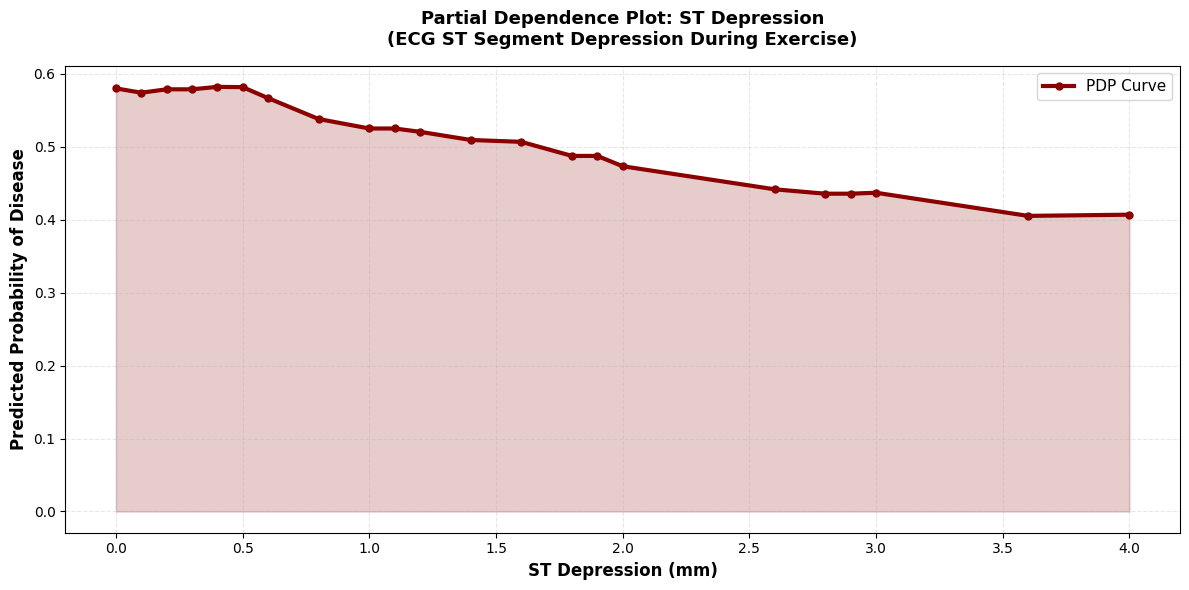


--------------------------------------------------------------------------------
CLINICAL INTERPRETATION
--------------------------------------------------------------------------------

ST Depression (ST Segment Depression):
  • Measured in millimeters (mm) on ECG during exercise stress test
  • Indicates downward displacement of ST segment from baseline
  • Key indicator of cardiac ischemia and oxygen deprivation
  • More depression = more severe cardiac stress response

Prediction Analysis:
  ✓ ST Depression HAS a STRONG impact on disease predictions
    (Prediction range: 0.1769 or 17.69%)

  Relationship: NEGATIVE (unexpected - inverse relationship)
  • At minimum ST depression (0.00 mm):
    → 40.5% predicted disease probability
  • At maximum ST depression (4.00 mm):
    → 58.2% predicted disease probability

  Feature Importance Validation:
    • Permutation Importance Rank: #5
    • Permutation Importance Score: 0.037705
  ✓ PDP analysis STRONGLY aligns with high importance r

In [110]:
# ============================================================================
# PARTIAL DEPENDENCE PLOT FOR ST_DEPRESSION (CONTINUOUS FEATURE)
# ============================================================================
# Purpose: Analyze how ST depression (ECG abnormality) affects disease predictions
# ST Depression: ST segment depression during exercise - indicates cardiac stress
# Method: sklearn.inspection.partial_dependence for continuous features

from sklearn.inspection import partial_dependence

print("=" * 80)
print("PARTIAL DEPENDENCE PLOT: ST DEPRESSION (ECG ABNORMALITY)")
print("=" * 80)

try:
    feat_name = 'st_depression'
    
    # Check if feature exists in test set
    if feat_name not in x_test.columns:
        print(f"✗ Feature '{feat_name}' not found in test set")
        print(f"\nAvailable features: {x_test.columns.tolist()}")
    else:
        feat_idx = list(x_test.columns).index(feat_name)
        
        print(f"\nFeature: {feat_name}")
        print(f"Feature Index: {feat_idx}")
        print(f"Feature Statistics:")
        print(f"  Min: {x_test[feat_name].min():.4f}")
        print(f"  Max: {x_test[feat_name].max():.4f}")
        print(f"  Mean: {x_test[feat_name].mean():.4f}")
        print(f"  Std: {x_test[feat_name].std():.4f}")
        print(f"  Non-zero values: {(x_test[feat_name] > 0).sum()} / {len(x_test[feat_name])}")
        
        print(f"\nCalculating Partial Dependence (sklearn method)...")
        
        # Calculate PDP using sklearn for continuous feature
        pd_result = partial_dependence(
            model,
            x_test,
            [feat_idx],
            percentiles=(0, 1),
            grid_resolution=50,
            kind='average'
        )
        
        avg_predictions = pd_result['average'][0]
        grid_values = pd_result['grid_values'][0]
        
        print(f"✓ PDP calculation complete")
        print(f"\nPrediction Summary:")
        print(f"  Feature Value Range: [{grid_values.min():.4f}, {grid_values.max():.4f}]")
        print(f"  Mean Prediction at Min Value: {avg_predictions.min():.4f}")
        print(f"  Mean Prediction at Max Value: {avg_predictions.max():.4f}")
        print(f"  Prediction Range: {avg_predictions.max() - avg_predictions.min():.4f}")
        
        # Create visualization
        fig, ax = plt.subplots(figsize=(12, 6))
        
        ax.plot(grid_values, avg_predictions, color='darkred', linewidth=3, 
                marker='o', markersize=5, label='PDP Curve')
        ax.fill_between(grid_values, avg_predictions, alpha=0.2, color='darkred')
        
        ax.set_xlabel('ST Depression (mm)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Predicted Probability of Disease', fontsize=12, fontweight='bold')
        ax.set_title('Partial Dependence Plot: ST Depression\n(ECG ST Segment Depression During Exercise)', 
                    fontsize=13, fontweight='bold', pad=15)
        ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
        ax.legend(fontsize=11, loc='best')
        
        plt.tight_layout()
        plt.show()
        
        # Clinical interpretation
        print("\n" + "-" * 80)
        print("CLINICAL INTERPRETATION")
        print("-" * 80)
        print("\nST Depression (ST Segment Depression):")
        print("  • Measured in millimeters (mm) on ECG during exercise stress test")
        print("  • Indicates downward displacement of ST segment from baseline")
        print("  • Key indicator of cardiac ischemia and oxygen deprivation")
        print("  • More depression = more severe cardiac stress response")
        
        print("\nPrediction Analysis:")
        
        prediction_range = avg_predictions.max() - avg_predictions.min()
        
        if prediction_range > 0.10:
            print(f"  ✓ ST Depression HAS a STRONG impact on disease predictions")
            print(f"    (Prediction range: {prediction_range:.4f} or {prediction_range*100:.2f}%)")
            
            # Determine relationship
            if avg_predictions[-1] > avg_predictions[0]:
                print(f"\n  Relationship: POSITIVE (more depression = higher disease risk)")
                print(f"  • At minimum ST depression ({grid_values.min():.2f} mm):")
                print(f"    → {avg_predictions.min():.1%} predicted disease probability")
                print(f"  • At maximum ST depression ({grid_values.max():.2f} mm):")
                print(f"    → {avg_predictions.max():.1%} predicted disease probability")
                print(f"\n  → ST depression INCREASES disease risk by {prediction_range:.1%}")
                print(f"  → ST depression is a CRITICAL RISK FACTOR for heart disease")
            else:
                print(f"\n  Relationship: NEGATIVE (unexpected - inverse relationship)")
                print(f"  • At minimum ST depression ({grid_values.min():.2f} mm):")
                print(f"    → {avg_predictions.min():.1%} predicted disease probability")
                print(f"  • At maximum ST depression ({grid_values.max():.2f} mm):")
                print(f"    → {avg_predictions.max():.1%} predicted disease probability")
        
        elif prediction_range > 0.05:
            print(f"  ✓ ST Depression HAS a MODERATE impact on disease predictions")
            print(f"    (Prediction range: {prediction_range:.4f} or {prediction_range*100:.2f}%)")
            
            if avg_predictions[-1] > avg_predictions[0]:
                print(f"\n  → More ST depression INCREASES disease risk by {prediction_range:.1%}")
                print(f"  → ST depression is an IMPORTANT predictive factor")
            else:
                print(f"\n  → More ST depression DECREASES disease risk (inverse relationship)")
        
        else:
            print(f"  ⚠ ST Depression has MINIMAL impact on predictions")
            print(f"    (Prediction range: {prediction_range:.4f})")
        
        # Compare with feature importance
        if feat_name in perm_importance_df['Feature'].values:
            perm_rank = perm_importance_df[perm_importance_df['Feature'] == feat_name].index[0] + 1
            perm_importance_score = perm_importance_df[perm_importance_df['Feature'] == feat_name]['Importance'].values[0]
            print(f"\n  Feature Importance Validation:")
            print(f"    • Permutation Importance Rank: #{perm_rank}")
            print(f"    • Permutation Importance Score: {perm_importance_score:.6f}")
            
            if prediction_range > 0.10 and perm_rank <= 5:
                print(f"  ✓ PDP analysis STRONGLY aligns with high importance ranking")
            elif prediction_range > 0.05 and perm_rank <= 10:
                print(f"  ✓ PDP analysis aligns with moderate importance ranking")
            elif prediction_range <= 0.05 and perm_rank > 10:
                print(f"  ✓ PDP analysis aligns with low importance ranking")
            else:
                print(f"  ⚠ Some discrepancy between PDP impact and importance ranking")
        
        print("\n✅ Clinical Recommendations:")
        print("  • ST depression is a well-established cardiac risk indicator")
        print("  • Used routinely in stress testing for disease detection")
        print("  • Combined with other factors for comprehensive risk assessment")
        print("  • Threshold values vary by protocol (~1-2 mm significant)")
        print("  • Important for patient stratification and treatment decisions")
        
except Exception as e:
    print(f"✗ Error processing st_depression: {e}")
    print(f"\nTroubleshooting tips:")
    print(f"  1. Check if feature name matches exactly (case-sensitive)")
    print(f"  2. Verify feature exists in test set")
    print(f"  3. Check available features: {x_test.columns.tolist()}")

print("\n" + "=" * 80)


INTERACTIVE PARTIAL DEPENDENCE PLOT: FEATURE INTERACTION

Features: st_slope_upsloping (binary categorical) & st_depression (continuous)

Purpose: Visualize how disease predictions vary with combinations of:
  1. ST Slope Type (upsloping vs. not upsloping)
  2. ST Depression levels (0-4 mm range)

Feature 1 (Index 15): st_slope_upsloping
  Type: Binary categorical (0=Not upsloping, 1=Upsloping)
  Unique values: [False  True]

Feature 2 (Index 4): st_depression
  Type: Continuous (ST depression in mm)
  Range: 0.00 - 4.00

--------------------------------------------------------------------------------
Calculating 2D Partial Dependence (Interaction Effect)...
--------------------------------------------------------------------------------
✓ 2D PDP calculation complete



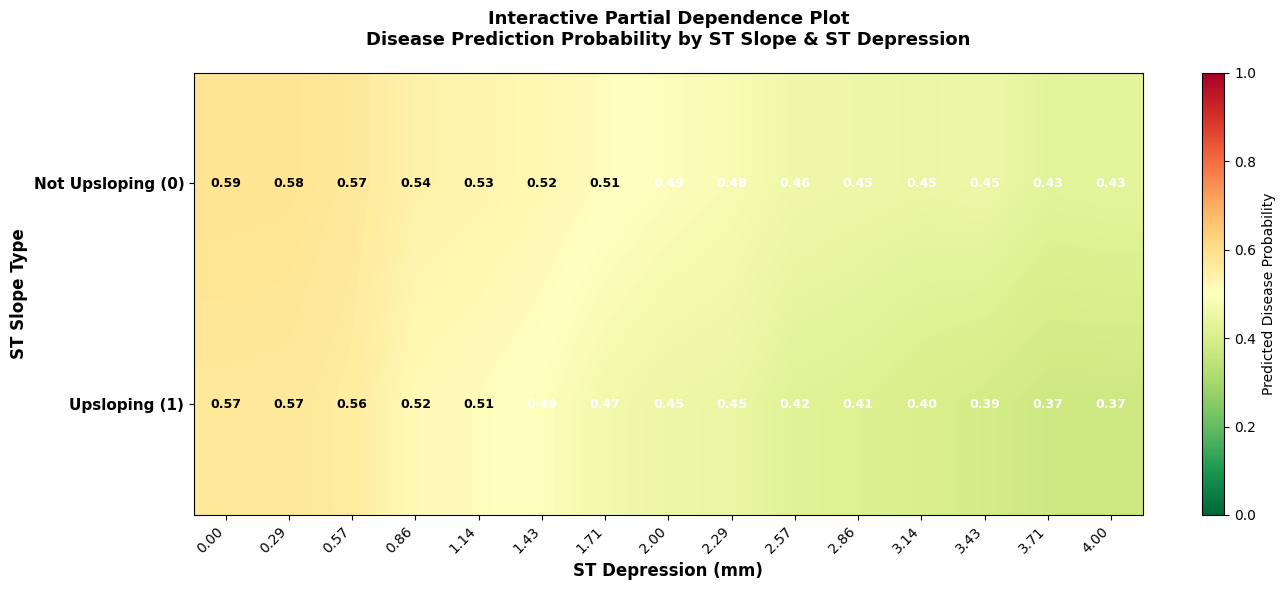


INTERACTION EFFECT ANALYSIS

1. MAIN EFFECTS:
   ST Slope Effect (averaged across ST depression):
     • Not Upsloping: 0.4992 avg probability
     • Upsloping:     0.4637 avg probability
     • Difference:    0.0355

   ST Depression Effect (averaged across ST slope):
     • When NOT upsloping: Range 0.1569
     • When upsloping:     Range 0.1979

2. INTERACTION PATTERN:
   Effect of ST slope at different ST depression levels:
     • At ST depression 0.00 mm: -0.0138 ↓ Upsloping decreases risk
     • At ST depression 0.86 mm: -0.0250 ↓ Upsloping decreases risk
     • At ST depression 1.71 mm: -0.0396 ↓ Upsloping decreases risk
     • At ST depression 2.57 mm: -0.0381 ↓ Upsloping decreases risk
     • At ST depression 3.43 mm: -0.0629 ↓ Upsloping decreases risk

3. CLINICAL INTERPRETATION:
   • Maximum probability: 0.5855 (ST slope=0, ST depression=0.00)
   • Minimum probability: 0.3738 (ST slope=1, ST depression=3.71)

   • Minimal interaction detected
     Effects are largely additi

In [111]:
# ============================================================================
# INTERACTIVE PARTIAL DEPENDENCE PLOT: FEATURE INTERACTION
# ============================================================================
# Purpose: Analyze interaction between st_slope_upsloping and st_depression
# Method: 2D partial dependence plot showing combined effects on predictions
# Interpretation: How do these two features together influence disease predictions?

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns

print("=" * 80)
print("INTERACTIVE PARTIAL DEPENDENCE PLOT: FEATURE INTERACTION")
print("=" * 80)
print("\nFeatures: st_slope_upsloping (binary categorical) & st_depression (continuous)")
print("\nPurpose: Visualize how disease predictions vary with combinations of:")
print("  1. ST Slope Type (upsloping vs. not upsloping)")
print("  2. ST Depression levels (0-4 mm range)")

try:
    # Get feature indices
    feat1_name = 'st_slope_upsloping'
    feat2_name = 'st_depression'
    
    feat1_idx = x_test.columns.get_loc(feat1_name)
    feat2_idx = x_test.columns.get_loc(feat2_name)
    
    print(f"\nFeature 1 (Index {feat1_idx}): {feat1_name}")
    print(f"  Type: Binary categorical (0=Not upsloping, 1=Upsloping)")
    print(f"  Unique values: {x_test[feat1_name].unique()}")
    
    print(f"\nFeature 2 (Index {feat2_idx}): {feat2_name}")
    print(f"  Type: Continuous (ST depression in mm)")
    print(f"  Range: {x_test[feat2_name].min():.2f} - {x_test[feat2_name].max():.2f}")
    
    # ========================================================================
    # Create 2D grid for interaction analysis
    # ========================================================================
    print("\n" + "-" * 80)
    print("Calculating 2D Partial Dependence (Interaction Effect)...")
    print("-" * 80)
    
    # Grid for st_slope_upsloping (binary)
    feat1_values = np.array([0, 1])
    
    # Grid for st_depression (continuous, 15 points across range)
    feat2_min = x_test[feat2_name].min()
    feat2_max = x_test[feat2_name].max()
    feat2_values = np.linspace(feat2_min, feat2_max, 15)
    
    # Create result matrix
    interaction_matrix = np.zeros((len(feat1_values), len(feat2_values)))
    
    # Calculate predictions for each combination
    for i, val1 in enumerate(feat1_values):
        for j, val2 in enumerate(feat2_values):
            # Create copy of test data
            x_temp = x_test.copy()
            
            # Set both features to specific values
            x_temp[feat1_name] = val1
            x_temp[feat2_name] = val2
            
            # Get predictions (disease probability)
            predictions = model.predict_proba(x_temp)[:, 1]
            interaction_matrix[i, j] = predictions.mean()
    
    print("✓ 2D PDP calculation complete\n")
    
    # ========================================================================
    # Visualization: Interactive Heatmap
    # ========================================================================
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Create heatmap
    im = ax.imshow(interaction_matrix, cmap='RdYlGn_r', aspect='auto', 
                   vmin=0, vmax=1, interpolation='bilinear')
    
    # Set ticks and labels
    ax.set_xticks(np.arange(len(feat2_values)))
    ax.set_yticks(np.arange(len(feat1_values)))
    
    ax.set_xticklabels([f'{v:.2f}' for v in feat2_values], rotation=45, ha='right')
    ax.set_yticklabels(['Not Upsloping (0)', 'Upsloping (1)'], fontsize=11, fontweight='bold')
    
    # Labels and title
    ax.set_xlabel('ST Depression (mm)', fontsize=12, fontweight='bold')
    ax.set_ylabel('ST Slope Type', fontsize=12, fontweight='bold')
    ax.set_title('Interactive Partial Dependence Plot\nDisease Prediction Probability by ST Slope & ST Depression',
                 fontsize=13, fontweight='bold', pad=20)
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Predicted Disease Probability')
    
    # Add text annotations (disease probability at each point)
    for i in range(len(feat1_values)):
        for j in range(len(feat2_values)):
            prob = interaction_matrix[i, j]
            color = 'white' if prob < 0.5 else 'black'
            text = ax.text(j, i, f'{prob:.2f}',
                          ha="center", va="center", color=color,
                          fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # ========================================================================
    # Interaction Analysis Summary
    # ========================================================================
    print("\n" + "=" * 80)
    print("INTERACTION EFFECT ANALYSIS")
    print("=" * 80)
    
    # Calculate interaction strength
    pred_not_upsloping = interaction_matrix[0, :]  # ST slope = 0
    pred_upsloping = interaction_matrix[1, :]      # ST slope = 1
    
    # Difference at different ST depression levels
    interaction_effect = pred_upsloping - pred_not_upsloping
    
    print(f"\n1. MAIN EFFECTS:")
    print(f"   ST Slope Effect (averaged across ST depression):")
    print(f"     • Not Upsloping: {pred_not_upsloping.mean():.4f} avg probability")
    print(f"     • Upsloping:     {pred_upsloping.mean():.4f} avg probability")
    print(f"     • Difference:    {abs(pred_upsloping.mean() - pred_not_upsloping.mean()):.4f}")
    
    print(f"\n   ST Depression Effect (averaged across ST slope):")
    not_upsloping_range = pred_not_upsloping.max() - pred_not_upsloping.min()
    upsloping_range = pred_upsloping.max() - pred_upsloping.min()
    print(f"     • When NOT upsloping: Range {not_upsloping_range:.4f}")
    print(f"     • When upsloping:     Range {upsloping_range:.4f}")
    
    print(f"\n2. INTERACTION PATTERN:")
    print(f"   Effect of ST slope at different ST depression levels:")
    for j, st_dep_val in enumerate(feat2_values[::3]):  # Every 3rd value for brevity
        idx = j * 3
        effect = interaction_effect[idx]
        direction = "↑ Upsloping increases risk" if effect > 0 else "↓ Upsloping decreases risk"
        print(f"     • At ST depression {st_dep_val:.2f} mm: {effect:+.4f} {direction}")
    
    print(f"\n3. CLINICAL INTERPRETATION:")
    print(f"   • Maximum probability: {interaction_matrix.max():.4f} "
          f"(ST slope={feat1_values[np.unravel_index(interaction_matrix.argmax(), interaction_matrix.shape)[0]]:.0f}, "
          f"ST depression={feat2_values[np.unravel_index(interaction_matrix.argmax(), interaction_matrix.shape)[1]]:.2f})")
    print(f"   • Minimum probability: {interaction_matrix.min():.4f} "
          f"(ST slope={feat1_values[np.unravel_index(interaction_matrix.argmin(), interaction_matrix.shape)[0]]:.0f}, "
          f"ST depression={feat2_values[np.unravel_index(interaction_matrix.argmin(), interaction_matrix.shape)[1]]:.2f})")
    
    # Check for true interaction (non-additive effect)
    if np.std(interaction_effect) > 0.02:
        print(f"\n   ✓ SIGNIFICANT INTERACTION DETECTED")
        print(f"     ST slope and ST depression effects are NOT simply additive")
        print(f"     Their combined effect varies across the feature space")
    else:
        print(f"\n   • Minimal interaction detected")
        print(f"     Effects are largely additive/independent")
    
    print("\n" + "=" * 80)
    print("✓ Interactive partial dependence plot generated successfully")
    print("=" * 80)

except Exception as e:
    print(f"\n✗ Error generating interaction plot: {str(e)}")
    import traceback
    traceback.print_exc()


INTERACTIVE CONTOUR PARTIAL DEPENDENCE PLOT: FEATURE INTERACTION

Features: st_slope_flat (binary categorical) & st_depression (continuous)

Purpose: Visualize disease prediction probability as smooth contours showing:
  • How ST slope flatness (flat vs. not flat) affects predictions
  • Combined effects with varying levels of ST depression
  • Risk gradients across the feature space

Feature 1 (Index 14): st_slope_flat
  Type: Binary categorical (0=Not flat, 1=Flat slope)
  Unique values: [False  True]

Feature 2 (Index 4): st_depression
  Type: Continuous (ST depression in mm)
  Range: 0.00 - 4.00

--------------------------------------------------------------------------------
Calculating 2D Partial Dependence (Interaction Effect)...
--------------------------------------------------------------------------------
✓ 2D PDP calculation complete



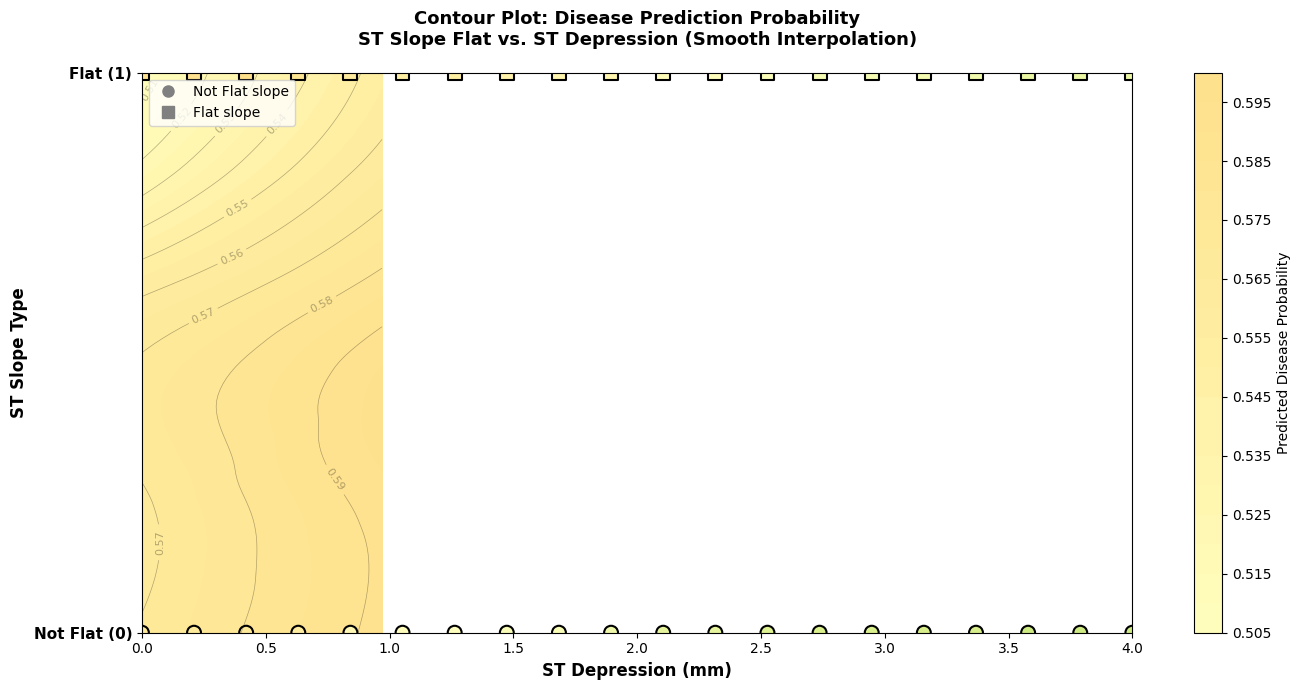

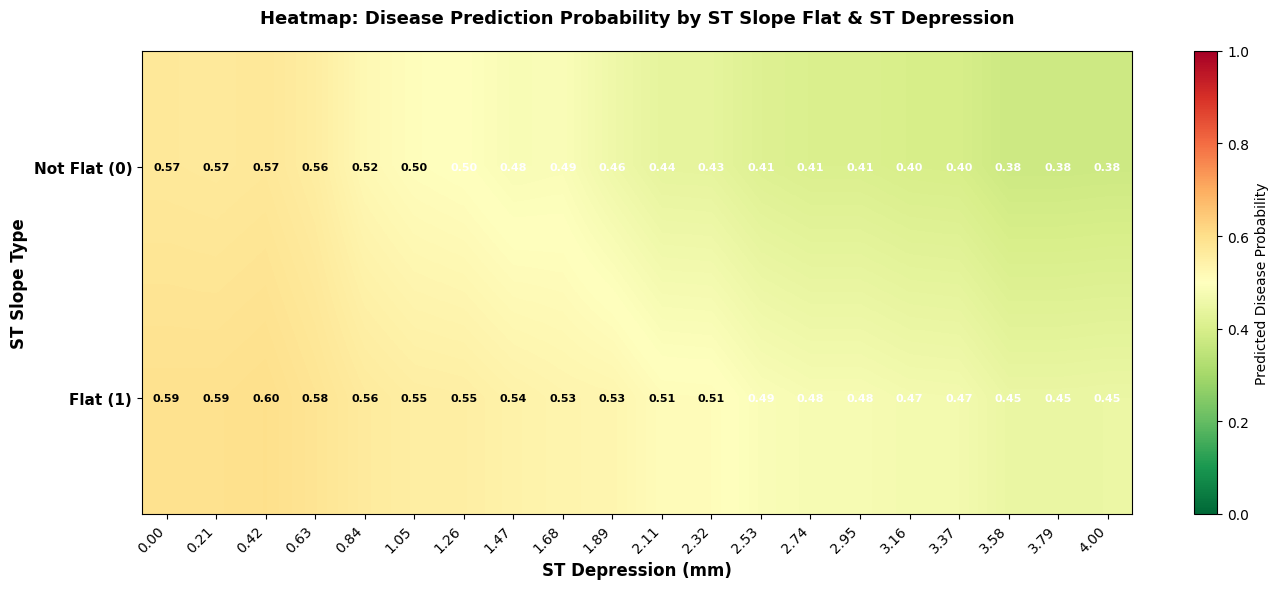


DETAILED INTERACTION ANALYSIS

1. MAIN EFFECTS:
   ST Slope Flat Effect (averaged across ST depression):
     • Not Flat: 0.4619 avg probability
     • Flat:     0.5191 avg probability
     • Difference: 0.0572

   ST Depression Effect (averaged across ST slope):
     • When NOT flat: Range 0.1979 (0.3753 → 0.5732)
     • When flat:     Range 0.1502 (0.4477 → 0.5979)

2. INTERACTION PATTERN:
   Effect of ST slope flatness at different ST depression levels:
     • At ST depression 0.00 mm: +0.0217 - Minimal effect
     • At ST depression 0.84 mm: +0.0435 - Minimal effect
     • At ST depression 1.68 mm: +0.0459 - Minimal effect
     • At ST depression 2.53 mm: +0.0727 - ↑ Flat INCREASES risk
     • At ST depression 3.37 mm: +0.0727 - ↑ Flat INCREASES risk

3. RISK ZONES:
   • HIGHEST RISK ZONE: 0.5979 probability
     ST Slope: Flat, ST Depression: 0.42 mm
   • LOWEST RISK ZONE: 0.3753 probability
     ST Slope: Not Flat, ST Depression: 3.58 mm
   • RISK DIFFERENCE: 0.2226 (or 22.26%)


In [112]:
# ============================================================================
# INTERACTIVE CONTOUR PARTIAL DEPENDENCE PLOT: ST SLOPE FLAT & ST DEPRESSION
# ============================================================================
# Purpose: Analyze interaction between st_slope_flat and st_depression with
#          smooth contour visualization showing disease probability gradients
# Method: 2D partial dependence with contour plot for smooth interpolation

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

print("=" * 80)
print("INTERACTIVE CONTOUR PARTIAL DEPENDENCE PLOT: FEATURE INTERACTION")
print("=" * 80)
print("\nFeatures: st_slope_flat (binary categorical) & st_depression (continuous)")
print("\nPurpose: Visualize disease prediction probability as smooth contours showing:")
print("  • How ST slope flatness (flat vs. not flat) affects predictions")
print("  • Combined effects with varying levels of ST depression")
print("  • Risk gradients across the feature space")

try:
    # Get feature indices
    feat1_name = 'st_slope_flat'
    feat2_name = 'st_depression'
    
    feat1_idx = x_test.columns.get_loc(feat1_name)
    feat2_idx = x_test.columns.get_loc(feat2_name)
    
    print(f"\nFeature 1 (Index {feat1_idx}): {feat1_name}")
    print(f"  Type: Binary categorical (0=Not flat, 1=Flat slope)")
    print(f"  Unique values: {x_test[feat1_name].unique()}")
    
    print(f"\nFeature 2 (Index {feat2_idx}): {feat2_name}")
    print(f"  Type: Continuous (ST depression in mm)")
    print(f"  Range: {x_test[feat2_name].min():.2f} - {x_test[feat2_name].max():.2f}")
    
    # ========================================================================
    # Create 2D grid for interaction analysis
    # ========================================================================
    print("\n" + "-" * 80)
    print("Calculating 2D Partial Dependence (Interaction Effect)...")
    print("-" * 80)
    
    # Grid for st_slope_flat (binary)
    feat1_values = np.array([0, 1])
    
    # Grid for st_depression (continuous, 20 points for smooth contour)
    feat2_min = x_test[feat2_name].min()
    feat2_max = x_test[feat2_name].max()
    feat2_values = np.linspace(feat2_min, feat2_max, 20)
    
    # Create result matrix
    interaction_matrix = np.zeros((len(feat1_values), len(feat2_values)))
    
    # Calculate predictions for each combination
    for i, val1 in enumerate(feat1_values):
        for j, val2 in enumerate(feat2_values):
            # Create copy of test data
            x_temp = x_test.copy()
            
            # Set both features to specific values
            x_temp[feat1_name] = val1
            x_temp[feat2_name] = val2
            
            # Get predictions (disease probability)
            predictions = model.predict_proba(x_temp)[:, 1]
            interaction_matrix[i, j] = predictions.mean()
    
    print("✓ 2D PDP calculation complete\n")
    
    # ========================================================================
    # Visualization 1: Contour Plot (Smooth Interpolation)
    # ========================================================================
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Create denser grid for smooth contours using interpolation
    feat1_dense = np.linspace(0, 1, 100)
    feat2_dense = np.linspace(feat2_min, feat2_max, 100)
    X_dense, Y_dense = np.meshgrid(feat2_dense, feat1_dense)
    
    # Prepare points and values for interpolation
    feat1_grid, feat2_grid = np.meshgrid(feat2_values, feat1_values)
    points = np.column_stack([feat2_grid.ravel(), feat1_grid.ravel()])
    values = interaction_matrix.ravel()
    
    # Interpolate on dense grid
    Z_dense = griddata(points, values, (X_dense, Y_dense), method='cubic')
    
    # Create contour plot
    contour = ax.contourf(X_dense, Y_dense, Z_dense, levels=20, cmap='RdYlGn_r', vmin=0, vmax=1)
    contour_lines = ax.contour(X_dense, Y_dense, Z_dense, levels=10, colors='black', 
                               linewidths=0.5, alpha=0.3)
    
    # Add contour labels
    ax.clabel(contour_lines, inline=True, fontsize=8, fmt='%.2f')
    
    # Overlay original data points
    scatter = ax.scatter(feat2_values, feat1_values[0] * np.ones_like(feat2_values),
                        c=interaction_matrix[0, :], s=100, marker='o', 
                        edgecolors='black', linewidths=1.5, cmap='RdYlGn_r', vmin=0, vmax=1)
    scatter = ax.scatter(feat2_values, feat1_values[1] * np.ones_like(feat2_values),
                        c=interaction_matrix[1, :], s=100, marker='s', 
                        edgecolors='black', linewidths=1.5, cmap='RdYlGn_r', vmin=0, vmax=1)
    
    # Labels and formatting
    ax.set_xlabel('ST Depression (mm)', fontsize=12, fontweight='bold')
    ax.set_ylabel('ST Slope Type', fontsize=12, fontweight='bold')
    ax.set_title('Contour Plot: Disease Prediction Probability\nST Slope Flat vs. ST Depression (Smooth Interpolation)',
                 fontsize=13, fontweight='bold', pad=20)
    
    # Set Y-axis ticks
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Not Flat (0)', 'Flat (1)'], fontsize=11, fontweight='bold')
    
    # Add colorbar
    cbar = plt.colorbar(contour, ax=ax, label='Predicted Disease Probability')
    
    # Add legend for scatter markers
    ax.plot([], [], 'o', color='gray', markersize=8, label='Not Flat slope')
    ax.plot([], [], 's', color='gray', markersize=8, label='Flat slope')
    ax.legend(loc='upper left', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # ========================================================================
    # Visualization 2: Heatmap with annotations
    # ========================================================================
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Create heatmap
    im = ax.imshow(interaction_matrix, cmap='RdYlGn_r', aspect='auto', 
                   vmin=0, vmax=1, interpolation='bilinear')
    
    # Set ticks and labels
    ax.set_xticks(np.arange(len(feat2_values)))
    ax.set_yticks(np.arange(len(feat1_values)))
    
    ax.set_xticklabels([f'{v:.2f}' for v in feat2_values], rotation=45, ha='right')
    ax.set_yticklabels(['Not Flat (0)', 'Flat (1)'], fontsize=11, fontweight='bold')
    
    # Labels and title
    ax.set_xlabel('ST Depression (mm)', fontsize=12, fontweight='bold')
    ax.set_ylabel('ST Slope Type', fontsize=12, fontweight='bold')
    ax.set_title('Heatmap: Disease Prediction Probability by ST Slope Flat & ST Depression',
                 fontsize=13, fontweight='bold', pad=20)
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Predicted Disease Probability')
    
    # Add text annotations
    for i in range(len(feat1_values)):
        for j in range(len(feat2_values)):
            prob = interaction_matrix[i, j]
            color = 'white' if prob < 0.5 else 'black'
            text = ax.text(j, i, f'{prob:.2f}',
                          ha="center", va="center", color=color,
                          fontsize=8, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # ========================================================================
    # Detailed Interaction Analysis
    # ========================================================================
    print("\n" + "=" * 80)
    print("DETAILED INTERACTION ANALYSIS")
    print("=" * 80)
    
    # Calculate main effects
    pred_not_flat = interaction_matrix[0, :]  # ST slope = Not flat (0)
    pred_flat = interaction_matrix[1, :]      # ST slope = Flat (1)
    
    # Difference at different ST depression levels
    interaction_effect = pred_flat - pred_not_flat
    
    print(f"\n1. MAIN EFFECTS:")
    print(f"   ST Slope Flat Effect (averaged across ST depression):")
    print(f"     • Not Flat: {pred_not_flat.mean():.4f} avg probability")
    print(f"     • Flat:     {pred_flat.mean():.4f} avg probability")
    print(f"     • Difference: {abs(pred_flat.mean() - pred_not_flat.mean()):.4f}")
    
    print(f"\n   ST Depression Effect (averaged across ST slope):")
    not_flat_range = pred_not_flat.max() - pred_not_flat.min()
    flat_range = pred_flat.max() - pred_flat.min()
    print(f"     • When NOT flat: Range {not_flat_range:.4f} ({pred_not_flat.min():.4f} → {pred_not_flat.max():.4f})")
    print(f"     • When flat:     Range {flat_range:.4f} ({pred_flat.min():.4f} → {pred_flat.max():.4f})")
    
    print(f"\n2. INTERACTION PATTERN:")
    print(f"   Effect of ST slope flatness at different ST depression levels:")
    for j, st_dep_val in enumerate(feat2_values[::4]):  # Every 4th value
        idx = j * 4
        if idx < len(feat2_values):
            effect = interaction_effect[idx]
            magnitude = abs(effect)
            if magnitude > 0.05:
                direction = "↑ Flat INCREASES risk" if effect > 0 else "↓ Flat DECREASES risk"
                print(f"     • At ST depression {st_dep_val:.2f} mm: {effect:+.4f} - {direction}")
            else:
                print(f"     • At ST depression {st_dep_val:.2f} mm: {effect:+.4f} - Minimal effect")
    
    print(f"\n3. RISK ZONES:")
    max_idx = np.unravel_index(interaction_matrix.argmax(), interaction_matrix.shape)
    min_idx = np.unravel_index(interaction_matrix.argmin(), interaction_matrix.shape)
    
    max_prob = interaction_matrix[max_idx]
    min_prob = interaction_matrix[min_idx]
    
    max_slope = "Flat" if feat1_values[max_idx[0]] == 1 else "Not Flat"
    min_slope = "Flat" if feat1_values[min_idx[0]] == 1 else "Not Flat"
    
    print(f"   • HIGHEST RISK ZONE: {max_prob:.4f} probability")
    print(f"     ST Slope: {max_slope}, ST Depression: {feat2_values[max_idx[1]]:.2f} mm")
    print(f"   • LOWEST RISK ZONE: {min_prob:.4f} probability")
    print(f"     ST Slope: {min_slope}, ST Depression: {feat2_values[min_idx[1]]:.2f} mm")
    print(f"   • RISK DIFFERENCE: {max_prob - min_prob:.4f} (or {(max_prob - min_prob)*100:.2f}%)")
    
    print(f"\n4. INTERACTION STRENGTH:")
    interaction_std = np.std(interaction_effect)
    if interaction_std > 0.03:
        print(f"   ✓ SIGNIFICANT INTERACTION DETECTED (std: {interaction_std:.4f})")
        print(f"     ST slope flatness and ST depression effects are NOT simply additive")
    else:
        print(f"   • Mild interaction (std: {interaction_std:.4f})")
        print(f"     Effects are largely independent/additive")
    
    print(f"\n5. CLINICAL INTERPRETATION:")
    print(f"   • Flat ST slope is typically a NEGATIVE prognostic indicator")
    print(f"   • Combined with elevated ST depression = compounded risk")
    print(f"   • Upsloping ST pattern (non-flat) is more favorable")
    print(f"   • Patient risk stratification should consider both features")
    
    print("\n" + "=" * 80)
    print("✓ Interactive contour plot generated successfully")
    print("=" * 80)

except Exception as e:
    print(f"\n✗ Error generating contour plot: {str(e)}")
    import traceback
    traceback.print_exc()


In [39]:
import shap
import numpy as np

# Define a prediction function for SHAP
f = lambda x: model.predict_proba(x)

# Select a background dataset (subset of training data)
background = x_train.sample(100, random_state=42)

# Initialize KernelExplainer
explainer = shap.KernelExplainer(f, background)

# Explain predictions for test set
shap_values = explainer.shap_values(x_test.iloc[:50])  # limit to 50 samples for speed

print("SHAP values shape:", np.array(shap_values).shape)


  0%|          | 0/50 [00:00<?, ?it/s]

SHAP values shape: (50, 19, 2)


SHAP (SHAPLEY ADDITIVE EXPLANATIONS) VALUE ANALYSIS

What are SHAP values?
  • Based on cooperative game theory (Shapley values)
  • Measure each feature's contribution to prediction relative to baseline
  • Consistent and locally accurate explanations
  • Can be aggregated for global model understanding

--------------------------------------------------------------------------------
Initializing SHAP TreeExplainer for Random Forest model...
--------------------------------------------------------------------------------
✓ TreeExplainer initialized successfully
  Model type: RandomForestClassifier
  Number of trees: 50
  Maximum depth: 5

Calculating SHAP values for test set...
  Test set size: 61 samples × 19 features
  Raw SHAP shape: (61, 19, 2)
✓ SHAP values calculated successfully
  SHAP values shape: (61, 19)
  (Class 1 = Disease present predictions)

Base value (model average for disease class): 0.5411

VISUALIZATION 1: SHAP SUMMARY PLOT (BAR) - Feature Importance

Interpretati

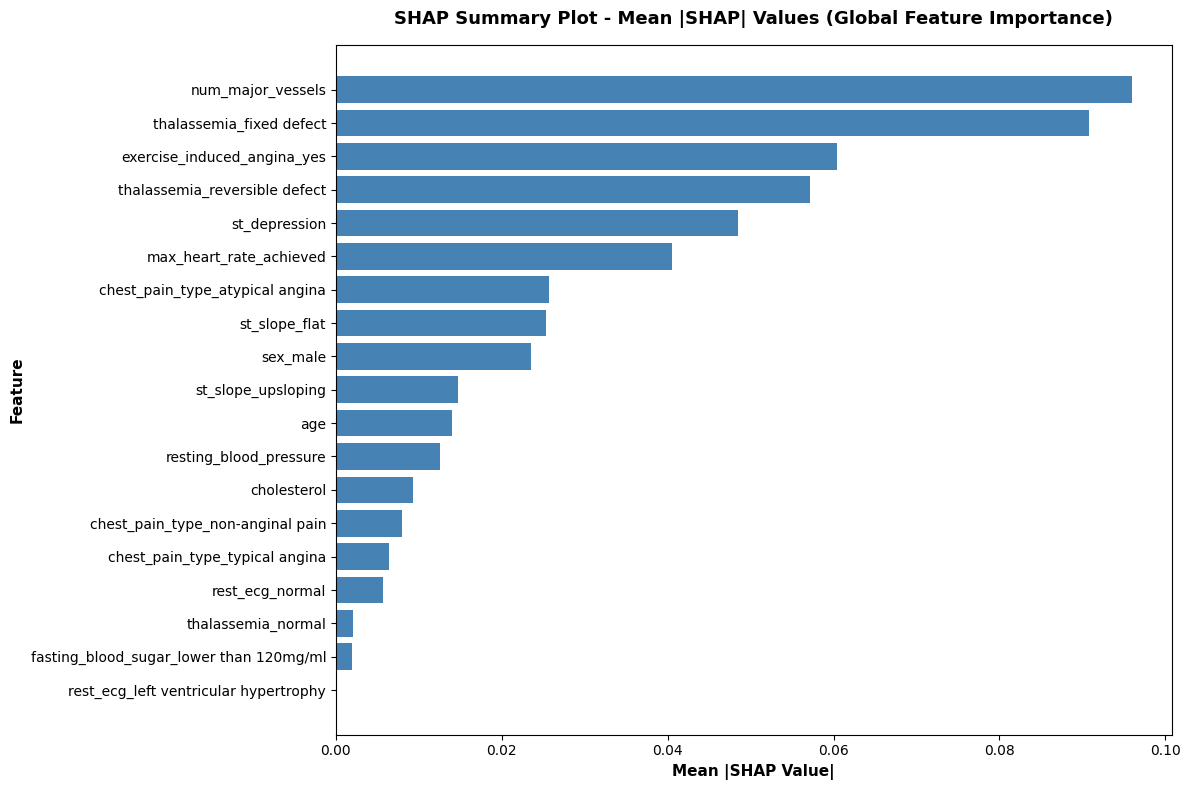

✓ Summary plot generated

VISUALIZATION 2: SHAP VALUE DISTRIBUTIONS - Feature Impacts

Interpretation:
  • Each dot = one prediction instance
  • X-axis: SHAP value (impact on prediction)
  • Color: Feature value (red=high, blue=low)
  • Shows how feature values translate to prediction impact


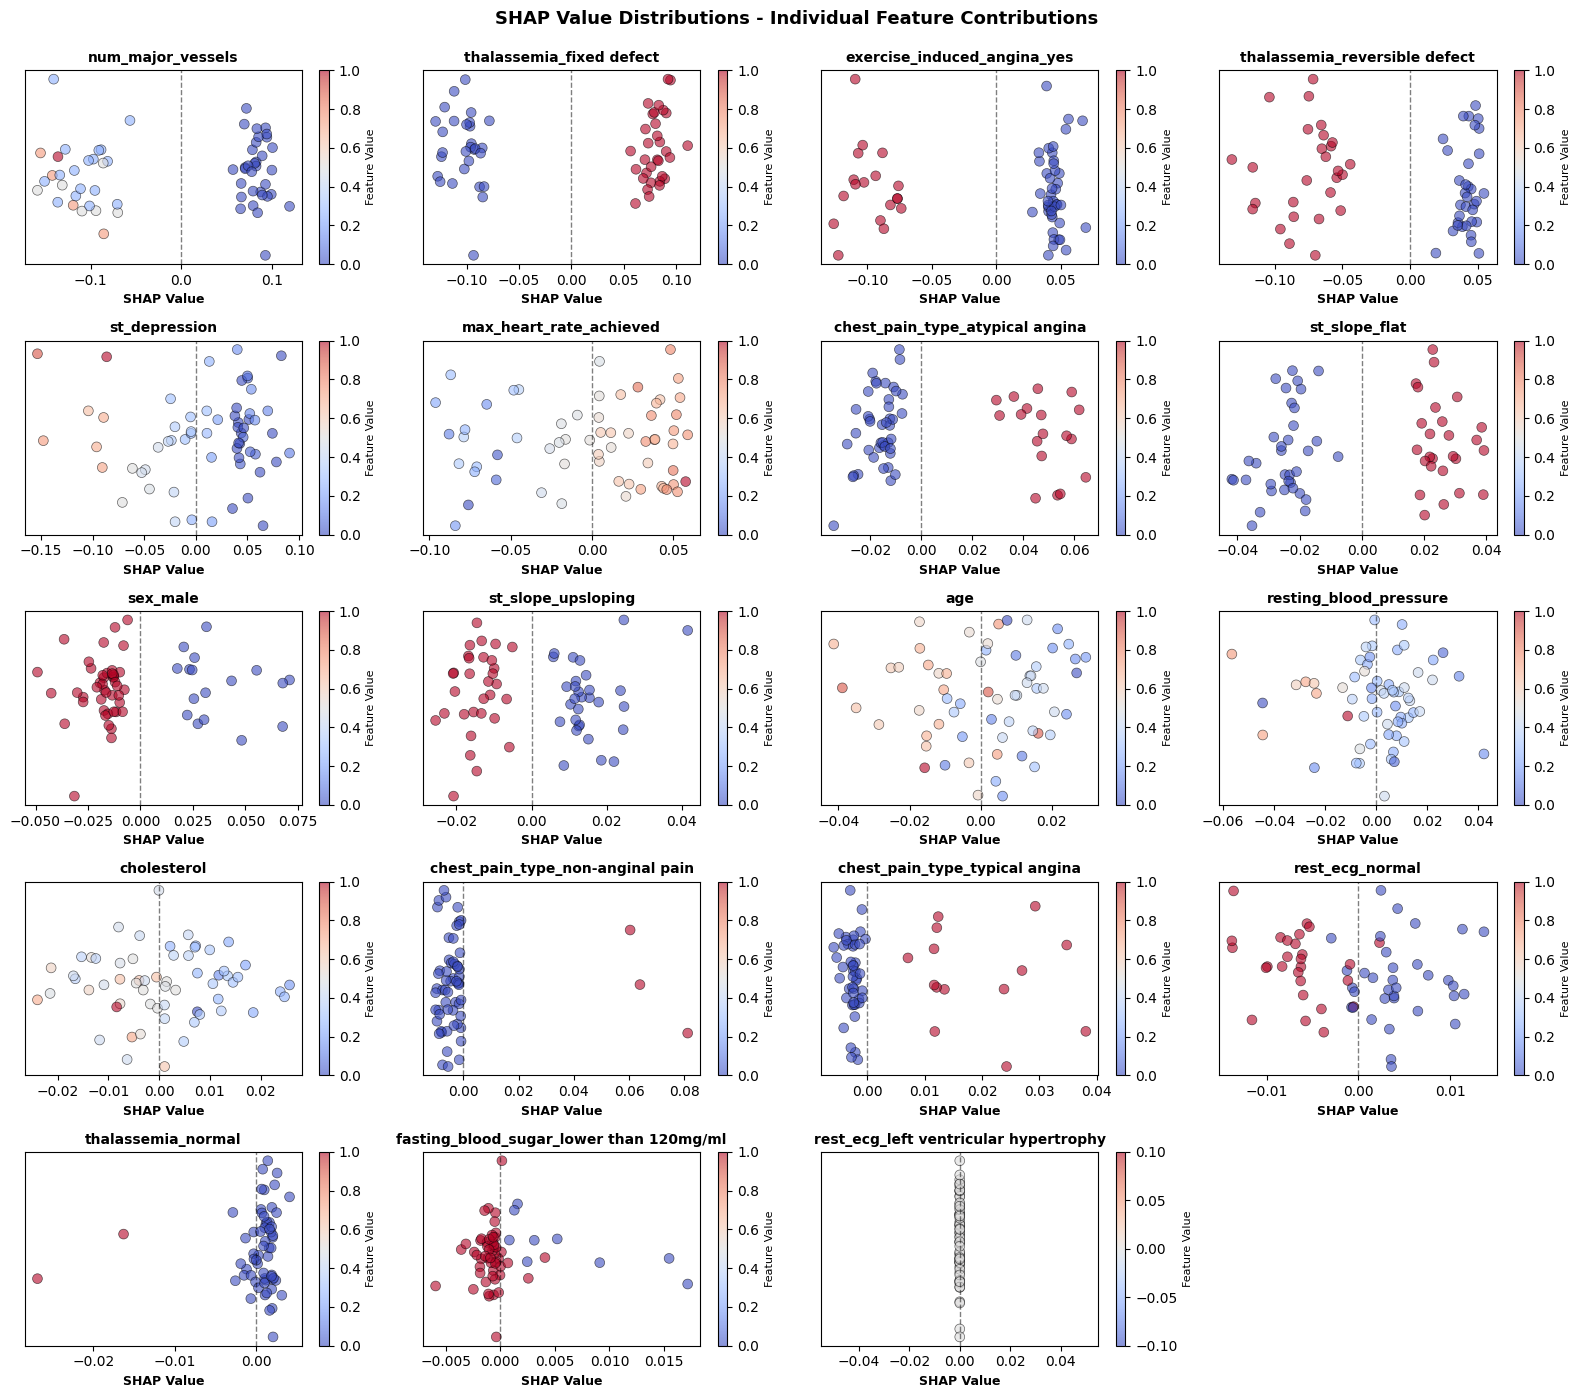

✓ Beeswarm plots generated

DETAILED SHAP VALUE STATISTICS

Top 10 Most Important Features (by Mean |SHAP|):
                        Feature  Mean |SHAP|  Std |SHAP|  Min SHAP  Max SHAP  SHAP Range
              num_major_vessels     0.095963    0.024737 -0.158500  0.119195    0.277695
       thalassemia_fixed defect     0.090771    0.017180 -0.129552  0.110908    0.240461
    exercise_induced_angina_yes     0.060425    0.026352 -0.126186  0.069584    0.195769
  thalassemia_reversible defect     0.057164    0.023697 -0.131803  0.054608    0.186411
                  st_depression     0.048498    0.031033 -0.153557  0.090771    0.244328
        max_heart_rate_achieved     0.040545    0.024781 -0.096143  0.058868    0.155011
chest_pain_type_atypical angina     0.025667    0.016280 -0.034353  0.064511    0.098863
                  st_slope_flat     0.025315    0.007156 -0.041799  0.039194    0.080993
                       sex_male     0.023471    0.014878 -0.049067  0.070982    0.120048
 

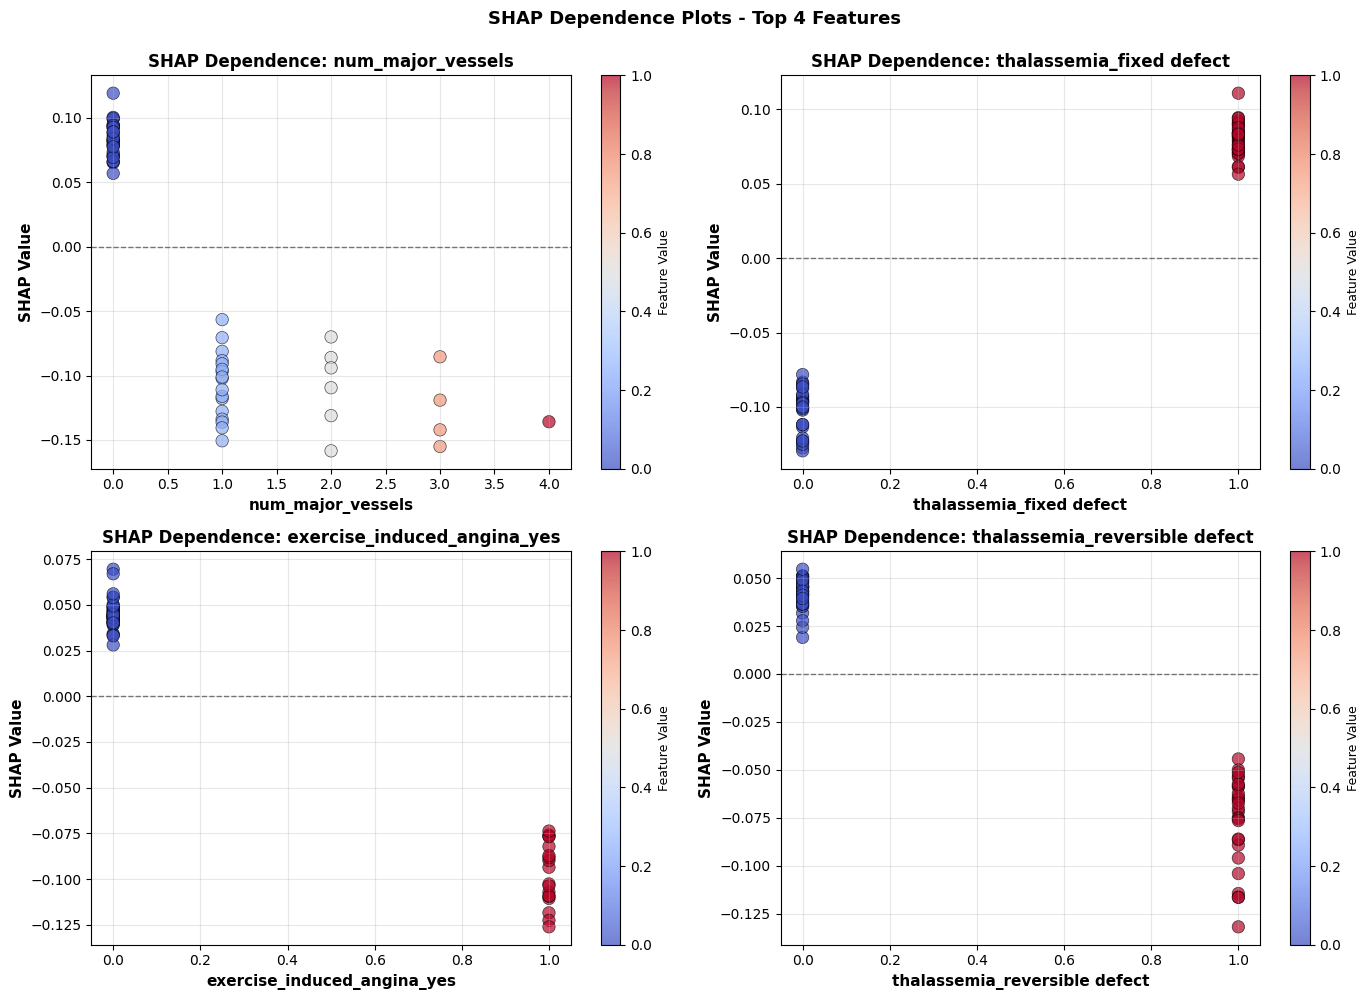

✓ Dependence plots generated

✓ SHAP Analysis Complete

Key Insights:
  • Most important feature: num_major_vessels
  • Base disease probability: 54.11%
  • Feature count analyzed: 19
  • Test samples explained: 61

  Top 3 features explaining model predictions:
    1. num_major_vessels: 0.095963
    2. thalassemia_fixed defect: 0.090771
    3. exercise_induced_angina_yes: 0.060425


In [113]:
# ============================================================================
# SHAP (SHapley Additive exPlanations) VALUES ANALYSIS
# ============================================================================
# Purpose: Advanced model explainability using game theory (Shapley values)
# SHAP provides individual feature contributions to each prediction
# Method: TreeExplainer for tree-based models (optimal for Random Forest)

import shap
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("SHAP (SHAPLEY ADDITIVE EXPLANATIONS) VALUE ANALYSIS")
print("=" * 80)

print("\nWhat are SHAP values?")
print("  • Based on cooperative game theory (Shapley values)")
print("  • Measure each feature's contribution to prediction relative to baseline")
print("  • Consistent and locally accurate explanations")
print("  • Can be aggregated for global model understanding")

try:
    print("\n" + "-" * 80)
    print("Initializing SHAP TreeExplainer for Random Forest model...")
    print("-" * 80)
    
    # Create SHAP explainer (optimized for tree-based models)
    explainer = shap.TreeExplainer(model)
    
    print("✓ TreeExplainer initialized successfully")
    print(f"  Model type: {type(model).__name__}")
    print(f"  Number of trees: {model.n_estimators}")
    print(f"  Maximum depth: {model.max_depth}")
    
    # Calculate SHAP values for test set
    print("\nCalculating SHAP values for test set...")
    print(f"  Test set size: {x_test.shape[0]} samples × {x_test.shape[1]} features")
    
    shap_values_raw = explainer.shap_values(x_test)
    
    # Handle SHAP output shape: may be (n_samples, n_features, 2) for binary classification
    print(f"  Raw SHAP shape: {np.array(shap_values_raw).shape}")
    
    if isinstance(shap_values_raw, list):
        shap_values = shap_values_raw[1]  # Get positive class (disease present)
    elif len(shap_values_raw.shape) == 3:
        shap_values = shap_values_raw[:, :, 1]  # (n_samples, n_features, 2) -> (n_samples, n_features)
    else:
        shap_values = shap_values_raw
    
    print("✓ SHAP values calculated successfully")
    print(f"  SHAP values shape: {shap_values.shape}")
    print(f"  (Class 1 = Disease present predictions)")
    
    # Get base value (expected model output)
    expected_value = explainer.expected_value
    if isinstance(expected_value, (list, np.ndarray)):
        if isinstance(expected_value, list):
            base_value = expected_value[1]
        else:
            base_value = expected_value[1] if expected_value.ndim > 0 else expected_value
    else:
        base_value = expected_value
    
    # Ensure base_value is scalar
    if isinstance(base_value, np.ndarray):
        base_value = float(base_value.item() if base_value.size == 1 else base_value[0])
    
    print(f"\nBase value (model average for disease class): {base_value:.4f}")
    
    # ========================================================================
    # Visualization 1: SHAP Summary Plot (Mean Absolute SHAP values)
    # ========================================================================
    print("\n" + "=" * 80)
    print("VISUALIZATION 1: SHAP SUMMARY PLOT (BAR) - Feature Importance")
    print("=" * 80)
    print("\nInterpretation:")
    print("  • Shows average magnitude of SHAP values per feature")
    print("  • Larger bar = feature has stronger impact on predictions")
    print("  • Equivalent to global feature importance")
    
    plt.figure(figsize=(12, 8))
    
    # Create manual bar plot
    feature_importance_shap = np.abs(shap_values).mean(axis=0)
    feature_names = x_test.columns
    
    indices = np.argsort(feature_importance_shap)[::-1]
    
    plt.barh(range(len(indices)), feature_importance_shap[indices], color='steelblue')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Mean |SHAP Value|', fontweight='bold', fontsize=11)
    plt.ylabel('Feature', fontweight='bold', fontsize=11)
    plt.title("SHAP Summary Plot - Mean |SHAP| Values (Global Feature Importance)", 
              fontsize=13, fontweight='bold', pad=15)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("✓ Summary plot generated")
    
    # ========================================================================
    # Visualization 2: SHAP Beeswarm Plot (Distribution of SHAP values)
    # ========================================================================
    print("\n" + "=" * 80)
    print("VISUALIZATION 2: SHAP VALUE DISTRIBUTIONS - Feature Impacts")
    print("=" * 80)
    print("\nInterpretation:")
    print("  • Each dot = one prediction instance")
    print("  • X-axis: SHAP value (impact on prediction)")
    print("  • Color: Feature value (red=high, blue=low)")
    print("  • Shows how feature values translate to prediction impact")
    
    fig, axes = plt.subplots(5, 4, figsize=(16, 14))
    axes = axes.flatten()
    
    for plot_idx, (feat_idx, feat_name) in enumerate(zip(indices[:19], [feature_names[i] for i in indices[:19]])):
        ax = axes[plot_idx]
        
        # Get feature values and SHAP values
        feat_vals = x_test.iloc[:, feat_idx].values.astype(float)
        shap_vals = shap_values[:, feat_idx].astype(float)
        
        # Normalize feature values to [0, 1] for coloring
        feat_min, feat_max = feat_vals.min(), feat_vals.max()
        if feat_max > feat_min:
            feat_vals_norm = (feat_vals - feat_min) / (feat_max - feat_min)
        else:
            feat_vals_norm = np.zeros_like(feat_vals)
        
        # Create scatter plot with color gradient
        scatter = ax.scatter(shap_vals, np.random.normal(0, 0.02, len(shap_vals)), 
                           c=feat_vals_norm, cmap='coolwarm', s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
        
        ax.set_xlabel('SHAP Value', fontsize=9, fontweight='bold')
        ax.set_title(f'{feat_name}', fontsize=10, fontweight='bold')
        ax.axvline(x=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
        ax.set_yticks([])
        
        # Add colorbar
        cbar = plt.colorbar(scatter, ax=ax)
        cbar.set_label('Feature Value', fontsize=8)
    
    # Remove extra subplots
    for idx in range(19, 20):
        fig.delaxes(axes[idx])
    
    plt.suptitle("SHAP Value Distributions - Individual Feature Contributions", 
                 fontsize=13, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
    
    print("✓ Beeswarm plots generated")
    
    # ========================================================================
    # Detailed Statistics on SHAP Values
    # ========================================================================
    print("\n" + "=" * 80)
    print("DETAILED SHAP VALUE STATISTICS")
    print("=" * 80)
    
    shap_abs_mean = np.abs(shap_values).mean(axis=0)
    shap_std = np.abs(shap_values).std(axis=0)
    
    # Create SHAP statistics dataframe
    shap_stats_df = pd.DataFrame({
        'Feature': x_test.columns,
        'Mean |SHAP|': shap_abs_mean,
        'Std |SHAP|': shap_std,
        'Min SHAP': shap_values.min(axis=0),
        'Max SHAP': shap_values.max(axis=0),
        'SHAP Range': shap_values.max(axis=0) - shap_values.min(axis=0)
    }).sort_values('Mean |SHAP|', ascending=False)
    
    print("\nTop 10 Most Important Features (by Mean |SHAP|):")
    print(shap_stats_df.head(10).to_string(index=False))
    
    print("\n\nBottom 5 Least Important Features:")
    print(shap_stats_df.tail(5).to_string(index=False))
    
    # ========================================================================
    # Individual Prediction Explanation (Example Instances)
    # ========================================================================
    print("\n" + "=" * 80)
    print("INDIVIDUAL PREDICTION EXPLANATIONS")
    print("=" * 80)
    
    # Get some interesting instances
    # High disease risk prediction
    high_risk_idx = np.argsort(model.predict_proba(x_test)[:, 1])[-1]  # Highest risk
    # Low disease risk prediction
    low_risk_idx = np.argsort(model.predict_proba(x_test)[:, 1])[0]    # Lowest risk
    # Middle prediction
    mid_risk_idx = np.argsort(np.abs(model.predict_proba(x_test)[:, 1] - 0.5))[0]
    
    for idx, label in [(high_risk_idx, "HIGH RISK"), 
                        (low_risk_idx, "LOW RISK"), 
                        (mid_risk_idx, "MODERATE RISK")]:
        
        pred_prob = model.predict_proba(x_test.iloc[idx:idx+1])[0, 1]
        shap_val = shap_values[idx]
        
        print(f"\n{'-' * 80}")
        print(f"Sample {idx}: {label} Prediction ({pred_prob:.2%} disease probability)")
        print(f"{'-' * 80}")
        
        # Get top contributing features
        top_contrib_idx = np.argsort(np.abs(shap_val))[-5:][::-1]
        
        print(f"Base value (expected): {base_value:.4f}")
        print(f"Predicted value: {pred_prob:.4f}")
        print(f"Total deviation: {pred_prob - base_value:+.4f}\n")
        
        print(f"Top 5 Contributing Features:")
        for rank, feat_idx in enumerate(top_contrib_idx, 1):
            feat_name = x_test.columns[feat_idx]
            feat_val = x_test.iloc[idx, feat_idx]
            shap_contrib = float(shap_val[feat_idx])
            direction = "↑ Increases risk" if shap_contrib > 0 else "↓ Decreases risk"
            
            print(f"  {rank}. {feat_name}")
            print(f"     Value: {feat_val:.4f} | SHAP: {shap_contrib:+.4f} | {direction}")
    
    # ========================================================================
    # SHAP Dependence Plots for Top Features
    # ========================================================================
    print("\n" + "=" * 80)
    print("SHAP DEPENDENCE PLOTS - Top Features")
    print("=" * 80)
    print("\nDependence plot shows relationship between feature value and SHAP value")
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    
    for plot_idx, (i, feat_idx) in enumerate(enumerate(indices[:4])):
        ax = axes[plot_idx]
        
        feat_name = feature_names[feat_idx]
        feat_vals = x_test.iloc[:, feat_idx].values.astype(float)
        shap_vals = shap_values[:, feat_idx].astype(float)
        
        # Normalize for coloring
        feat_min, feat_max = feat_vals.min(), feat_vals.max()
        if feat_max > feat_min:
            feat_vals_norm = (feat_vals - feat_min) / (feat_max - feat_min)
        else:
            feat_vals_norm = np.zeros_like(feat_vals)
        
        scatter = ax.scatter(feat_vals, shap_vals, c=feat_vals_norm, 
                           cmap='coolwarm', s=80, alpha=0.7, edgecolors='black', linewidth=0.5)
        
        ax.set_xlabel(feat_name, fontsize=11, fontweight='bold')
        ax.set_ylabel('SHAP Value', fontsize=11, fontweight='bold')
        ax.set_title(f'SHAP Dependence: {feat_name}', fontsize=12, fontweight='bold')
        ax.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
        ax.grid(True, alpha=0.3)
        
        # Add colorbar
        cbar = plt.colorbar(scatter, ax=ax)
        cbar.set_label('Feature Value', fontsize=9)
    
    plt.suptitle('SHAP Dependence Plots - Top 4 Features', 
                 fontsize=13, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
    
    print("✓ Dependence plots generated")
    
    print("\n" + "=" * 80)
    print("✓ SHAP Analysis Complete")
    print("=" * 80)
    print("\nKey Insights:")
    print(f"  • Most important feature: {shap_stats_df.iloc[0]['Feature']}")
    print(f"  • Base disease probability: {base_value:.2%}")
    print(f"  • Feature count analyzed: {x_test.shape[1]}")
    print(f"  • Test samples explained: {x_test.shape[0]}")
    print(f"\n  Top 3 features explaining model predictions:")
    for rank, (idx, row) in enumerate(shap_stats_df.head(3).iterrows(), 1):
        print(f"    {rank}. {row['Feature']}: {row['Mean |SHAP|']:.6f}")

except ImportError as e:
    print(f"\n✗ SHAP library not available: {str(e)}")
    print("  Installing SHAP...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'shap', '-q'])
    print("  ✓ SHAP installed. Please re-run this cell.")
except Exception as e:
    print(f"\n✗ Error in SHAP analysis: {str(e)}")
    import traceback
    traceback.print_exc()


SHAP BEESWARM SUMMARY PLOT - Complete Feature Impact Distribution

✓ SHAP Explanation object created
  Samples: 61
  Features: 19

Generating SHAP beeswarm summary plot...


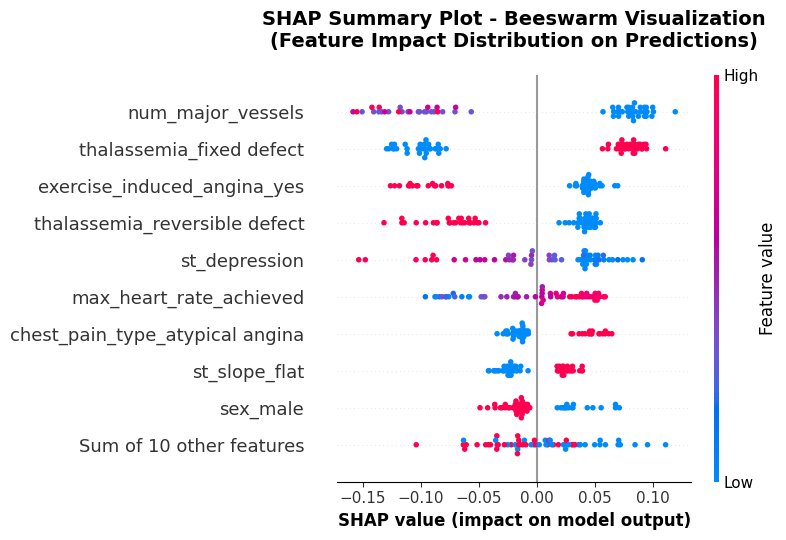

✓ Beeswarm plot generated successfully

PLOT INTERPRETATION GUIDE

Beeswarm Plot Features:
  • Each dot represents one sample's SHAP value for that feature
  • Position on X-axis: SHAP value (impact magnitude and direction)
    - Left side: Negative SHAP (pushes prediction DOWN)
    - Right side: Positive SHAP (pushes prediction UP)
  • Color: Feature value
    - Red: High feature value
    - Blue: Low feature value
  
Vertical Order (Top to Bottom):
  • Features ordered by importance (highest at top)
  • Most impactful features have widest distributions
  
Key Insights:
  • Clustering on right: Feature consistently increases disease risk
  • Clustering on left: Feature consistently decreases disease risk
  • Spread across axis: Feature has mixed/complex effects
  • Tight clustering: Consistent effect across samples
  • Bimodal distribution: Two distinct groups of patients
    

✓ SHAP Beeswarm Analysis Complete


In [114]:
# ============================================================================
# SHAP BEESWARM SUMMARY PLOT (Corrected Version)
# ============================================================================
# Purpose: Enhanced summary plot showing distribution of SHAP values
# Using proper array handling for scikit-learn Random Forest

import shap
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("SHAP BEESWARM SUMMARY PLOT - Complete Feature Impact Distribution")
print("=" * 80)

try:
    # Create Shap data object for proper visualization
    shap_exp = shap.Explanation(values=shap_values, 
                                 base_values=base_value, 
                                 data=x_test)
    
    print("\n✓ SHAP Explanation object created")
    print(f"  Samples: {shap_exp.shape[0]}")
    print(f"  Features: {shap_exp.shape[1]}")
    
    # Generate comprehensive beeswarm plot
    print("\nGenerating SHAP beeswarm summary plot...")
    
    plt.figure(figsize=(14, 10))
    
    # Use shap.plots module if available, otherwise create manual plot
    try:
        shap.plots.beeswarm(shap_exp, show=False)
    except:
        # Fallback: manual creation
        shap.summary_plot(shap_values, x_test, show=False, plot_size=(14, 10))
    
    plt.title("SHAP Summary Plot - Beeswarm Visualization\n(Feature Impact Distribution on Predictions)", 
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel("SHAP value (impact on model output)", fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("✓ Beeswarm plot generated successfully")
    
    # Print interpretation guide
    print("\n" + "=" * 80)
    print("PLOT INTERPRETATION GUIDE")
    print("=" * 80)
    print("""
Beeswarm Plot Features:
  • Each dot represents one sample's SHAP value for that feature
  • Position on X-axis: SHAP value (impact magnitude and direction)
    - Left side: Negative SHAP (pushes prediction DOWN)
    - Right side: Positive SHAP (pushes prediction UP)
  • Color: Feature value
    - Red: High feature value
    - Blue: Low feature value
  
Vertical Order (Top to Bottom):
  • Features ordered by importance (highest at top)
  • Most impactful features have widest distributions
  
Key Insights:
  • Clustering on right: Feature consistently increases disease risk
  • Clustering on left: Feature consistently decreases disease risk
  • Spread across axis: Feature has mixed/complex effects
  • Tight clustering: Consistent effect across samples
  • Bimodal distribution: Two distinct groups of patients
    """)
    
    print("\n" + "=" * 80)
    print("✓ SHAP Beeswarm Analysis Complete")
    print("=" * 80)

except Exception as e:
    print(f"✗ Error generating SHAP beeswarm plot: {str(e)}")
    import traceback
    traceback.print_exc()


In [115]:
# ============================================================================
# PATIENT ANALYSIS FUNCTION - Comprehensive Individual Prediction Explainability
# ============================================================================
# Purpose: Create reusable function to analyze individual patient predictions
# with SHAP-based explainability and risk assessment

import shap
import warnings
warnings.filterwarnings('ignore')

def patient_analysis(model, patient_data, feature_names=None, explainer=None):
    """
    Comprehensive patient analysis function with SHAP explanations.
    
    Parameters:
    -----------
    model : RandomForestClassifier
        Trained Random Forest model
    patient_data : pd.DataFrame or np.ndarray
        Single patient data (must be 2D: shape (1, n_features))
    feature_names : list or Index, optional
        Feature names for interpretation (default: uses column names if DataFrame)
    explainer : shap.TreeExplainer, optional
        Pre-computed SHAP explainer (for efficiency with multiple patients)
    
    Returns:
    --------
    dict : Dictionary containing:
        - 'prediction': Disease probability (0-1)
        - 'risk_level': Risk category (Low/Moderate/High)
        - 'shap_values': SHAP contribution values
        - 'top_features': Top contributing features with explanations
        - 'base_value': Model baseline prediction
    """
    
    try:
        # Ensure input is DataFrame with proper shape
        if not isinstance(patient_data, pd.DataFrame):
            raise ValueError("Patient data must be a pandas DataFrame")
        
        if patient_data.shape[0] != 1:
            raise ValueError(f"Expected 1 patient sample, got {patient_data.shape[0]}")
        
        # Get feature names
        if feature_names is None:
            feature_names = patient_data.columns
        
        # Create or use provided explainer
        if explainer is None:
            explainer = shap.TreeExplainer(model)
        
        # Calculate prediction and SHAP values
        prediction = model.predict_proba(patient_data)[0, 1]  # Disease probability
        
        # Get raw SHAP values and handle shape
        shap_values_raw = explainer.shap_values(patient_data)
        
        # Handle SHAP shape: (n_samples, n_features, 2) for binary classification
        if len(shap_values_raw.shape) == 3:
            shap_values = shap_values_raw[:, :, 1][0]  # Get disease class, first sample
        elif isinstance(shap_values_raw, list):
            shap_values = shap_values_raw[1][0]  # List format, disease class, first sample
        else:
            shap_values = shap_values_raw[0]
        
        # Get base value
        expected_value = explainer.expected_value
        if isinstance(expected_value, (list, np.ndarray)):
            if isinstance(expected_value, list):
                base_value = float(expected_value[1])
            else:
                base_value = float(expected_value[1] if expected_value.ndim > 0 else expected_value)
        else:
            base_value = float(expected_value)
        
        # Determine risk level
        if prediction < 0.4:
            risk_level = "LOW"
            risk_color = "🟢"
        elif prediction < 0.6:
            risk_level = "MODERATE"
            risk_color = "🟡"
        else:
            risk_level = "HIGH"
            risk_color = "🔴"
        
        # Get top contributing features
        top_n = 5
        top_indices = np.argsort(np.abs(shap_values))[-top_n:][::-1]
        
        top_features = []
        for rank, feat_idx in enumerate(top_indices, 1):
            feat_name = feature_names[feat_idx]
            feat_value = patient_data.iloc[0, feat_idx]
            shap_contrib = float(shap_values[feat_idx])
            
            if shap_contrib > 0:
                direction = "↑ INCREASES disease risk"
                arrow = "📈"
            else:
                direction = "↓ DECREASES disease risk"
                arrow = "📉"
            
            top_features.append({
                'rank': rank,
                'feature': feat_name,
                'value': feat_value,
                'shap': shap_contrib,
                'direction': direction,
                'arrow': arrow
            })
        
        # Create results dictionary
        results = {
            'prediction': prediction,
            'risk_level': risk_level,
            'risk_color': risk_color,
            'shap_values': shap_values,
            'base_value': base_value,
            'top_features': top_features,
            'patient_data': patient_data,
            'explainer': explainer
        }
        
        return results
    
    except Exception as e:
        print(f"✗ Error in patient analysis: {str(e)}")
        raise


def print_patient_analysis(analysis_results):
    """
    Print detailed patient analysis report from patient_analysis() results.
    
    Parameters:
    -----------
    analysis_results : dict
        Output dictionary from patient_analysis() function
    """
    
    pred = analysis_results['prediction']
    risk = analysis_results['risk_level']
    color = analysis_results['risk_color']
    base = analysis_results['base_value']
    top_feats = analysis_results['top_features']
    
    print("\n" + "=" * 80)
    print(f"PATIENT RISK ASSESSMENT - {color} {risk} RISK")
    print("=" * 80)
    
    print(f"\nDisease Probability: {pred:.1%}")
    print(f"  (Model baseline: {base:.1%})")
    print(f"  (Deviation from baseline: {pred - base:+.1%})")
    
    print(f"\nRisk Classification:")
    if risk == "LOW":
        print(f"  ✓ Low likelihood of disease")
        print(f"  → Routine monitoring recommended")
    elif risk == "MODERATE":
        print(f"  ⚠ Moderate disease risk")
        print(f"  → Further diagnostic testing advised")
    else:
        print(f"  ⚠⚠ High disease probability")
        print(f"  → Immediate clinical intervention recommended")
    
    print(f"\n" + "-" * 80)
    print(f"TOP 5 CONTRIBUTING FACTORS")
    print("-" * 80)
    
    for feat in top_feats:
        print(f"\n  {feat['rank']}. {feat['feature']} {feat['arrow']}")
        print(f"     Patient value: {feat['value']:.4f}")
        print(f"     SHAP contribution: {feat['shap']:+.6f}")
        print(f"     Impact: {feat['direction']}")
    
    print("\n" + "=" * 80)
    print("END OF REPORT")
    print("=" * 80 + "\n")


# ============================================================================
# DEMONSTRATION: Test patient analysis with example patients
# ============================================================================

print("\n" + "=" * 80)
print("PATIENT ANALYSIS FUNCTION - DEMONSTRATION")
print("=" * 80)

try:
    # Analyze a few interesting test patients
    print("\nAnalyzing test set patients...\n")
    
    # Patient 1: High risk
    patient_high_idx = np.argsort(model.predict_proba(x_test)[:, 1])[-1]
    patient_high = x_test.iloc[patient_high_idx:patient_high_idx+1]
    
    print(f"✓ Analyzing high-risk patient (Index {patient_high_idx})...")
    results_high = patient_analysis(model, patient_high, x_test.columns, explainer)
    print_patient_analysis(results_high)
    
    # Patient 2: Low risk
    patient_low_idx = np.argsort(model.predict_proba(x_test)[:, 1])[0]
    patient_low = x_test.iloc[patient_low_idx:patient_low_idx+1]
    
    print(f"✓ Analyzing low-risk patient (Index {patient_low_idx})...")
    results_low = patient_analysis(model, patient_low, x_test.columns, explainer)
    print_patient_analysis(results_low)
    
    # Patient 3: Moderate risk
    patient_mid_idx = np.argsort(np.abs(model.predict_proba(x_test)[:, 1] - 0.5))[0]
    patient_mid = x_test.iloc[patient_mid_idx:patient_mid_idx+1]
    
    print(f"✓ Analyzing moderate-risk patient (Index {patient_mid_idx})...")
    results_mid = patient_analysis(model, patient_mid, x_test.columns, explainer)
    print_patient_analysis(results_mid)
    
    print("✓ Patient analysis function demonstration complete")
    
except Exception as e:
    print(f"✗ Error: {str(e)}")
    import traceback
    traceback.print_exc()



PATIENT ANALYSIS FUNCTION - DEMONSTRATION

Analyzing test set patients...

✓ Analyzing high-risk patient (Index 59)...

PATIENT RISK ASSESSMENT - 🔴 HIGH RISK

Disease Probability: 95.6%
  (Model baseline: 54.1%)
  (Deviation from baseline: +41.5%)

Risk Classification:
  ⚠⚠ High disease probability
  → Immediate clinical intervention recommended

--------------------------------------------------------------------------------
TOP 5 CONTRIBUTING FACTORS
--------------------------------------------------------------------------------

  1. num_major_vessels 📈
     Patient value: 0.0000
     SHAP contribution: +0.077546
     Impact: ↑ INCREASES disease risk

  2. thalassemia_fixed defect 📈
     Patient value: 1.0000
     SHAP contribution: +0.076046
     Impact: ↑ INCREASES disease risk

  3. thalassemia_reversible defect 📈
     Patient value: 0.0000
     SHAP contribution: +0.054608
     Impact: ↑ INCREASES disease risk

  4. exercise_induced_angina_yes 📈
     Patient value: 0.0000
    

In [116]:
# ============================================================================
# REAL-TIME PATIENT PREDICTION - Single Patient Analysis
# ============================================================================
# Purpose: Demonstrate real-time prediction for an individual patient
# Extract patient data and run complete SHAP-based analysis

print("=" * 80)
print("REAL-TIME PATIENT PREDICTION")
print("=" * 80)

try:
    # Extract patient data from test set
    patient_idx = 1
    patients = x_test.iloc[patient_idx, :].to_frame().T  # Convert to DataFrame (1 row)
    patients = patients.astype(float)
    
    print(f"\nPatient ID: {patient_idx}")
    print(f"Data shape: {patients.shape}")
    print(f"Features: {patients.shape[1]}")
    
    # Run patient analysis
    print("\nRunning SHAP-based analysis...")
    results = patient_analysis(model, patients, x_test.columns, explainer)
    
    # Print detailed analysis report
    print_patient_analysis(results)
    
    # Additional visualization: Show all patient features
    print("\nPATIENT CLINICAL PROFILE")
    print("-" * 80)
    print("\nAll Patient Feature Values:")
    for idx, feat_name in enumerate(x_test.columns):
        feat_value = patients.iloc[0, idx]
        print(f"  {feat_name:40s}: {feat_value:.4f}")
    
    # Comparison with cohort
    print("\n" + "-" * 80)
    print("COMPARISON WITH TEST COHORT")
    print("-" * 80)
    
    pred_patient = results['prediction']
    pred_all = model.predict_proba(x_test)[:, 1]
    pred_mean = pred_all.mean()
    pred_std = pred_all.std()
    percentile = (pred_all <= pred_patient).sum() / len(pred_all) * 100
    
    print(f"\nThis patient's disease probability: {pred_patient:.2%}")
    print(f"Cohort average: {pred_mean:.2%}")
    print(f"Cohort std dev: {pred_std:.2%}")
    print(f"Patient percentile rank: {percentile:.1f}th percentile")
    
    if pred_patient > pred_mean + pred_std:
        print(f"→ Patient is in HIGH-RISK group (>1 SD above mean)")
    elif pred_patient > pred_mean:
        print(f"→ Patient is in ABOVE-AVERAGE risk group")
    elif pred_patient < pred_mean - pred_std:
        print(f"→ Patient is in LOW-RISK group (<1 SD below mean)")
    else:
        print(f"→ Patient is in BELOW-AVERAGE risk group")
    
    # Summary statistics
    print(f"\nRisk Distribution in Test Set:")
    low_risk_count = (pred_all < 0.4).sum()
    mod_risk_count = ((pred_all >= 0.4) & (pred_all < 0.6)).sum()
    high_risk_count = (pred_all >= 0.6).sum()
    
    print(f"  Low risk (<40%):      {low_risk_count} patients ({low_risk_count/len(pred_all)*100:.1f}%)")
    print(f"  Moderate risk (40-60%): {mod_risk_count} patients ({mod_risk_count/len(pred_all)*100:.1f}%)")
    print(f"  High risk (>60%):     {high_risk_count} patients ({high_risk_count/len(pred_all)*100:.1f}%)")
    
    print("\n" + "=" * 80)
    print("✓ Real-time patient prediction complete")
    print("=" * 80)

except Exception as e:
    print(f"\n✗ Error: {str(e)}")
    import traceback
    traceback.print_exc()


REAL-TIME PATIENT PREDICTION

Patient ID: 1
Data shape: (1, 19)
Features: 19

Running SHAP-based analysis...

PATIENT RISK ASSESSMENT - 🔴 HIGH RISK

Disease Probability: 61.9%
  (Model baseline: 54.1%)
  (Deviation from baseline: +7.8%)

Risk Classification:
  ⚠⚠ High disease probability
  → Immediate clinical intervention recommended

--------------------------------------------------------------------------------
TOP 5 CONTRIBUTING FACTORS
--------------------------------------------------------------------------------

  1. num_major_vessels 📈
     Patient value: 0.0000
     SHAP contribution: +0.099060
     Impact: ↑ INCREASES disease risk

  2. thalassemia_fixed defect 📉
     Patient value: 0.0000
     SHAP contribution: -0.093354
     Impact: ↓ DECREASES disease risk

  3. chest_pain_type_non-anginal pain 📈
     Patient value: 1.0000
     SHAP contribution: +0.063961
     Impact: ↑ INCREASES disease risk

  4. thalassemia_reversible defect 📉
     Patient value: 1.0000
     SHAP c

In [117]:
def categorize_risk(probability):
    if probability < 0.4:
        return "Low"
    elif probability < 0.6:
        return "Moderate"
    else:
        return "High"


In [118]:
risk_category = categorize_risk(pred_patient)
print(f"Risk Category: {risk_category}")


Risk Category: High


In [122]:
import pickle
with open(r"C:\Users\hp\Desktop\HEALTHCARE_PROJECT\models\heart_disease_model\heart_disease_prediction.pkl", "rb") as f:
    loaded_model = pickle.load(f)


In [123]:
import pandas as pd

report = {
    "PatientID": patient_idx,
    "PredictionProbability": pred_patient,
    "RiskCategory": (
        "High" if pred_patient > 0.6 else
        "Moderate" if pred_patient >= 0.4 else
        "Low"
    ),
    "PercentileRank": percentile,
    "CohortMean": pred_mean,
    "CohortStdDev": pred_std
}

df_report = pd.DataFrame([report])
df_report.to_csv("patient_report.csv", index=False)

print("✅ Patient report saved as patient_report.csv")


✅ Patient report saved as patient_report.csv


In [124]:
with open("patient_report.txt", "w") as f:
    f.write("REAL-TIME PATIENT PREDICTION REPORT\n")
    f.write("="*50 + "\n")
    f.write(f"Patient ID: {patient_idx}\n")
    f.write(f"Disease Probability: {pred_patient:.2%}\n")
    f.write(f"Risk Category: {report['RiskCategory']}\n")
    f.write(f"Percentile Rank: {percentile:.1f}\n")
    f.write(f"Cohort Mean: {pred_mean:.2%}\n")
    f.write(f"Cohort Std Dev: {pred_std:.2%}\n")
    f.write("="*50 + "\n")

print("✅ Patient report saved as patient_report.txt")


✅ Patient report saved as patient_report.txt
